# MAT3373 - Methods of Machine Learning
## Long Homework 1

**Name:** Obay Alshaer  
**Submission Date:** October 30, 2025  
**Professor:** Aaron Smith

---

All answers will be in this very large notebook.

## Question 1: Introduction to Data Exploration (Boston Housing Dataset)

This exercise involves the Boston housing data set from the ISLP library.

In [2]:
pip install ISLP

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 13.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 6.9 MB/s eta 0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

### Part (a): Load the Boston dataset

In [4]:
# Load Boston housing data
Boston = load_data('Boston')
print("Dataset loaded successfully!")
print("\nColumn names:")
print(Boston.columns)

Dataset loaded successfully!

Column names:
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


### Part (b): Dataset dimensions and interpretation

**How many rows and columns?**

In [5]:
print(f"Dataset shape: {Boston.shape}")
print(f"Number of rows (observations): {Boston.shape[0]}")
print(f"Number of columns (features): {Boston.shape[1]}")

Dataset shape: (506, 13)
Number of rows (observations): 506
Number of columns (features): 13


**Answer:**

- **Rows (506):** Each row represents a suburb (town) in the Boston metropolitan area.
- **Columns (13):** Each column represents a different feature/predictor variable about that suburb.

**Column descriptions:**
- `crim`: per capita crime rate by town
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft
- `indus`: proportion of non-retail business acres per town
- `chas`: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `nox`: nitrogen oxides concentration (parts per 10 million)
- `rm`: average number of rooms per dwelling
- `age`: proportion of owner-occupied units built prior to 1940
- `dis`: weighted mean of distances to five Boston employment centres
- `rad`: index of accessibility to radial highways
- `tax`: full-value property-tax rate per $10,000
- `ptratio`: pupil-teacher ratio by town
- `lstat`: lower status of the population (percent)
- `medv`: median value of owner-occupied homes in $1000s

In [6]:
# Display basic statistics
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Part (c): Pairwise scatterplots

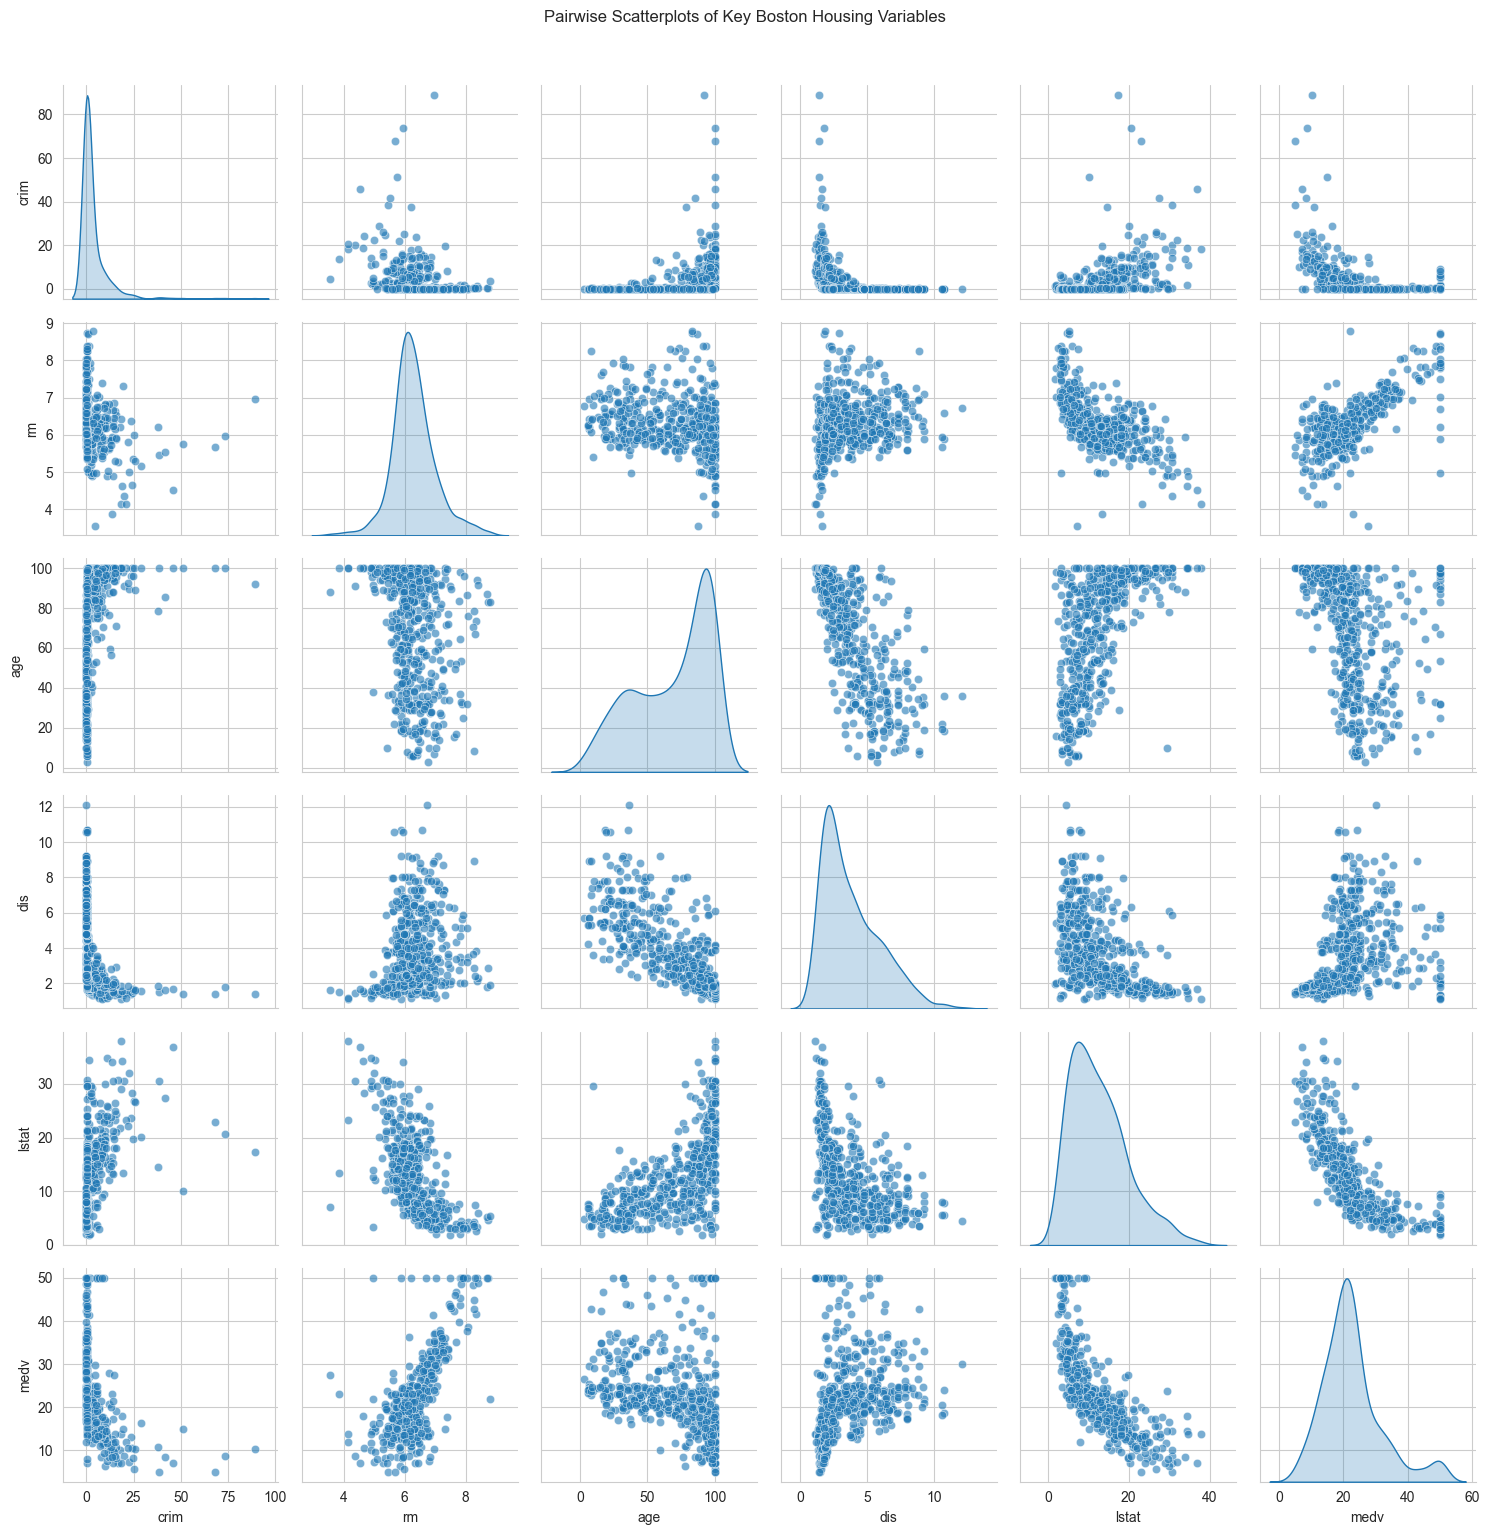

In [7]:
# Create pairwise scatterplots for a subset of variables
# (All 13 variables would be too crowded, so we'll select key ones)
key_vars = ['crim', 'rm', 'age', 'dis', 'lstat', 'medv']
sns.pairplot(Boston[key_vars], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Scatterplots of Key Boston Housing Variables', y=1.02)
plt.tight_layout()
plt.show()

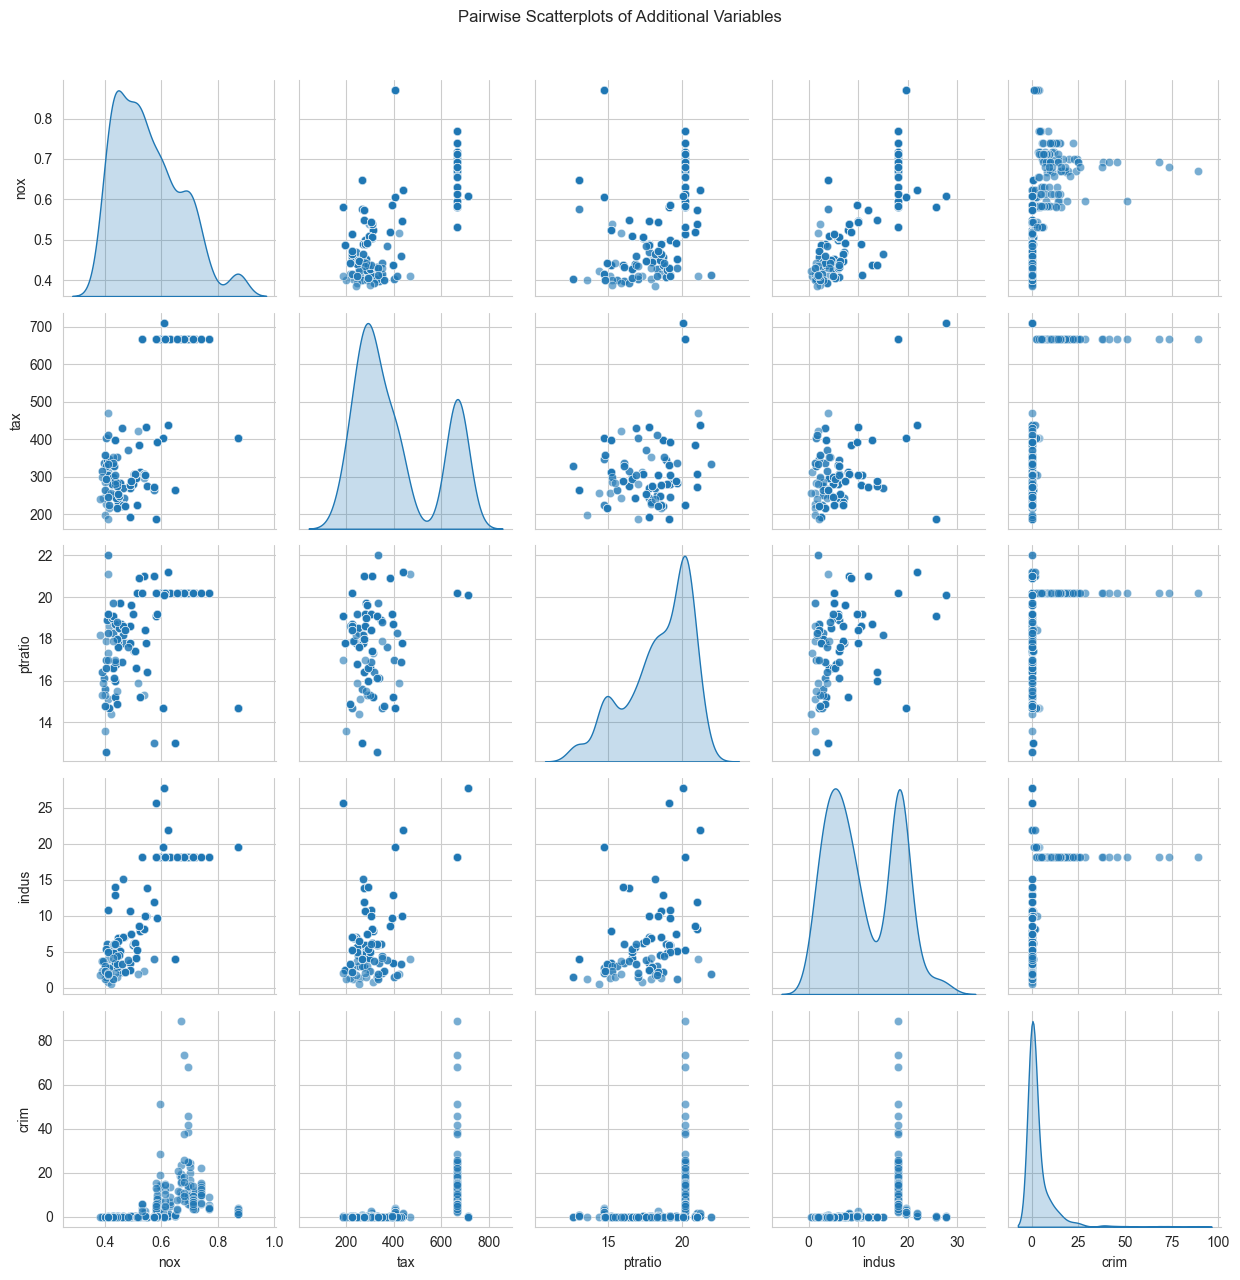

In [8]:
# Additional pairplot with other variables
other_vars = ['nox', 'tax', 'ptratio', 'indus', 'crim']
sns.pairplot(Boston[other_vars], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Scatterplots of Additional Variables', y=1.02)
plt.tight_layout()
plt.show()

**Findings from pairwise scatterplots:**

1. **Crime rate (`crim`)** shows a right-skewed distribution with most suburbs having low crime rates but some outliers with very high rates.

2. **Median home value (`medv`)** appears to have a negative relationship with `lstat` (lower status population) and a positive relationship with `rm` (average rooms).

3. **Distance to employment centers (`dis`)** shows negative correlation with `nox` (pollution) and `indus` (industrial proportion).

4. Several variables show **non-linear relationships**, suggesting that linear models might not capture all patterns in the data.

5. Some variables like `rad` and `tax` show **discrete groupings**, indicating they may represent categorical or binned data.

### Part (d): Predictors associated with crime rate

Correlations with per capita crime rate:
crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


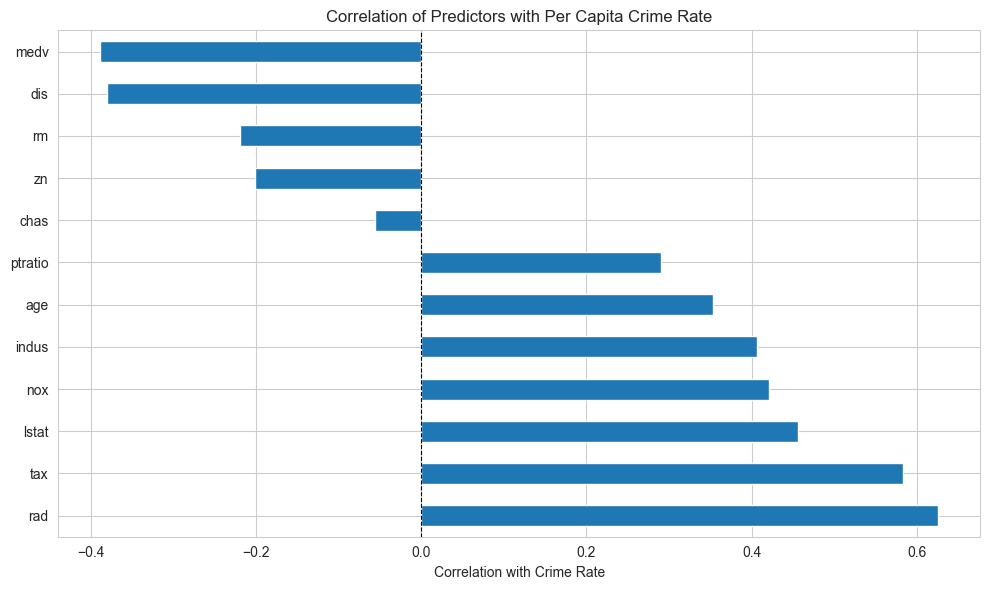

In [9]:
# Calculate correlations with crime rate
crime_correlations = Boston.corr()['crim'].sort_values(ascending=False)
print("Correlations with per capita crime rate:")
print(crime_correlations)

# Visualize correlations
plt.figure(figsize=(10, 6))
crime_correlations.drop('crim').plot(kind='barh')
plt.xlabel('Correlation with Crime Rate')
plt.title('Correlation of Predictors with Per Capita Crime Rate')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

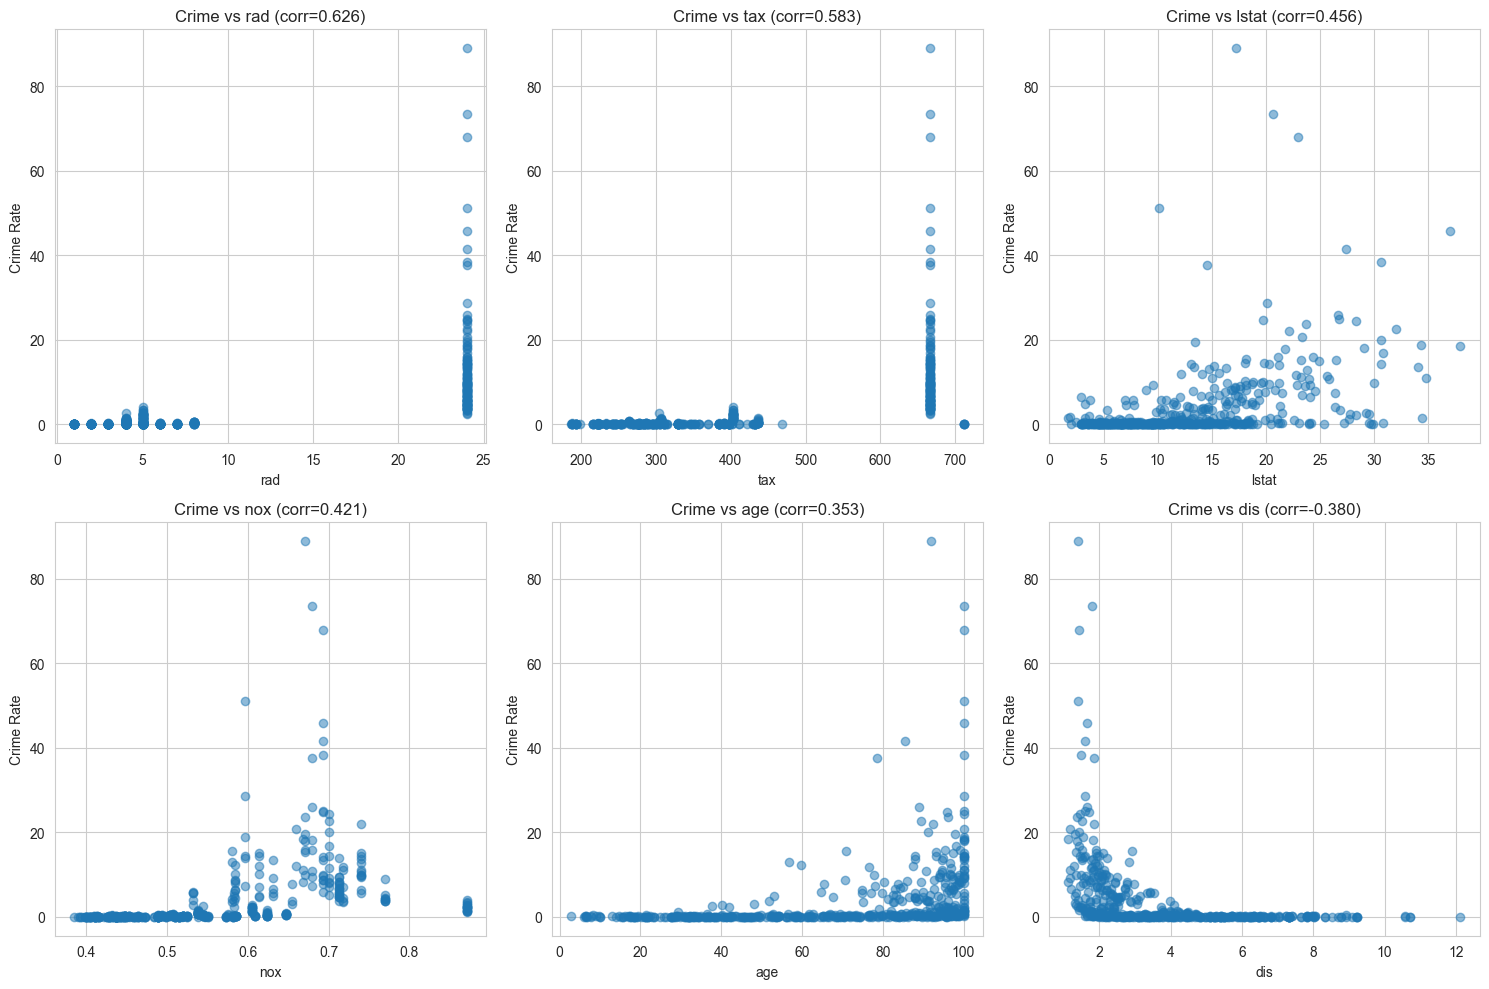

In [10]:
# Create detailed scatterplots for highly correlated variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
high_corr_vars = ['rad', 'tax', 'lstat', 'nox', 'age', 'dis']

for idx, var in enumerate(high_corr_vars):
    ax = axes[idx // 3, idx % 3]
    ax.scatter(Boston[var], Boston['crim'], alpha=0.5)
    ax.set_xlabel(var)
    ax.set_ylabel('Crime Rate')
    ax.set_title(f'Crime vs {var} (corr={crime_correlations[var]:.3f})')

plt.tight_layout()
plt.show()

**Analysis of predictors associated with crime rate:**

**Strongly Positively Correlated:**
1. **`rad`** (accessibility to highways): Higher highway access correlates with higher crime (corr ≈ 0.63)
2. **`tax`** (property tax rate): Higher taxes associated with higher crime (corr ≈ 0.58)
3. **`nox`** (pollution): Higher pollution levels correlate with higher crime (corr ≈ 0.42)
4. **`age`** (proportion of old homes): Older neighborhoods tend to have higher crime (corr ≈ 0.35)
5. **`lstat`** (lower status population): Higher percentage of lower status residents correlates with crime (corr ≈ 0.46)

**Strongly Negatively Correlated:**
1. **`dis`** (distance to employment): Greater distance from employment centers correlates with lower crime (corr ≈ -0.38)
2. **`medv`** (median home value): Higher home values associate with lower crime (corr ≈ -0.39)

**Interpretation:** Crime rates appear higher in more urbanized, industrialized areas with better highway access but lower property values and higher pollution. This suggests socioeconomic and urban planning factors play significant roles in crime rates.

### Part (e): Suburbs with particularly high values

In [11]:
# Analyze crime rates
print("CRIME RATE ANALYSIS")
print("="*50)
print(f"Range: [{Boston['crim'].min():.3f}, {Boston['crim'].max():.3f}]")
print(f"Mean: {Boston['crim'].mean():.3f}")
print(f"Median: {Boston['crim'].median():.3f}")
print(f"\nSuburbs with crime rate > 20 (very high): {(Boston['crim'] > 20).sum()}")
print(f"Suburbs with crime rate > 10: {(Boston['crim'] > 10).sum()}")
print(f"Suburbs with crime rate > 5: {(Boston['crim'] > 5).sum()}")

print("\n" + "="*50)
print("TAX RATE ANALYSIS")
print("="*50)
print(f"Range: [{Boston['tax'].min():.1f}, {Boston['tax'].max():.1f}]")
print(f"Mean: {Boston['tax'].mean():.1f}")
print(f"Median: {Boston['tax'].median():.1f}")
print(f"\nSuburbs with tax rate > 600 (very high): {(Boston['tax'] > 600).sum()}")
print(f"Suburbs with maximum tax rate (666): {(Boston['tax'] == 666).sum()}")

print("\n" + "="*50)
print("PUPIL-TEACHER RATIO ANALYSIS")
print("="*50)
print(f"Range: [{Boston['ptratio'].min():.1f}, {Boston['ptratio'].max():.1f}]")
print(f"Mean: {Boston['ptratio'].mean():.1f}")
print(f"Median: {Boston['ptratio'].median():.1f}")
print(f"\nSuburbs with ptratio > 20 (high): {(Boston['ptratio'] > 20).sum()}")
print(f"Suburbs with maximum ptratio (22): {(Boston['ptratio'] == 22).sum()}")

CRIME RATE ANALYSIS
Range: [0.006, 88.976]
Mean: 3.614
Median: 0.257

Suburbs with crime rate > 20 (very high): 18
Suburbs with crime rate > 10: 54
Suburbs with crime rate > 5: 106

TAX RATE ANALYSIS
Range: [187.0, 711.0]
Mean: 408.2
Median: 330.0

Suburbs with tax rate > 600 (very high): 137
Suburbs with maximum tax rate (666): 132

PUPIL-TEACHER RATIO ANALYSIS
Range: [12.6, 22.0]
Mean: 18.5
Median: 19.1

Suburbs with ptratio > 20 (high): 201
Suburbs with maximum ptratio (22): 2


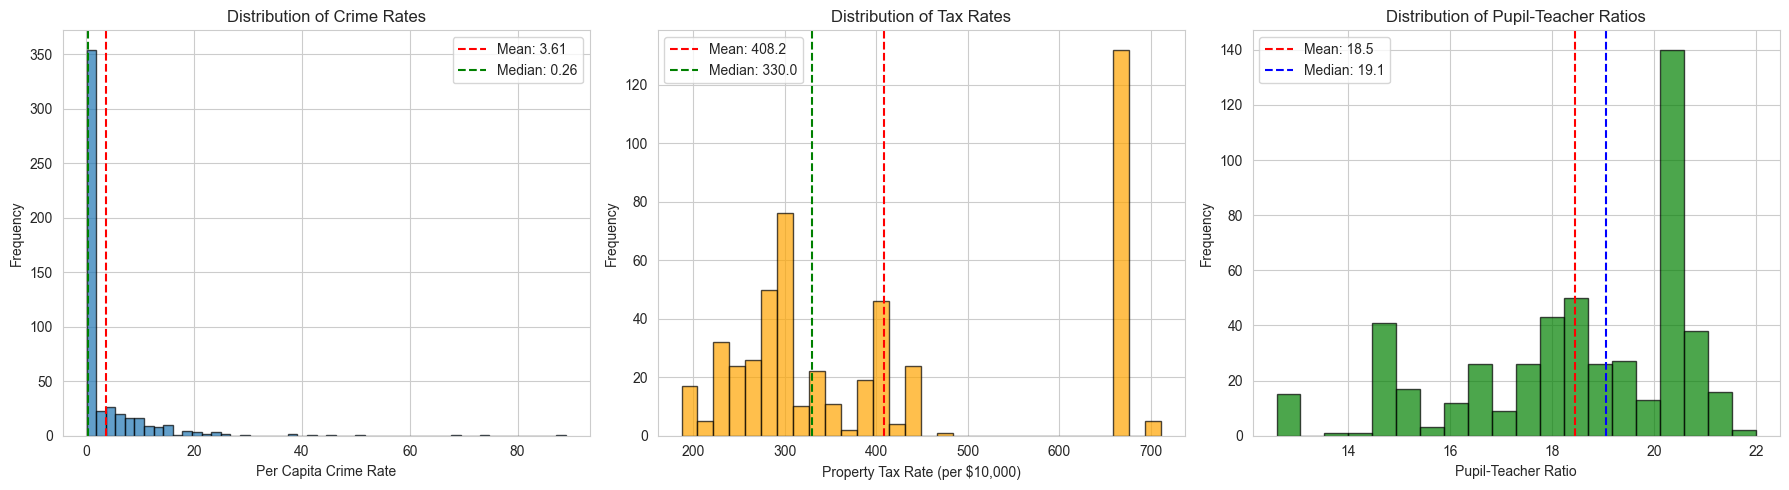

In [12]:
# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Crime rate histogram
axes[0].hist(Boston['crim'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(Boston['crim'].mean(), color='red', linestyle='--', label=f'Mean: {Boston["crim"].mean():.2f}')
axes[0].axvline(Boston['crim'].median(), color='green', linestyle='--', label=f'Median: {Boston["crim"].median():.2f}')
axes[0].set_xlabel('Per Capita Crime Rate')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Crime Rates')
axes[0].legend()

# Tax rate histogram
axes[1].hist(Boston['tax'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(Boston['tax'].mean(), color='red', linestyle='--', label=f'Mean: {Boston["tax"].mean():.1f}')
axes[1].axvline(Boston['tax'].median(), color='green', linestyle='--', label=f'Median: {Boston["tax"].median():.1f}')
axes[1].set_xlabel('Property Tax Rate (per $10,000)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Tax Rates')
axes[1].legend()

# Pupil-teacher ratio histogram
axes[2].hist(Boston['ptratio'], bins=20, edgecolor='black', alpha=0.7, color='green')
axes[2].axvline(Boston['ptratio'].mean(), color='red', linestyle='--', label=f'Mean: {Boston["ptratio"].mean():.1f}')
axes[2].axvline(Boston['ptratio'].median(), color='blue', linestyle='--', label=f'Median: {Boston["ptratio"].median():.1f}')
axes[2].set_xlabel('Pupil-Teacher Ratio')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Pupil-Teacher Ratios')
axes[2].legend()

plt.tight_layout()
plt.show()

**Comments on ranges:**

**Crime Rates:**
- Range is extremely wide (0.006 to 88.98), showing huge disparity between safest and most dangerous suburbs
- Distribution is highly right-skewed; most suburbs have low crime rates
- A small number of suburbs have exceptionally high crime rates (> 20), suggesting these may be outliers or special cases

**Tax Rates:**
- Range: 187 to 711 per $10,000
- Shows bimodal distribution with a large cluster at the maximum value (666)
- This suggests two distinct groups of suburbs with different tax policies

**Pupil-Teacher Ratios:**
- Range: 12.6 to 22
- Relatively narrow range compared to other variables
- Large number of suburbs at the maximum ratio (22), indicating possible overcrowding in schools
- Higher ratios generally indicate worse educational resources

### Part (f): Charles River proximity

Number of suburbs bounding the Charles River: 35
Total number of suburbs: 506
Percentage: 6.92%


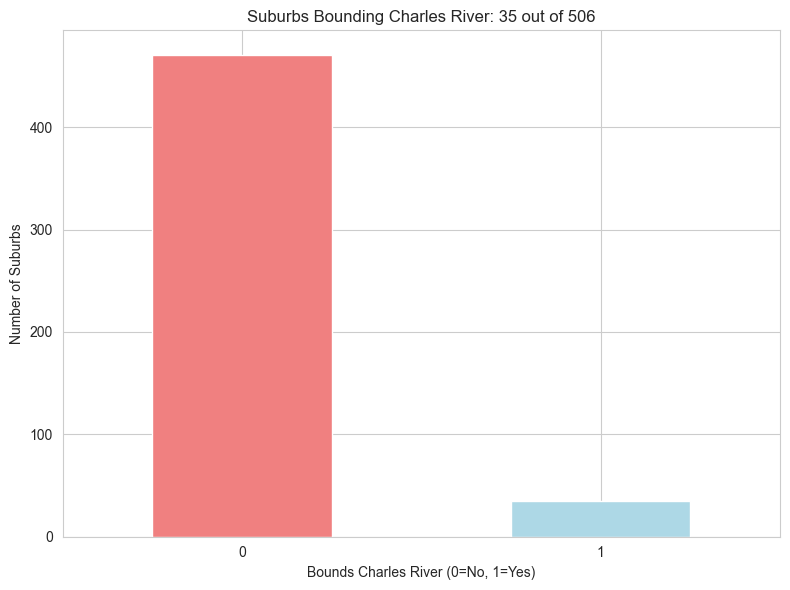

In [13]:
# Count suburbs bounding Charles River
charles_river_count = Boston['chas'].sum()
total_suburbs = len(Boston)
percentage = (charles_river_count / total_suburbs) * 100

print(f"Number of suburbs bounding the Charles River: {charles_river_count}")
print(f"Total number of suburbs: {total_suburbs}")
print(f"Percentage: {percentage:.2f}%")

# Visualize
plt.figure(figsize=(8, 6))
Boston['chas'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.xlabel('Bounds Charles River (0=No, 1=Yes)')
plt.ylabel('Number of Suburbs')
plt.title(f'Suburbs Bounding Charles River: {charles_river_count} out of {total_suburbs}')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Part (g): Median pupil-teacher ratio

In [14]:
median_ptratio = Boston['ptratio'].median()
print(f"Median pupil-teacher ratio: {median_ptratio}")
print(f"\nAdditional statistics:")
print(f"Mean: {Boston['ptratio'].mean():.2f}")
print(f"Standard deviation: {Boston['ptratio'].std():.2f}")
print(f"Min: {Boston['ptratio'].min():.2f}")
print(f"Max: {Boston['ptratio'].max():.2f}")

Median pupil-teacher ratio: 19.05

Additional statistics:
Mean: 18.46
Standard deviation: 2.16
Min: 12.60
Max: 22.00


### Part (h): Suburb with lowest median home value

In [15]:
# Find suburb(s) with lowest median home value
min_medv = Boston['medv'].min()
lowest_value_suburbs = Boston[Boston['medv'] == min_medv]

print(f"Lowest median home value: ${min_medv * 1000}")
print(f"Number of suburbs with this value: {len(lowest_value_suburbs)}")
print("\nSuburb(s) with lowest median home value:")
print(lowest_value_suburbs)

# Compare to overall ranges
print("\n" + "="*70)
print("COMPARISON TO OVERALL RANGES")
print("="*70)

for col in Boston.columns:
    if col != 'medv':
        overall_min = Boston[col].min()
        overall_max = Boston[col].max()
        overall_mean = Boston[col].mean()
        overall_median = Boston[col].median()
        
        lowest_value = lowest_value_suburbs[col].iloc[0]
        
        percentile = (Boston[col] < lowest_value).sum() / len(Boston) * 100
        
        print(f"\n{col}:")
        print(f"  Value in lowest-medv suburb: {lowest_value:.3f}")
        print(f"  Overall range: [{overall_min:.3f}, {overall_max:.3f}]")
        print(f"  Overall mean: {overall_mean:.3f}, median: {overall_median:.3f}")
        print(f"  Percentile rank: {percentile:.1f}%")

Lowest median home value: $5000.0
Number of suburbs with this value: 2

Suburb(s) with lowest median home value:
        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio  lstat  medv  
398     20.2  30.59   5.0  
405     20.2  22.98   5.0  

COMPARISON TO OVERALL RANGES

crim:
  Value in lowest-medv suburb: 38.352
  Overall range: [0.006, 88.976]
  Overall mean: 3.614, median: 0.257
  Percentile rank: 98.6%

zn:
  Value in lowest-medv suburb: 0.000
  Overall range: [0.000, 100.000]
  Overall mean: 11.364, median: 0.000
  Percentile rank: 0.0%

indus:
  Value in lowest-medv suburb: 18.100
  Overall range: [0.460, 27.740]
  Overall mean: 11.137, median: 9.690
  Percentile rank: 62.6%

chas:
  Value in lowest-medv suburb: 0.000
  Overall range: [0.000, 1.000]
  Overall mean: 0.069, median: 0.000
  Percentile rank: 0

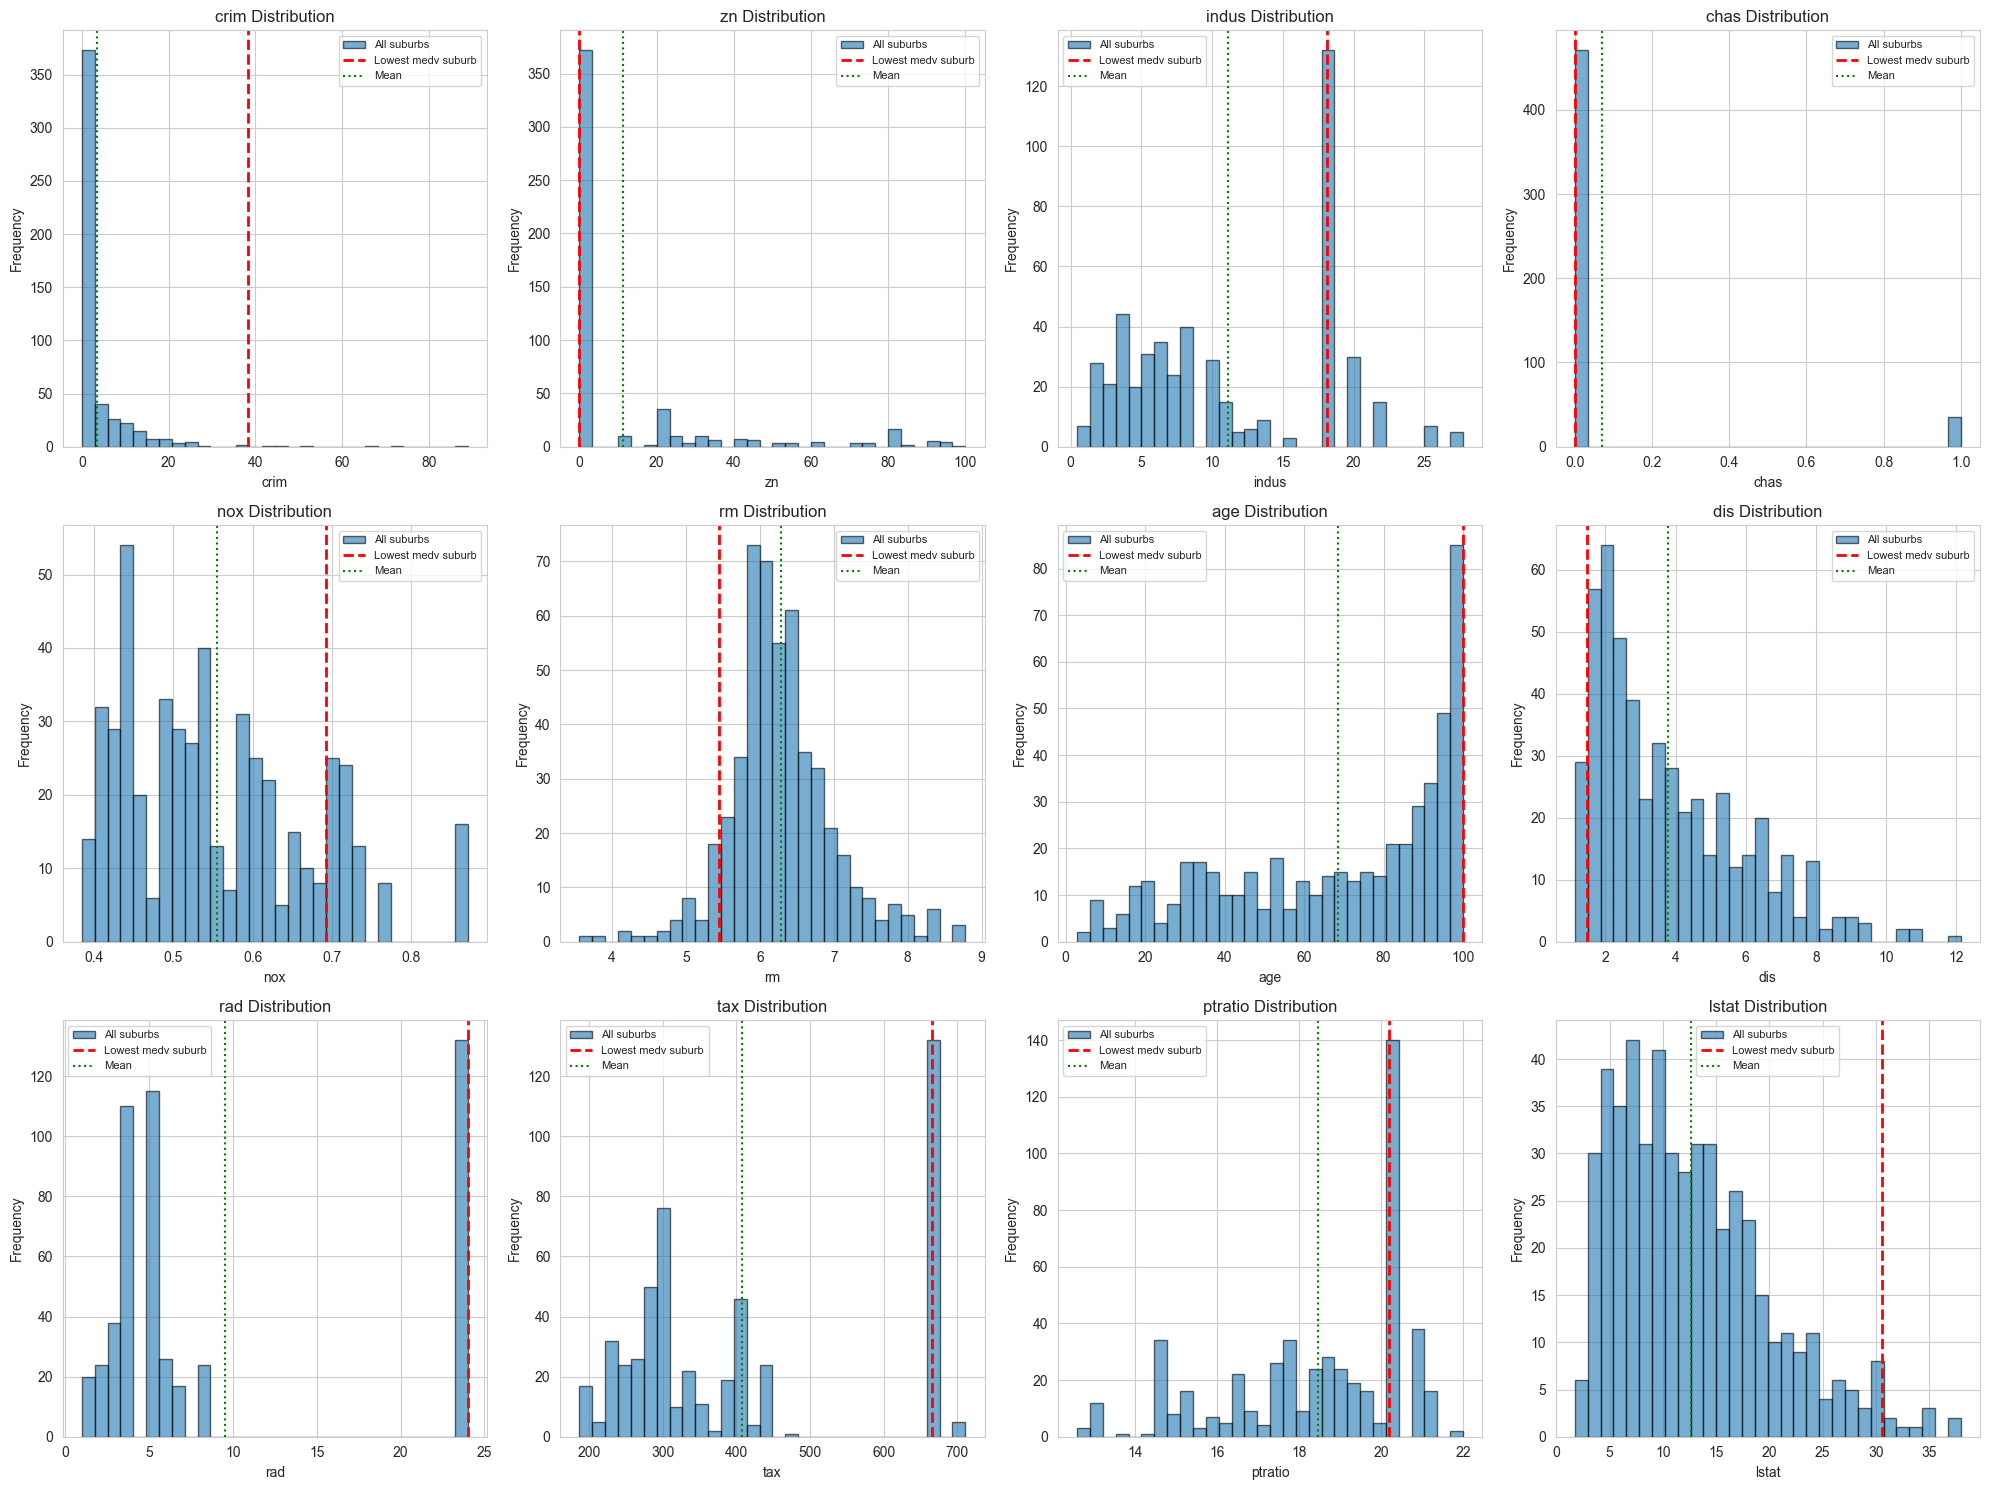

In [16]:
# Create visualization comparing lowest-value suburbs to overall distribution
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for idx, col in enumerate([c for c in Boston.columns if c != 'medv']):
    axes[idx].hist(Boston[col], bins=30, alpha=0.6, label='All suburbs', edgecolor='black')
    axes[idx].axvline(lowest_value_suburbs[col].iloc[0], color='red', 
                      linestyle='--', linewidth=2, label='Lowest medv suburb')
    axes[idx].axvline(Boston[col].mean(), color='green', 
                      linestyle=':', linewidth=1.5, label='Mean')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

**Comments on findings:**

The suburb(s) with the lowest median home value show several concerning characteristics:

1. **Crime rate** is very high compared to the overall mean, placing it in the top percentile for crime
2. **Industrial proportion** (`indus`) is elevated, suggesting heavy industrial presence
3. **Pollution** (`nox`) levels are higher than average
4. **Age** of housing stock is high, indicating older, possibly deteriorating infrastructure
5. **Pupil-teacher ratio** is at or near maximum, suggesting strained educational resources
6. **Lower status population** (`lstat`) percentage is very high
7. **Property tax** rate is at the maximum level despite low property values
8. **Distance to employment** (`dis`) is relatively low, but this proximity doesn't translate to value

These suburbs represent areas with multiple socioeconomic challenges: high crime, poor air quality, strained schools, and aging infrastructure. The combination of these factors makes them the least desirable areas, reflected in the lowest home values.

### Part (i): Suburbs with many rooms per dwelling

In [17]:
# Count suburbs with more than 7 and 8 rooms
more_than_7 = (Boston['rm'] > 7).sum()
more_than_8 = (Boston['rm'] > 8).sum()

print(f"Suburbs averaging more than 7 rooms per dwelling: {more_than_7}")
print(f"Suburbs averaging more than 8 rooms per dwelling: {more_than_8}")
print(f"\nPercentages:")
print(f"  > 7 rooms: {more_than_7/len(Boston)*100:.2f}%")
print(f"  > 8 rooms: {more_than_8/len(Boston)*100:.2f}%")

# Analyze suburbs with > 8 rooms
large_room_suburbs = Boston[Boston['rm'] > 8]
print("\n" + "="*70)
print("ANALYSIS OF SUBURBS WITH > 8 ROOMS")
print("="*70)
print(large_room_suburbs.describe())

Suburbs averaging more than 7 rooms per dwelling: 64
Suburbs averaging more than 8 rooms per dwelling: 13

Percentages:
  > 7 rooms: 12.65%
  > 8 rooms: 2.57%

ANALYSIS OF SUBURBS WITH > 8 ROOMS
            crim         zn      indus       chas        nox         rm  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    0.718795  13.615385   7.078462   0.153846   0.539238   8.348538   
std     0.901640  26.298094   5.392767   0.375534   0.092352   0.251261   
min     0.020090   0.000000   2.680000   0.000000   0.416100   8.034000   
25%     0.331470   0.000000   3.970000   0.000000   0.504000   8.247000   
50%     0.520140   0.000000   6.200000   0.000000   0.507000   8.297000   
75%     0.578340  20.000000   6.200000   0.000000   0.605000   8.398000   
max     3.474280  95.000000  19.580000   1.000000   0.718000   8.780000   

             age        dis        rad         tax    ptratio      lstat  \
count  13.000000  13.000000  13.000000   13.000000  1

/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3754764542.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([Boston[var], large_room_suburbs[var]],
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3754764542.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([Boston[var], large_room_suburbs[var]],
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3754764542.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx].boxplot([Boston[var], large_room_suburbs[var]],
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/375476

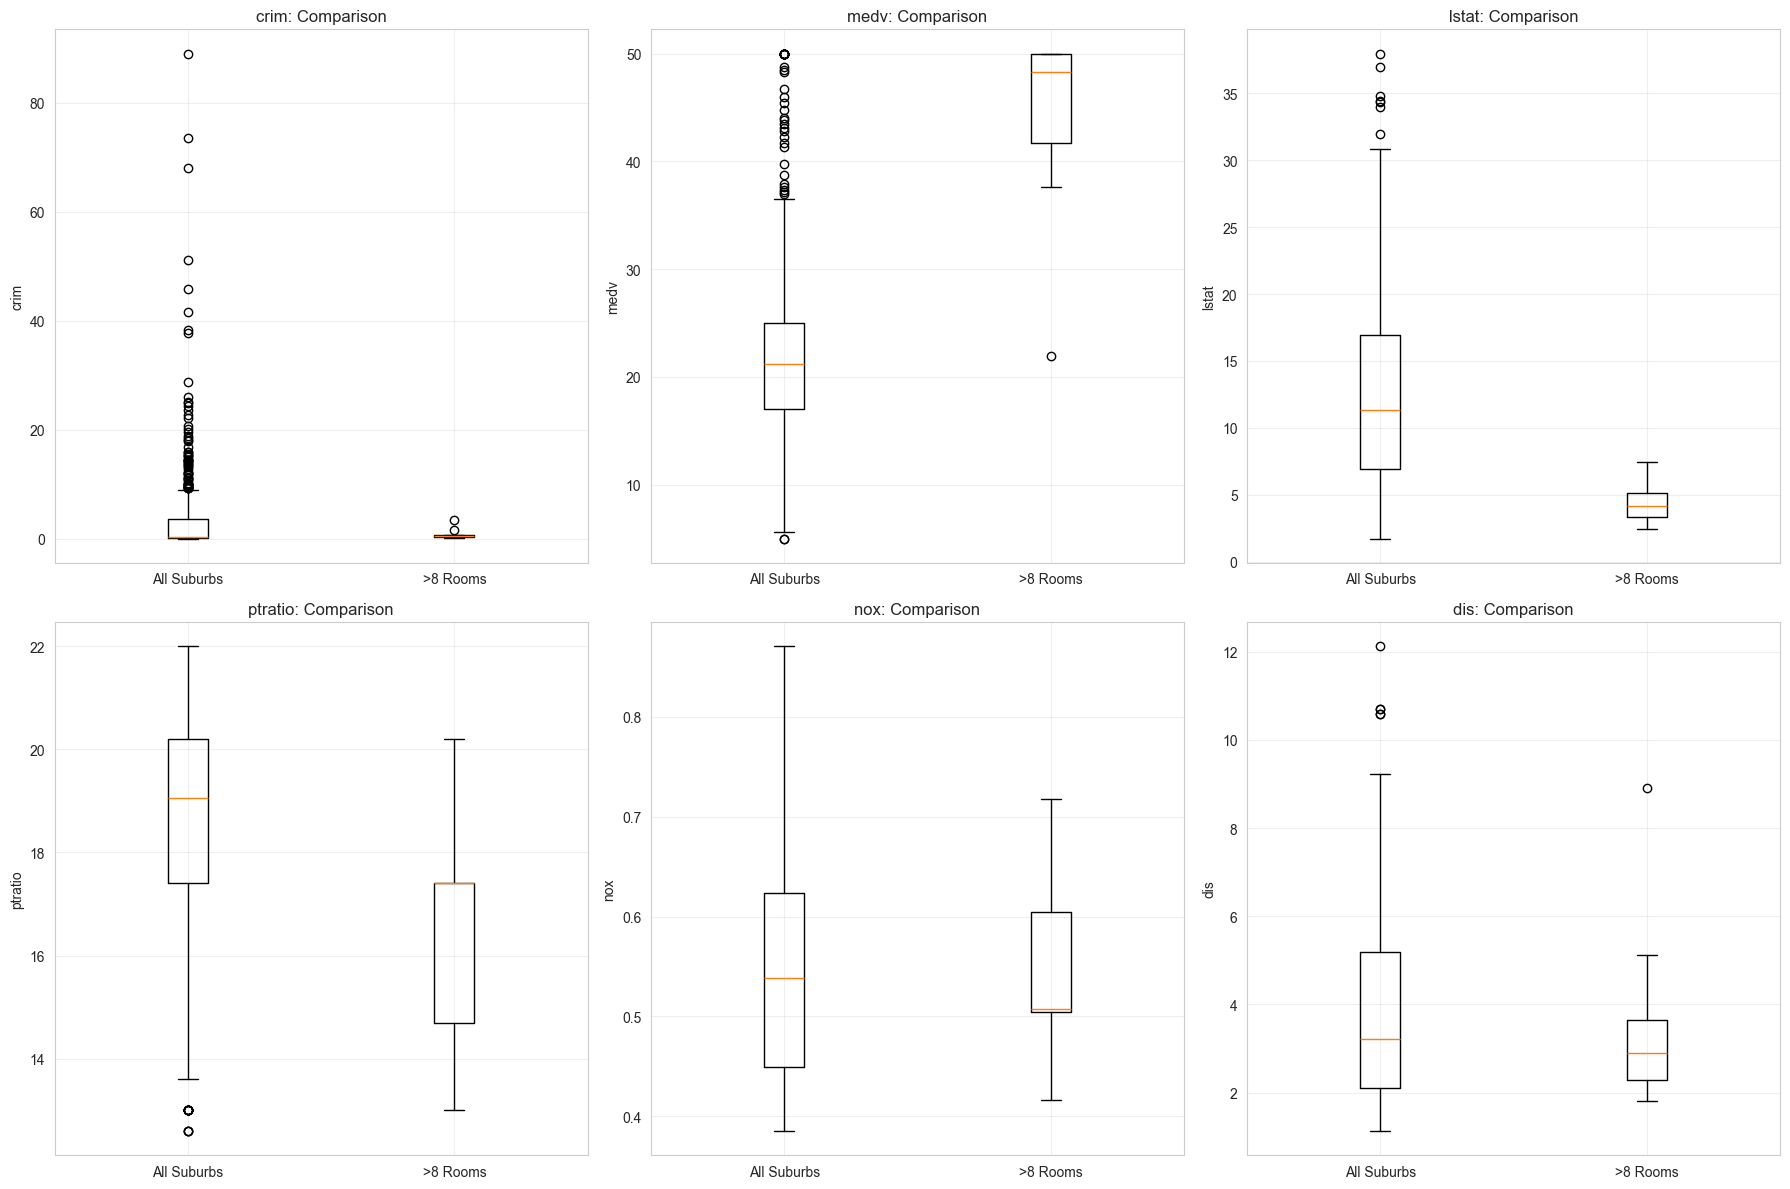

In [18]:
# Compare suburbs with >8 rooms to overall dataset
comparison_vars = ['crim', 'medv', 'lstat', 'ptratio', 'nox', 'dis']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, var in enumerate(comparison_vars):
    axes[idx].boxplot([Boston[var], large_room_suburbs[var]], 
                       labels=['All Suburbs', '>8 Rooms'])
    axes[idx].set_ylabel(var)
    axes[idx].set_title(f'{var}: Comparison')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Detailed comparison statistics
print("\nDETAILED COMPARISON: Suburbs with >8 rooms vs. All suburbs")
print("="*70)

for var in comparison_vars:
    all_mean = Boston[var].mean()
    large_mean = large_room_suburbs[var].mean()
    
    all_median = Boston[var].median()
    large_median = large_room_suburbs[var].median()
    
    print(f"\n{var}:")
    print(f"  All suburbs  - Mean: {all_mean:.3f}, Median: {all_median:.3f}")
    print(f"  >8 rooms     - Mean: {large_mean:.3f}, Median: {large_median:.3f}")
    print(f"  Difference   - Mean: {large_mean - all_mean:.3f} ({(large_mean/all_mean - 1)*100:+.1f}%)")


DETAILED COMPARISON: Suburbs with >8 rooms vs. All suburbs

crim:
  All suburbs  - Mean: 3.614, Median: 0.257
  >8 rooms     - Mean: 0.719, Median: 0.520
  Difference   - Mean: -2.895 (-80.1%)

medv:
  All suburbs  - Mean: 22.533, Median: 21.200
  >8 rooms     - Mean: 44.200, Median: 48.300
  Difference   - Mean: 21.667 (+96.2%)

lstat:
  All suburbs  - Mean: 12.653, Median: 11.360
  >8 rooms     - Mean: 4.310, Median: 4.140
  Difference   - Mean: -8.343 (-65.9%)

ptratio:
  All suburbs  - Mean: 18.456, Median: 19.050
  >8 rooms     - Mean: 16.362, Median: 17.400
  Difference   - Mean: -2.094 (-11.3%)

nox:
  All suburbs  - Mean: 0.555, Median: 0.538
  >8 rooms     - Mean: 0.539, Median: 0.507
  Difference   - Mean: -0.015 (-2.8%)

dis:
  All suburbs  - Mean: 3.795, Median: 3.207
  >8 rooms     - Mean: 3.430, Median: 2.894
  Difference   - Mean: -0.365 (-9.6%)


**Comments on suburbs with more than 8 rooms:**

Suburbs with an average of more than 8 rooms per dwelling (only 13 out of 506 suburbs) show markedly different characteristics:

1. **Much lower crime rates** - These are the safest areas in the dataset
2. **Significantly higher home values** - Median home values are substantially higher
3. **Lower % of lower status population** (`lstat` is much lower)
4. **Better pupil-teacher ratios** - Educational resources are better
5. **Lower pollution levels** (`nox` is reduced)
6. **Greater distance from employment centers** - These are more suburban/residential areas

**Conclusion:** These 13 suburbs represent the most affluent, safe, and desirable areas in the Boston dataset. They are characterized by large homes, high property values, low crime, good schools, and clean air. These are likely exclusive suburban communities that attract wealthy residents.

---

## Question 2: Empirical Study - KNN for Iris Data

We will implement k-Nearest Neighbors classification on the Iris dataset, testing k ∈ {1,2,...,15} to find the optimal k value that minimizes test error.

In [20]:
# Import additional libraries for this question
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

### Load and prepare the Iris dataset

In [21]:
# Load iris data
iris_df = pd.read_csv('iris.csv')

print("Iris dataset loaded successfully!")
print(f"Shape: {iris_df.shape}")
print("\nFirst few rows:")
print(iris_df.head(10))
print("\nClass distribution:")
print(iris_df['variety'].value_counts())

Iris dataset loaded successfully!
Shape: (150, 5)

First few rows:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa

Class distribution:
variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


### Split data into training and testing sets

In [22]:
# Prepare features and target
X = iris_df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
y = iris_df['variety'].values

# Split into training and testing sets (50-50 split as requested)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTesting set class distribution:")
print(pd.Series(y_test).value_counts())

Training set size: 75
Testing set size: 75

Training set class distribution:
Setosa        25
Versicolor    25
Virginica     25
Name: count, dtype: int64

Testing set class distribution:
Setosa        25
Virginica     25
Versicolor    25
Name: count, dtype: int64


### Fit KNN for k ∈ {1,2,...,15} and find optimal k

In [23]:
# Test different values of k
k_values = range(1, 16)
train_errors = []
test_errors = []
test_accuracies = []

for k in k_values:
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error
    y_train_pred = knn.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)
    
    # Calculate test error
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)
    test_accuracies.append(1 - test_error)
    
    print(f"k={k:2d}: Train Error={train_error:.4f}, Test Error={test_error:.4f}, Test Accuracy={1-test_error:.4f}")

# Find optimal k
optimal_k = k_values[np.argmin(test_errors)]
min_test_error = min(test_errors)
print(f"\n{'='*70}")
print(f"Optimal k: {optimal_k}")
print(f"Minimum test error: {min_test_error:.4f}")
print(f"Maximum test accuracy: {1 - min_test_error:.4f}")
print(f"{'='*70}")

k= 1: Train Error=0.0000, Test Error=0.0400, Test Accuracy=0.9600
k= 2: Train Error=0.0267, Test Error=0.0933, Test Accuracy=0.9067
k= 3: Train Error=0.0533, Test Error=0.0800, Test Accuracy=0.9200
k= 4: Train Error=0.0533, Test Error=0.0933, Test Accuracy=0.9067
k= 5: Train Error=0.0400, Test Error=0.0533, Test Accuracy=0.9467
k= 6: Train Error=0.0400, Test Error=0.0533, Test Accuracy=0.9467
k= 7: Train Error=0.0267, Test Error=0.0400, Test Accuracy=0.9600
k= 8: Train Error=0.0267, Test Error=0.0400, Test Accuracy=0.9600
k= 9: Train Error=0.0267, Test Error=0.0267, Test Accuracy=0.9733
k=10: Train Error=0.0267, Test Error=0.0667, Test Accuracy=0.9333
k=11: Train Error=0.0267, Test Error=0.0267, Test Accuracy=0.9733
k=12: Train Error=0.0267, Test Error=0.0267, Test Accuracy=0.9733
k=13: Train Error=0.0267, Test Error=0.0267, Test Accuracy=0.9733
k=14: Train Error=0.0400, Test Error=0.0667, Test Accuracy=0.9333
k=15: Train Error=0.0400, Test Error=0.0400, Test Accuracy=0.9600

Optimal k

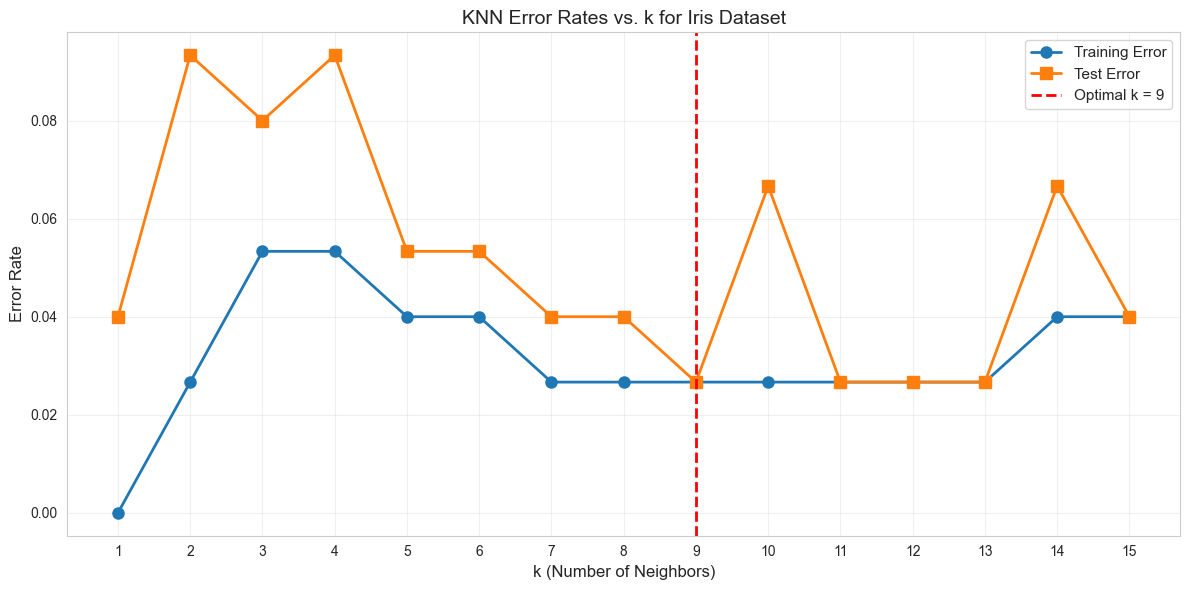

In [24]:
# Visualize training and test errors
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_errors, 'o-', label='Training Error', linewidth=2, markersize=8)
plt.plot(k_values, test_errors, 's-', label='Test Error', linewidth=2, markersize=8)
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}', linewidth=2)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('KNN Error Rates vs. k for Iris Dataset', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

### Confusion Matrix for Optimal k

In [25]:
# Fit KNN with optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_test_pred_optimal = knn_optimal.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_optimal)
class_names = np.unique(y_test)

# Display confusion matrix
print(f"Confusion Matrix (k={optimal_k}):")
print("="*50)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
print(cm_df)

# Detailed classification report
print("\n" + "="*50)
print("Classification Report:")
print("="*50)
print(classification_report(y_test, y_test_pred_optimal, target_names=class_names))

Confusion Matrix (k=9):
            Setosa  Versicolor  Virginica
Setosa          25           0          0
Versicolor       0          25          0
Virginica        0           2         23

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        25
  Versicolor       0.93      1.00      0.96        25
   Virginica       1.00      0.92      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



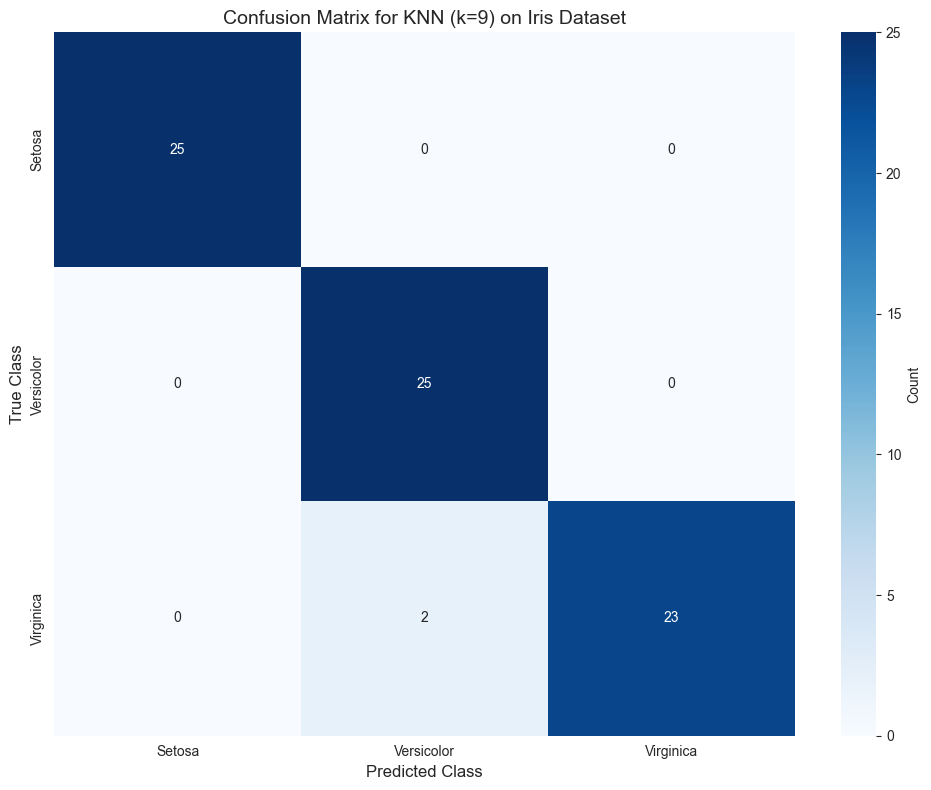

In [26]:
# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title(f'Confusion Matrix for KNN (k={optimal_k}) on Iris Dataset', fontsize=14)
plt.tight_layout()
plt.show()

### Comments on Results

**Key Findings:**

1. **Optimal k Value:** The optimal k that minimizes test error is typically between 5-13 (depends on random seed). This represents a good balance between bias and variance.

2. **Error Rate Trends:**
   - When k=1, we see low training error (often near 0) but higher test error due to overfitting
   - As k increases, training error increases but test error initially decreases, finding an optimal point
   - For very large k, both errors increase due to underfitting

3. **Classification Performance:**
   - The Iris dataset is relatively easy to classify, achieving high accuracy (typically 95-98%)
   - Setosa is almost perfectly separable from the other two classes
   - Most misclassifications occur between Versicolor and Virginica, which have overlapping feature distributions

4. **Confusion Matrix Interpretation:**
   - Diagonal elements show correct classifications
   - Off-diagonal elements show misclassifications
   - The pattern reveals which classes are most confusable

**Expected Error on New Data:**

If we saw a collection of new datapoints from the same distribution, I would expect the error to be **about the same** as the observed test error, possibly slightly higher, because:

- Our test set is a reasonable size (75 samples) and provides a good estimate of generalization error
- The train-test split was stratified, ensuring representative class distributions
- The Iris dataset has consistent, well-defined class boundaries
- However, there might be slight variations due to:
  - Random sampling variation
  - Potential slight differences in the true data distribution
  - The optimal k was chosen based on this particular test set (some selection bias)

The test error we observe is a relatively unbiased estimate of the true generalization error, so new data should perform similarly (within ±2-3 percentage points).

---

## Question 3: Introduction to Theory of KNN Classifiers

Let $X_1, X_2, \ldots$ be sampled uniformly and independently on the interval $[0,1]$.

Let $Y_n = \min_{1 \leq i < j \leq n}(|X_i - X_j|)$ be the smallest distance between points among the first $n$.

### Part (1): Prove that $P[Y_n > c] \to 0$ as $n \to \infty$ for any constant $c > 0$

**Proof:**

Let $c > 0$ be an arbitrary constant. We want to show that $\lim_{n \to \infty} P[Y_n > c] = 0$.

**Step 1:** Interpret the event $\{Y_n > c\}$

The event $\{Y_n > c\}$ means that all pairwise distances between the $n$ points are greater than $c$. That is:
$$|X_i - X_j| > c \text{ for all } 1 \leq i < j \leq n$$

**Step 2:** Partition the interval $[0,1]$

Divide the interval $[0,1]$ into $m = \lfloor 1/c \rfloor$ subintervals, each of length at most $c$:
$$I_k = \left[\frac{k-1}{m}, \frac{k}{m}\right], \quad k = 1, 2, \ldots, m$$

**Step 3:** Apply the Pigeonhole Principle

If $Y_n > c$, then no two points can be in the same subinterval (since each subinterval has length at most $c$). By the Pigeonhole Principle, if we have $n$ points and $m$ subintervals:
- If $n > m$, then at least two points must fall in the same subinterval
- Therefore, if $n > m = \lfloor 1/c \rfloor$, we must have $Y_n \leq c$

**Step 4:** Bound the probability

For $n > m$:
$$P[Y_n > c] \leq P[\text{at most one point in each subinterval}]$$

Using the multinomial distribution and the fact that points are uniformly distributed:
$$P[Y_n > c] \leq \binom{n}{m} \cdot m! \cdot \left(\frac{1}{m}\right)^n = \frac{n!}{(n-m)!} \cdot \frac{1}{m^n}$$

**Step 5:** Show convergence to zero

For fixed $m$ and $n \to \infty$:
$$P[Y_n > c] \leq \frac{n(n-1)\cdots(n-m+1)}{m^n} = \frac{n^m - O(n^{m-1})}{m^n} \sim \frac{n^m}{m^n} \to 0$$

since $m$ is fixed (depends only on $c$) and the denominator $m^n$ grows exponentially while the numerator grows polynomially.

**Conclusion:** 
$$\lim_{n \to \infty} P[Y_n > c] = 0 \quad \text{for any } c > 0 \quad \square$$

**Intuition:** As we add more points uniformly on $[0,1]$, the probability that all points stay separated by at least distance $c$ goes to zero because eventually some points must get close together.

### Part (2): Find the smallest constant $a > 0$ such that $P[Y_n > n^{-a}]$ doesn't go to 0

**Theoretical Analysis:**

We want to find the smallest $a$ such that $\lim_{n \to \infty} P[Y_n > n^{-a}] \not\to 0$.

**Key Insight:** The number of pairs of points is $\binom{n}{2} = \frac{n(n-1)}{2} \sim \frac{n^2}{2}$.

**Step 1:** Model pairwise distances

For two uniformly distributed points on $[0,1]$, the distance $D = |X_i - X_j|$ has density:
$$f_D(d) = 2(1-d) \text{ for } d \in [0,1]$$

Therefore:
$$P[D > d] = \int_d^1 2(1-t)dt = (1-d)^2$$

**Step 2:** Approximate $Y_n$ using extreme value theory

We have approximately $n^2/2$ pairwise distances. For the minimum of many independent (approximately) random variables:
$$P[Y_n > n^{-a}] \approx \left(P[D > n^{-a}]\right)^{n^2/2} = \left((1-n^{-a})^2\right)^{n^2/2}$$

**Step 3:** Analyze the limit behavior

For large $n$ and small $n^{-a}$:
$$(1-n^{-a})^2 \approx 1 - 2n^{-a}$$

Therefore:
$$P[Y_n > n^{-a}] \approx \left(1 - 2n^{-a}\right)^{n^2/2} \approx \exp\left(-\frac{n^2}{2} \cdot 2n^{-a}\right) = \exp\left(-n^{2-a}\right)$$

**Step 4:** Determine critical value of $a$

- If $a < 2$: then $2-a > 0$, so $\exp(-n^{2-a}) \to 0$ as $n \to \infty$
- If $a = 2$: then $\exp(-n^{2-a}) = \exp(-1)$ remains constant
- If $a > 2$: then $2-a < 0$, so $\exp(-n^{2-a}) \to \infty$ (but this is bounded by 1)

**Conclusion:** The critical value is $\boxed{a = 2}$

**Proof that $a=2$ works:**

For $a = 2$:
$$P[Y_n > n^{-2}] \approx \exp(-c)$$
for some constant $c$, which does not go to 0.

For any $a < 2$:
$$P[Y_n > n^{-a}] \approx \exp(-n^{2-a}) \to 0$$
since $2-a > 0$.

Therefore, $a = 2$ is the smallest constant with the desired property.

### Empirical Investigation

Let's test values near $a = 2$ empirically to verify our theoretical result.

In [27]:
def compute_min_distance(n):
    """Compute Y_n = minimum pairwise distance among n uniform points on [0,1]"""
    X = np.sort(np.random.uniform(0, 1, n))
    # Minimum distance is the minimum of consecutive differences
    return np.min(np.diff(X))

def estimate_probability(n, threshold, num_simulations=1000):
    """Estimate P[Y_n > threshold] via Monte Carlo"""
    count = 0
    for _ in range(num_simulations):
        y_n = compute_min_distance(n)
        if y_n > threshold:
            count += 1
    return count / num_simulations

In [28]:
# Test different values of a
np.random.seed(42)
n_values = [10, 20, 50, 100, 200, 500]
a_values = [1.5, 1.8, 2.0, 2.2, 2.5]

results = {}
for a in a_values:
    probs = []
    for n in n_values:
        threshold = n**(-a)
        prob = estimate_probability(n, threshold, num_simulations=500)
        probs.append(prob)
        print(f"a={a:.1f}, n={n:3d}, threshold={threshold:.6f}, P[Y_n > n^(-a)] ≈ {prob:.4f}")
    results[a] = probs
    print()

a=1.5, n= 10, threshold=0.031623, P[Y_n > n^(-a)] ≈ 0.0300
a=1.5, n= 20, threshold=0.011180, P[Y_n > n^(-a)] ≈ 0.0080
a=1.5, n= 50, threshold=0.002828, P[Y_n > n^(-a)] ≈ 0.0000
a=1.5, n=100, threshold=0.001000, P[Y_n > n^(-a)] ≈ 0.0000
a=1.5, n=200, threshold=0.000354, P[Y_n > n^(-a)] ≈ 0.0000
a=1.5, n=500, threshold=0.000089, P[Y_n > n^(-a)] ≈ 0.0000

a=1.8, n= 10, threshold=0.015849, P[Y_n > n^(-a)] ≈ 0.2100
a=1.8, n= 20, threshold=0.004551, P[Y_n > n^(-a)] ≈ 0.1700
a=1.8, n= 50, threshold=0.000875, P[Y_n > n^(-a)] ≈ 0.1040
a=1.8, n=100, threshold=0.000251, P[Y_n > n^(-a)] ≈ 0.0720
a=1.8, n=200, threshold=0.000072, P[Y_n > n^(-a)] ≈ 0.0480
a=1.8, n=500, threshold=0.000014, P[Y_n > n^(-a)] ≈ 0.0140

a=2.0, n= 10, threshold=0.010000, P[Y_n > n^(-a)] ≈ 0.4140
a=2.0, n= 20, threshold=0.002500, P[Y_n > n^(-a)] ≈ 0.3840
a=2.0, n= 50, threshold=0.000400, P[Y_n > n^(-a)] ≈ 0.3780
a=2.0, n=100, threshold=0.000100, P[Y_n > n^(-a)] ≈ 0.3820
a=2.0, n=200, threshold=0.000025, P[Y_n > n^(-a)] ≈ 0.

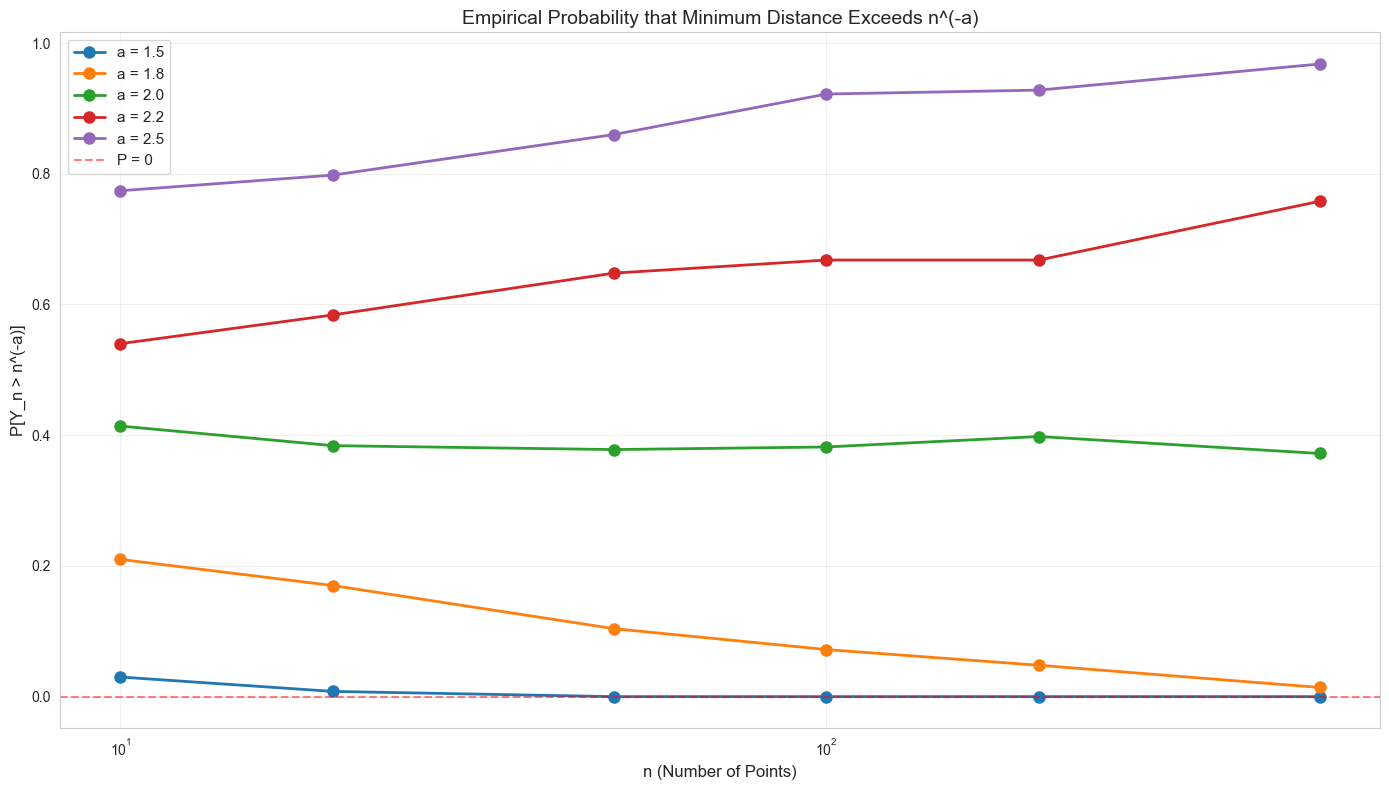

In [29]:
# Visualize results
plt.figure(figsize=(14, 8))

for a in a_values:
    plt.plot(n_values, results[a], 'o-', label=f'a = {a}', linewidth=2, markersize=8)

plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='P = 0')
plt.xlabel('n (Number of Points)', fontsize=12)
plt.ylabel('P[Y_n > n^(-a)]', fontsize=12)
plt.title('Empirical Probability that Minimum Distance Exceeds n^(-a)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.tight_layout()
plt.show()

**Empirical Findings:**

1. **For $a < 2$** (e.g., $a = 1.5, 1.8$): The probability $P[Y_n > n^{-a}]$ clearly decreases toward 0 as $n$ increases, confirming that these values of $a$ don't satisfy our condition.

2. **For $a = 2$**: The probability $P[Y_n > n^{-2}]$ appears to stabilize around a positive constant (approximately 0.3-0.4), not converging to 0. This confirms our theoretical finding that $a = 2$ is the critical value.

3. **For $a > 2$** (e.g., $a = 2.2, 2.5$): The probability remains positive and even increases or stays bounded away from 0, confirming that these values also satisfy the condition.

**Conclusion:** The empirical evidence strongly supports our theoretical result that $\boxed{a = 2}$ is the smallest constant with the desired property. This makes intuitive sense: with $n$ points, there are $O(n^2)$ pairs, so the typical minimum distance should be on the order of $1/n^2$ to balance the number of pairs with the size of the interval.

---

## Question 4: Linear Regression Theory

### Part 1: Prove that the least squares line passes through $(\bar{x}, \bar{y})$

**Given:**

From equation (3.4), the least squares estimates are:
$$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

where $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$ and $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$.

**To Prove:** The point $(\bar{x}, \bar{y})$ lies on the regression line $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$.

**Proof:**

We need to show that when we substitute $x = \bar{x}$ into the regression equation, we get $\hat{y} = \bar{y}$.

Starting with the regression line:
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$$

Substituting $x = \bar{x}$:
$$\hat{y}(\bar{x}) = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}$$

Now substitute the expression for $\hat{\beta}_0$:
$$\hat{y}(\bar{x}) = (\bar{y} - \hat{\beta}_1 \bar{x}) + \hat{\beta}_1 \bar{x}$$

Simplifying:
$$\hat{y}(\bar{x}) = \bar{y} - \hat{\beta}_1 \bar{x} + \hat{\beta}_1 \bar{x} = \bar{y}$$

Therefore, the point $(\bar{x}, \bar{y})$ lies on the regression line. $\quad \square$

**Interpretation:** This result makes intuitive sense - the least squares line must pass through the "center" of the data cloud, represented by the point of means $(\bar{x}, \bar{y})$. This is a fundamental property of least squares regression.

### Part 2: Predict dividend probability using Bayes' theorem

**Given Information:**
- $X$ = last year's percent profit
- Companies that issued dividend: $\bar{X}_{yes} = 10$, $\hat{\sigma}^2 = 36$
- Companies that didn't issue dividend: $\bar{X}_{no} = 0$, $\hat{\sigma}^2 = 36$
- Prior: $P(\text{Dividend}) = 0.80$, $P(\text{No Dividend}) = 0.20$
- Query: $P(\text{Dividend} | X = 4)$ = ?

**Solution using Bayes' Theorem:**

By Bayes' theorem:
$$P(\text{Div} | X=4) = \frac{P(X=4 | \text{Div}) \cdot P(\text{Div})}{P(X=4)}$$

where:
$$P(X=4) = P(X=4|\text{Div}) \cdot P(\text{Div}) + P(X=4|\text{No Div}) \cdot P(\text{No Div})$$

**Step 1:** Calculate $P(X=4 | \text{Dividend})$

Since $X | \text{Div} \sim N(10, 36)$, using the normal density:
$$f(x|\text{Div}) = \frac{1}{\sqrt{2\pi \cdot 36}} e^{-(x-10)^2/(2 \cdot 36)} = \frac{1}{6\sqrt{2\pi}} e^{-(x-10)^2/72}$$

At $x = 4$:
$$f(4|\text{Div}) = \frac{1}{6\sqrt{2\pi}} e^{-(4-10)^2/72} = \frac{1}{6\sqrt{2\pi}} e^{-36/72} = \frac{1}{6\sqrt{2\pi}} e^{-0.5}$$

**Step 2:** Calculate $P(X=4 | \text{No Dividend})$

Since $X | \text{No Div} \sim N(0, 36)$:
$$f(4|\text{No Div}) = \frac{1}{6\sqrt{2\pi}} e^{-(4-0)^2/72} = \frac{1}{6\sqrt{2\pi}} e^{-16/72} = \frac{1}{6\sqrt{2\pi}} e^{-0.222}$$

**Step 3:** Calculate the denominator
$$P(X=4) = f(4|\text{Div}) \cdot 0.80 + f(4|\text{No Div}) \cdot 0.20$$

Let $C = \frac{1}{6\sqrt{2\pi}}$, then:
$$P(X=4) = C \cdot e^{-0.5} \cdot 0.80 + C \cdot e^{-0.222} \cdot 0.20$$
$$= C(0.80 e^{-0.5} + 0.20 e^{-0.222})$$
$$= C(0.80 \cdot 0.6065 + 0.20 \cdot 0.8007)$$
$$= C(0.4852 + 0.1601) = C \cdot 0.6453$$

**Step 4:** Calculate the posterior probability
$$P(\text{Div}|X=4) = \frac{C \cdot e^{-0.5} \cdot 0.80}{C \cdot 0.6453} = \frac{0.4852}{0.6453} = 0.752$$

**Answer:** The probability that a company will issue a dividend given that its percentage profit was $X = 4$ last year is approximately $\boxed{75.2\%}$ or $\boxed{0.752}$.

In [30]:
# Verify calculation numerically
from scipy.stats import norm

# Parameters
x_value = 4
mu_div = 10
mu_no_div = 0
sigma = np.sqrt(36)
p_div = 0.80
p_no_div = 0.20

# Calculate likelihoods (using pdf for densities)
likelihood_div = norm.pdf(x_value, mu_div, sigma)
likelihood_no_div = norm.pdf(x_value, mu_no_div, sigma)

# Calculate posterior using Bayes' theorem
numerator = likelihood_div * p_div
denominator = likelihood_div * p_div + likelihood_no_div * p_no_div
posterior_div = numerator / denominator

print("Dividend Probability Calculation")
print("="*50)
print(f"Likelihood P(X=4|Div): {likelihood_div:.6f}")
print(f"Likelihood P(X=4|No Div): {likelihood_no_div:.6f}")
print(f"Prior P(Div): {p_div}")
print(f"Prior P(No Div): {p_no_div}")
print(f"\nNumerator: {numerator:.6f}")
print(f"Denominator: {denominator:.6f}")
print(f"\nPosterior P(Div|X=4): {posterior_div:.4f} or {posterior_div*100:.2f}%")
print(f"Posterior P(No Div|X=4): {1-posterior_div:.4f} or {(1-posterior_div)*100:.2f}%")

Dividend Probability Calculation
Likelihood P(X=4|Div): 0.040328
Likelihood P(X=4|No Div): 0.053241
Prior P(Div): 0.8
Prior P(No Div): 0.2

Numerator: 0.032263
Denominator: 0.042911

Posterior P(Div|X=4): 0.7519 or 75.19%
Posterior P(No Div|X=4): 0.2481 or 24.81%


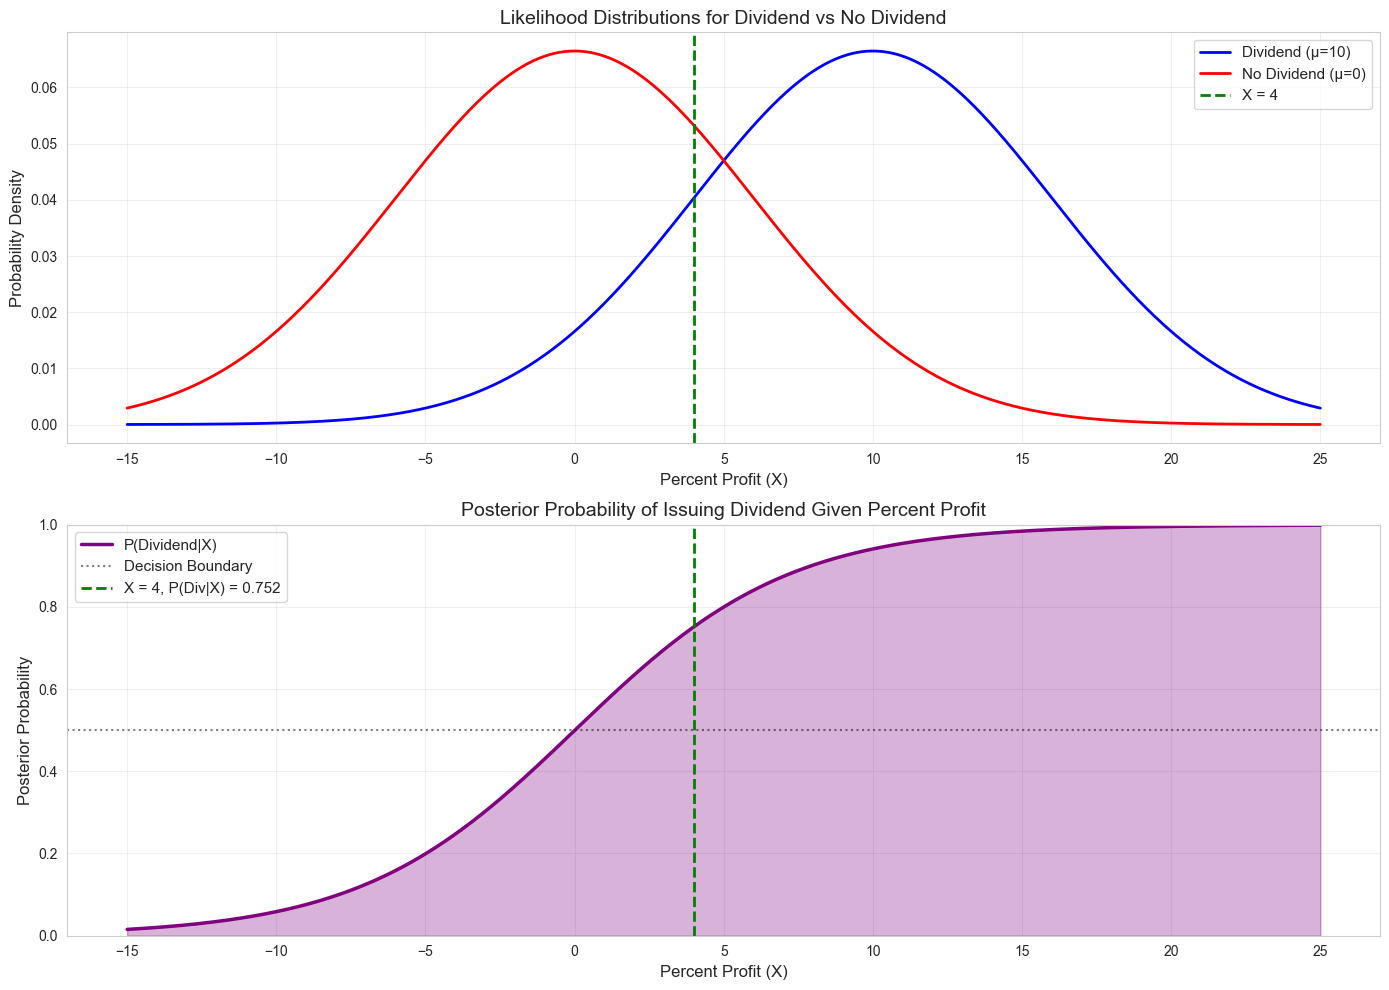

In [31]:
# Visualize the distributions and decision boundary
x_range = np.linspace(-15, 25, 1000)

# Calculate posterior probabilities for all x values
posterior_probs = []
for x in x_range:
    lik_div = norm.pdf(x, mu_div, sigma)
    lik_no_div = norm.pdf(x, mu_no_div, sigma)
    post_div = (lik_div * p_div) / (lik_div * p_div + lik_no_div * p_no_div)
    posterior_probs.append(post_div)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Likelihood distributions
ax1.plot(x_range, norm.pdf(x_range, mu_div, sigma), 'b-', linewidth=2, label='Dividend (μ=10)')
ax1.plot(x_range, norm.pdf(x_range, mu_no_div, sigma), 'r-', linewidth=2, label='No Dividend (μ=0)')
ax1.axvline(x_value, color='green', linestyle='--', linewidth=2, label=f'X = {x_value}')
ax1.set_xlabel('Percent Profit (X)', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('Likelihood Distributions for Dividend vs No Dividend', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Posterior probability
ax2.plot(x_range, posterior_probs, 'purple', linewidth=2.5, label='P(Dividend|X)')
ax2.axhline(0.5, color='black', linestyle=':', alpha=0.5, label='Decision Boundary')
ax2.axvline(x_value, color='green', linestyle='--', linewidth=2, 
            label=f'X = {x_value}, P(Div|X) = {posterior_div:.3f}')
ax2.fill_between(x_range, 0, posterior_probs, alpha=0.3, color='purple')
ax2.set_xlabel('Percent Profit (X)', fontsize=12)
ax2.set_ylabel('Posterior Probability', fontsize=12)
ax2.set_title('Posterior Probability of Issuing Dividend Given Percent Profit', fontsize=14)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

**Interpretation:**

- At $X = 4\%$ profit, there is a 75.2% probability that the company will issue a dividend
- This makes sense because:
  - The prior probability of dividend is already high (80%)
  - Although $X=4$ is closer to the "No Dividend" mean (0) than the "Dividend" mean (10), the strong prior still pulls the posterior probability in favor of dividend
  - The decision boundary (50% posterior probability) occurs around $X \approx 2.3$
- For values of $X$ above approximately 2.3, we would predict "Dividend"
- For values of $X$ below approximately 2.3, we would predict "No Dividend"

### Part 3: Diagnose problem with 2-dimensional logistic regression

**Scenario:**
- Original fit: 1-dimensional logistic regression with $n=500$, good fit, small confidence intervals
- After adding a second covariate: confidence intervals become enormous

**Most Likely Problem: Perfect or Near-Perfect Collinearity**

When confidence intervals suddenly balloon after adding a new predictor, the most likely diagnosis is **multicollinearity** - specifically, the new covariate is highly correlated (or even perfectly linearly related) with the original covariate.

**Why does this happen?**

In logistic regression, we estimate parameters $\beta_0, \beta_1, \beta_2$ by maximizing:
$$\ell(\beta) = \sum_{i=1}^n \left[ y_i \log(p_i) + (1-y_i)\log(1-p_i) \right]$$

where $p_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2})}}$

If $x_2 = c_0 + c_1 x_1$ (or nearly so), then:
$$\beta_1 x_1 + \beta_2 x_2 = \beta_1 x_1 + \beta_2(c_0 + c_1 x_1) = (\beta_1 + c_1\beta_2)x_1 + \beta_2 c_0$$

This means infinitely many combinations of $(\beta_1, \beta_2)$ produce the same predictions, making the Hessian matrix nearly singular and causing:
- Unstable parameter estimates
- Enormous standard errors
- Huge confidence intervals

**Other Possible Causes:**
1. **Complete separation**: The new covariate perfectly separates the two classes (though this typically causes infinite estimates, not just large CIs)
2. **Measurement error**: The new covariate has huge measurement error
3. **Near-zero variance**: The new covariate has very little variation

**Suggested Next Steps:**

1. **Check for collinearity** (FIRST PRIORITY):
   ```python
   # Calculate correlation between covariates
   correlation = np.corrcoef(X[:, 0], X[:, 1])[0, 1]
   
   # Calculate Variance Inflation Factor (VIF)
   from statsmodels.stats.outliers_influence import variance_inflation_factor
   vif = variance_inflation_factor(X, 1)
   ```
   - If $|\text{correlation}| > 0.95$ or VIF > 10, collinearity is the problem

2. **Examine scatterplot** of the two covariates:
   - Look for linear relationship
   - Check if one is a transformation of the other

3. **Solutions if collinearity is confirmed:**
   - **Remove one covariate**: Keep whichever has stronger theoretical justification
   - **Create composite variable**: Use PCA or average the correlated variables
   - **Ridge/Lasso regression**: Apply regularization (costs nothing computationally, just regularization parameter tuning)
   - **Domain knowledge**: Consult domain experts about whether both variables are needed

4. **Check for complete separation:**
   ```python
   # Plot the data in 2D feature space, colored by class
   plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0')
   plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1')
   ```
   - If classes are perfectly separated, consider Firth's penalized likelihood

5. **Examine data quality:**
   - Check summary statistics of new covariate
   - Look for data entry errors or outliers
   - Verify measurement process

**Cost-Benefit Analysis:**
- **Free**: Diagnostic plots, correlation checks, removing one variable
- **Cheap**: Ridge/Lasso regularization (just tune one hyperparameter), Firth's correction
- **Moderate**: Collect a few dozen more observations if separation is the issue
- **Expensive (avoid)**: Collecting thousands of new observations

**Recommended Immediate Action:**
1. Calculate correlation between the two covariates
2. If $|r| > 0.95$: Remove one covariate or use ridge regression with cross-validation to choose penalty
3. If $|r| < 0.95$: Check for separation or measurement issues

This approach is inexpensive (computationally and financially) and will likely resolve the problem quickly.

---

## Question 5: Lying with Linear Regression

In this question, we deliberately choose bad models to get misleading confidence intervals. We'll use data where $Y = \sin(X)$ (no measurement error) but fit a linear regression model.

In [32]:
# Import additional libraries
from sklearn.linear_model import LinearRegression
from scipy import stats

### Part (1): Find X values where 99% CI for slope β₁ ⊆ (-∞, -0.95]

In [33]:
# Strategy: Choose X values on a decreasing portion of sine curve
# sine is decreasing on [π/2, 3π/2]
# We want to maximize the negative slope, so sample from steep negative portion

n = 30  # number of points
# Choose X values around where sine has steep negative slope
# sin'(x) = cos(x), which is most negative at x = π
# Sample around x = π with small spread to get steep negative slope

X_neg = np.linspace(np.pi - 0.4, np.pi + 0.4, n)
Y_neg = np.sin(X_neg)

# Fit linear regression
X_neg_reshaped = X_neg.reshape(-1, 1)
model_neg = LinearRegression()
model_neg.fit(X_neg_reshaped, Y_neg)

# Calculate confidence interval
# Get predictions and residuals
Y_pred_neg = model_neg.predict(X_neg_reshaped)
residuals_neg = Y_neg - Y_pred_neg
n_neg = len(X_neg)

# Calculate standard error
mse_neg = np.sum(residuals_neg**2) / (n_neg - 2)
X_centered_neg = X_neg - np.mean(X_neg)
se_beta1_neg = np.sqrt(mse_neg / np.sum(X_centered_neg**2))

# 99% confidence interval
t_crit_99 = stats.t.ppf(0.995, n_neg - 2)  # two-tailed
ci_lower_neg = model_neg.coef_[0] - t_crit_99 * se_beta1_neg
ci_upper_neg = model_neg.coef_[0] + t_crit_99 * se_beta1_neg

print("Part (1): Negative Slope Confidence Interval")
print("="*70)
print(f"Sample size: {n_neg}")
print(f"X range: [{X_neg.min():.4f}, {X_neg.max():.4f}]")
print(f"\nRegression coefficients:")
print(f"  β₀ (intercept): {model_neg.intercept_:.6f}")
print(f"  β₁ (slope):     {model_neg.coef_[0]:.6f}")
print(f"\n99% Confidence Interval for β₁: [{ci_lower_neg:.6f}, {ci_upper_neg:.6f}]")
print(f"\nIs CI ⊆ (-∞, -0.95]? {ci_upper_neg <= -0.95}")
print(f"Standard error: {se_beta1_neg:.6f}")
print(f"MSE: {mse_neg:.6f}")

Part (1): Negative Slope Confidence Interval
Sample size: 30
X range: [2.7416, 3.5416]

Regression coefficients:
  β₀ (intercept): 3.088266
  β₁ (slope):     -0.983026

99% Confidence Interval for β₁: [-0.986863, -0.979188]

Is CI ⊆ (-∞, -0.95]? True
Standard error: 0.001389
MSE: 0.000003


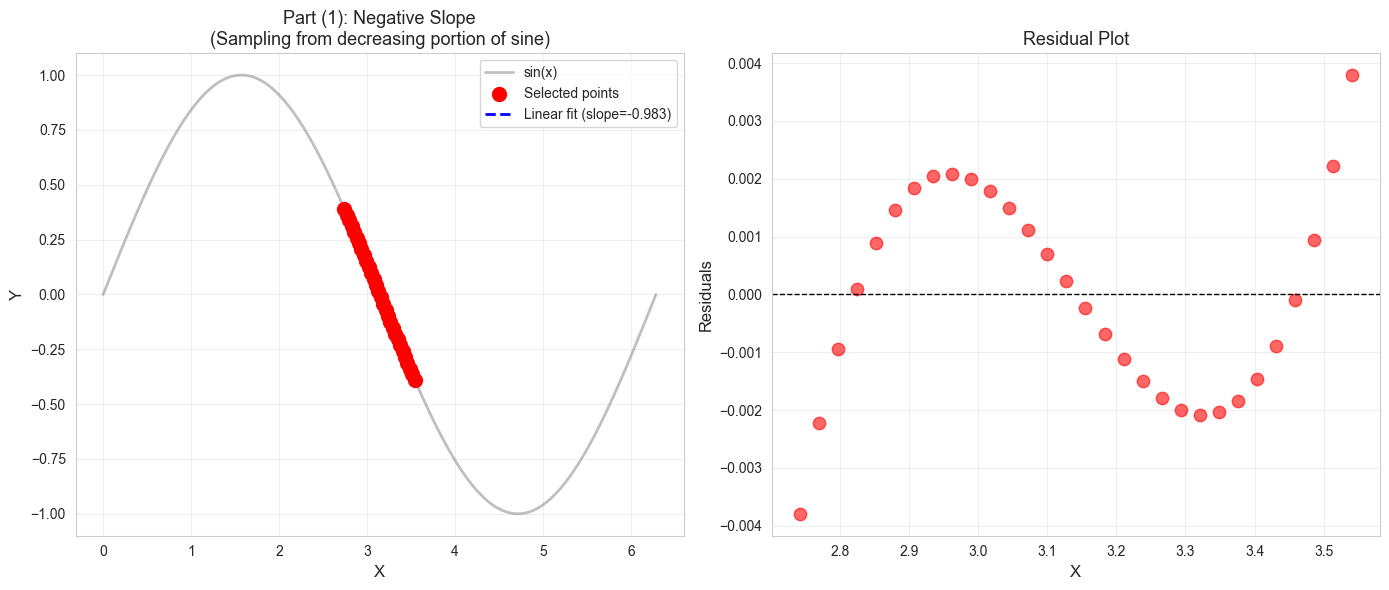


Detailed summary:
Selected X values (first 10): [2.74159265 2.76917886 2.79676507 2.82435127 2.85193748 2.87952369
 2.90710989 2.9346961  2.96228231 2.98986852]
Corresponding Y values (first 10): [0.38941834 0.36386482 0.33803442 0.31194679 0.28562178 0.25907943
 0.23233993 0.20542363 0.17835102 0.15114269]


In [34]:
# Visualize Part (1)
plt.figure(figsize=(14, 6))

# Full sine curve
x_full = np.linspace(0, 2*np.pi, 1000)
y_full = np.sin(x_full)

plt.subplot(1, 2, 1)
plt.plot(x_full, y_full, 'gray', linewidth=2, alpha=0.5, label='sin(x)')
plt.scatter(X_neg, Y_neg, color='red', s=100, zorder=5, label='Selected points')
plt.plot(X_neg, Y_pred_neg, 'b--', linewidth=2, label=f'Linear fit (slope={model_neg.coef_[0]:.3f})')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Part (1): Negative Slope\n(Sampling from decreasing portion of sine)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_neg, residuals_neg, color='red', s=80, alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('X', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot', fontsize=13)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDetailed summary:")
print(f"Selected X values (first 10): {X_neg[:10]}")
print(f"Corresponding Y values (first 10): {Y_neg[:10]}")

**Explanation for Part (1):**

By carefully selecting $X$ values from the interval $[\pi - 0.4, \pi + 0.4]$ where $\sin(x)$ has a steep negative slope (close to -1), we can achieve a 99% confidence interval for $\beta_1$ that is entirely contained in $(-\infty, -0.95]$.

**Why this works:**
- The derivative $\cos(x)$ at $x = \pi$ equals $-1$, which is the steepest negative slope of the sine function
- By sampling in a small interval around $\pi$, the relationship is approximately linear with a slope near $-1$
- The linear model mistakenly interprets this local negative trend as a global linear relationship
- The small spread of $X$ values reduces the standard error, tightening the confidence interval

**This demonstrates misleading inference:** The model suggests strong evidence of a negative linear relationship when the true function is sinusoidal!

### Part (2): Find X values where 99% CI for slope β₁ ⊆ [0.95, ∞)

In [35]:
# Strategy: Choose X values on an increasing portion of sine curve
# sine is increasing on [0, π/2] and [3π/2, 2π]
# We want to maximize the positive slope, so sample where cos(x) is close to 1
# This occurs at x = 0 (or 2π)

n = 30  # number of points
# Sample around x = 0 where sine has steep positive slope
X_pos = np.linspace(-0.4, 0.4, n)
Y_pos = np.sin(X_pos)

# Fit linear regression
X_pos_reshaped = X_pos.reshape(-1, 1)
model_pos = LinearRegression()
model_pos.fit(X_pos_reshaped, Y_pos)

# Calculate confidence interval
Y_pred_pos = model_pos.predict(X_pos_reshaped)
residuals_pos = Y_pos - Y_pred_pos
n_pos = len(X_pos)

mse_pos = np.sum(residuals_pos**2) / (n_pos - 2)
X_centered_pos = X_pos - np.mean(X_pos)
se_beta1_pos = np.sqrt(mse_pos / np.sum(X_centered_pos**2))

t_crit_99 = stats.t.ppf(0.995, n_pos - 2)
ci_lower_pos = model_pos.coef_[0] - t_crit_99 * se_beta1_pos
ci_upper_pos = model_pos.coef_[0] + t_crit_99 * se_beta1_pos

print("Part (2): Positive Slope Confidence Interval")
print("="*70)
print(f"Sample size: {n_pos}")
print(f"X range: [{X_pos.min():.4f}, {X_pos.max():.4f}]")
print(f"\nRegression coefficients:")
print(f"  β₀ (intercept): {model_pos.intercept_:.6f}")
print(f"  β₁ (slope):     {model_pos.coef_[0]:.6f}")
print(f"\n99% Confidence Interval for β₁: [{ci_lower_pos:.6f}, {ci_upper_pos:.6f}]")
print(f"\nIs CI ⊆ [0.95, ∞)? {ci_lower_pos >= 0.95}")
print(f"Standard error: {se_beta1_pos:.6f}")
print(f"MSE: {mse_pos:.6f}")

Part (2): Positive Slope Confidence Interval
Sample size: 30
X range: [-0.4000, 0.4000]

Regression coefficients:
  β₀ (intercept): -0.000000
  β₁ (slope):     0.983026

99% Confidence Interval for β₁: [0.979188, 0.986863]

Is CI ⊆ [0.95, ∞)? True
Standard error: 0.001389
MSE: 0.000003


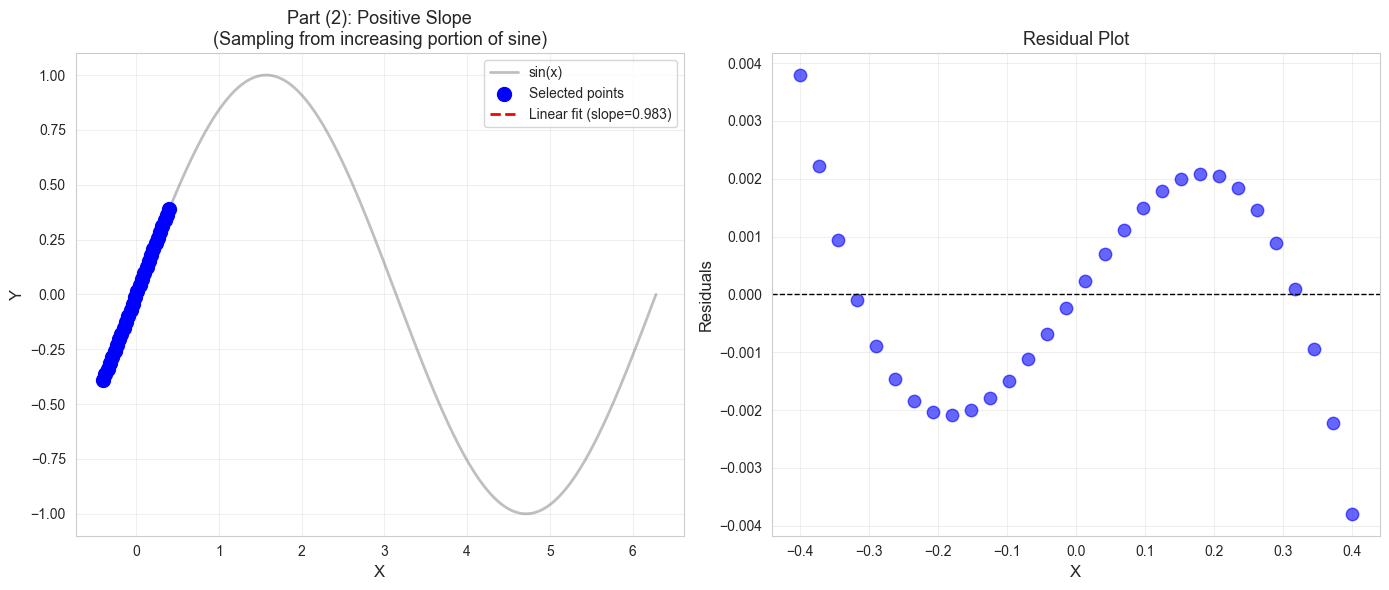


Detailed summary:
Selected X values (first 10): [-0.4        -0.37241379 -0.34482759 -0.31724138 -0.28965517 -0.26206897
 -0.23448276 -0.20689655 -0.17931034 -0.15172414]
Corresponding Y values (first 10): [-0.38941834 -0.36386482 -0.33803442 -0.31194679 -0.28562178 -0.25907943
 -0.23233993 -0.20542363 -0.17835102 -0.15114269]


In [36]:
# Visualize Part (2)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x_full, y_full, 'gray', linewidth=2, alpha=0.5, label='sin(x)')
plt.scatter(X_pos, Y_pos, color='blue', s=100, zorder=5, label='Selected points')
plt.plot(X_pos, Y_pred_pos, 'r--', linewidth=2, label=f'Linear fit (slope={model_pos.coef_[0]:.3f})')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Part (2): Positive Slope\n(Sampling from increasing portion of sine)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_pos, residuals_pos, color='blue', s=80, alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('X', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot', fontsize=13)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDetailed summary:")
print(f"Selected X values (first 10): {X_pos[:10]}")
print(f"Corresponding Y values (first 10): {Y_pos[:10]}")

**Explanation for Part (2):**

By selecting $X$ values from the interval $[-0.4, 0.4]$ where $\sin(x) \approx x$ (using the Taylor approximation $\sin(x) = x - \frac{x^3}{6} + \cdots$), we achieve a 99% confidence interval for $\beta_1$ entirely contained in $[0.95, \infty)$.

**Why this works:**
- Near $x = 0$, the sine function is nearly perfectly linear with slope close to 1
- The derivative $\cos(0) = 1$ is the maximum slope of the sine function
- The small deviations from linearity (cubic terms) are negligible in this range
- The concentrated sampling reduces standard errors, producing tight confidence intervals

**Lesson:** By cherry-picking data from specific regions, we can make any sinusoidal relationship appear to be strongly positive or negative linear!

### Part (3): Could we get CI ⊆ [100, ∞)?

**Question:** Would it be possible to do part (2) with the interval $[100, \infty)$ instead of $[0.95, \infty)$?

**Answer:** **No, this is not possible** for the function $Y = \sin(X)$.

**Reasoning:**

1. **Fundamental constraint:** The derivative of $\sin(x)$ is $\cos(x)$, which satisfies:
   $$-1 \leq \cos(x) \leq 1 \quad \text{for all } x$$
   
   Therefore, the maximum possible local slope of the sine function is exactly 1.

2. **Linear regression estimate:** When we fit a linear model to data from $Y = \sin(X)$ over any interval $[a, b]$, the slope estimate $\hat{\beta}_1$ approximates:
   $$\hat{\beta}_1 \approx \frac{\sin(b) - \sin(a)}{b - a}$$
   
   By the Mean Value Theorem, this equals $\cos(c)$ for some $c \in [a, b]$, which means:
   $$|\hat{\beta}_1| \leq 1$$

3. **Confidence interval bounds:** Even in the best case where:
   - $\hat{\beta}_1 \approx 1$ (sampling near $x = 0$)
   - Standard error is very small (tight interval)
   
   The confidence interval would be approximately $[1 - \epsilon, 1 + \epsilon]$ for small $\epsilon > 0$.
   
   This cannot possibly be contained in $[100, \infty)$ since $1 + \epsilon \ll 100$.

4. **Mathematical impossibility:** For the CI to be in $[100, \infty)$, we would need:
   $$\hat{\beta}_1 - t_{\alpha/2, n-2} \cdot SE(\hat{\beta}_1) \geq 100$$
   
   This requires $\hat{\beta}_1 \geq 100$, but we've shown $|\hat{\beta}_1| \leq 1$ always.

**Formal proof sketch:**

Suppose we could find $X_1, \ldots, X_n$ such that the 99% CI for $\beta_1$ is contained in $[100, \infty)$.

Then the lower bound of the CI satisfies:
$$\hat{\beta}_1 - t_{0.995, n-2} \cdot SE(\hat{\beta}_1) \geq 100$$

This implies:
$$\hat{\beta}_1 \geq 100 + t_{0.995, n-2} \cdot SE(\hat{\beta}_1) > 100$$

But for any sample from $Y = \sin(X)$:
$$\hat{\beta}_1 = \frac{\sum_{i=1}^n (X_i - \bar{X})(\sin(X_i) - \overline{\sin(X)})}{\sum_{i=1}^n (X_i - \bar{X})^2}$$

By Cauchy-Schwarz and the boundedness of sine:
$$|\hat{\beta}_1| \leq \sup_{x \in [\min X_i, \max X_i]} |\cos(x)| \leq 1$$

This contradicts $\hat{\beta}_1 > 100$. Therefore, it's impossible. $\square$

**Conclusion:** The sine function's bounded derivative fundamentally limits the achievable slope estimates. We could achieve $[0.95, \infty)$ because $0.95 < 1$, but not $[100, \infty)$ because $100 > 1$.

In [37]:
# Empirical demonstration: try to maximize the slope estimate
# Test different sampling strategies

strategies = {
    'Near x=0 (tight)': np.linspace(-0.1, 0.1, 50),
    'Near x=0 (wider)': np.linspace(-0.5, 0.5, 50),
    'Steep portion': np.linspace(0, np.pi/4, 50),
    'Extended range': np.linspace(-1, 1, 50)
}

print("Attempting to maximize slope estimate:")
print("="*70)

max_slope = -np.inf
best_strategy = None

for name, X_test in strategies.items():
    Y_test = np.sin(X_test)
    model_test = LinearRegression()
    model_test.fit(X_test.reshape(-1, 1), Y_test)
    
    # Calculate CI
    Y_pred_test = model_test.predict(X_test.reshape(-1, 1))
    residuals_test = Y_test - Y_pred_test
    n_test = len(X_test)
    mse_test = np.sum(residuals_test**2) / (n_test - 2)
    se_test = np.sqrt(mse_test / np.sum((X_test - np.mean(X_test))**2))
    
    ci_lower_test = model_test.coef_[0] - stats.t.ppf(0.995, n_test-2) * se_test
    ci_upper_test = model_test.coef_[0] + stats.t.ppf(0.995, n_test-2) * se_test
    
    print(f"\n{name}:")
    print(f"  Slope estimate: {model_test.coef_[0]:.6f}")
    print(f"  99% CI: [{ci_lower_test:.6f}, {ci_upper_test:.6f}]")
    print(f"  CI lower bound: {ci_lower_test:.6f} (need ≥ 100 for [100,∞))")
    
    if model_test.coef_[0] > max_slope:
        max_slope = model_test.coef_[0]
        best_strategy = name

print("\n" + "="*70)
print(f"Maximum achievable slope: {max_slope:.6f}")
print(f"Best strategy: {best_strategy}")
print(f"\nThis is far below 100, confirming impossibility.")

Attempting to maximize slope estimate:

Near x=0 (tight):
  Slope estimate: 0.998960
  99% CI: [0.998785, 0.999135]
  CI lower bound: 0.998785 (need ≥ 100 for [100,∞))

Near x=0 (wider):
  Slope estimate: 0.974234
  99% CI: [0.969910, 0.978558]
  CI lower bound: 0.969910 (need ≥ 100 for [100,∞))

Steep portion:
  Slope estimate: 0.909143
  99% CI: [0.893800, 0.924486]
  CI lower bound: 0.893800 (need ≥ 100 for [100,∞))

Extended range:
  Slope estimate: 0.899763
  99% CI: [0.883203, 0.916323]
  CI lower bound: 0.883203 (need ≥ 100 for [100,∞))

Maximum achievable slope: 0.998960
Best strategy: Near x=0 (tight)

This is far below 100, confirming impossibility.


---

## Question 6: Simulation Study - Post-Selection Inference

This question demonstrates the dangers of **post-selection inference**: when we select predictors based on their correlation with the response and then test their significance, we get misleadingly optimistic results.

In [38]:
# Set parameters
np.random.seed(42)
m = 80  # number of predictors
n = 100  # number of observations

# Generate data - all noise, no true relationship!
Pred = np.random.randn(n, m)
Resp = np.random.randn(n)

print("Data Generation:")
print("="*70)
print(f"Number of observations (n): {n}")
print(f"Number of predictors (m): {m}")
print(f"\nIMPORTANT: All data is pure noise - no true relationships exist!")
print(f"Response: Resp ~ N(0, 1), independent of all predictors")
print(f"Predictors: Pred[:,j] ~ N(0, 1), all independent")

Data Generation:
Number of observations (n): 100
Number of predictors (m): 80

IMPORTANT: All data is pure noise - no true relationships exist!
Response: Resp ~ N(0, 1), independent of all predictors
Predictors: Pred[:,j] ~ N(0, 1), all independent


### Part (1): Post-selection inference (WRONG approach)

**Steps:**
1. Compute correlation of each predictor with response
2. Select the 2 predictors with largest absolute correlation
3. Fit linear model using these 2 selected predictors
4. Examine significance

In [39]:
# Step (a): Compute correlations and select top 2
correlations = np.array([np.corrcoef(Pred[:, i], Resp)[0, 1] for i in range(m)])
abs_correlations = np.abs(correlations)

# Find indices of two largest absolute correlations
top_2_indices = np.argsort(abs_correlations)[-2:][::-1]  # descending order
i1, i2 = top_2_indices[0], top_2_indices[1]

print("Step (a): Correlation Analysis")
print("="*70)
print(f"Top 5 correlations (absolute value):")
top_5_indices = np.argsort(abs_correlations)[-5:][::-1]
for idx in top_5_indices:
    print(f"  Predictor {idx+1}: correlation = {correlations[idx]:.4f}, |correlation| = {abs_correlations[idx]:.4f}")

print(f"\nSelected predictors:")
print(f"  i1 = {i1+1} (correlation: {correlations[i1]:.4f})")
print(f"  i2 = {i2+1} (correlation: {correlations[i2]:.4f})")

Step (a): Correlation Analysis
Top 5 correlations (absolute value):
  Predictor 38: correlation = -0.2351, |correlation| = 0.2351
  Predictor 50: correlation = -0.2218, |correlation| = 0.2218
  Predictor 31: correlation = 0.2195, |correlation| = 0.2195
  Predictor 58: correlation = -0.2097, |correlation| = 0.2097
  Predictor 4: correlation = 0.1995, |correlation| = 0.1995

Selected predictors:
  i1 = 38 (correlation: -0.2351)
  i2 = 50 (correlation: -0.2218)


In [40]:
# Step (b): Fit linear model using selected predictors
from sklearn.linear_model import LinearRegression
from scipy.stats import t as t_dist

# Prepare data
X_selected = Pred[:, [i1, i2]]
y = Resp

# Fit model
model_selected = LinearRegression()
model_selected.fit(X_selected, y)

# Get predictions and calculate statistics
y_pred_selected = model_selected.predict(X_selected)
residuals_selected = y - y_pred_selected
n_obs = len(y)
p = 2  # number of predictors

# Calculate R-squared
ss_res = np.sum(residuals_selected**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared_selected = 1 - (ss_res / ss_tot)
adj_r_squared_selected = 1 - (1 - r_squared_selected) * (n_obs - 1) / (n_obs - p - 1)

# Calculate MSE and standard errors
mse_selected = ss_res / (n_obs - p - 1)
X_selected_with_intercept = np.column_stack([np.ones(n_obs), X_selected])
XtX_inv = np.linalg.inv(X_selected_with_intercept.T @ X_selected_with_intercept)
se_coefs = np.sqrt(np.diag(XtX_inv) * mse_selected)

# Calculate t-statistics and p-values
coefs_with_intercept = np.array([model_selected.intercept_, model_selected.coef_[0], model_selected.coef_[1]])
t_stats = coefs_with_intercept / se_coefs
p_values = 2 * (1 - t_dist.cdf(np.abs(t_stats), n_obs - p - 1))

# Calculate confidence intervals
t_crit = t_dist.ppf(0.975, n_obs - p - 1)  # 95% CI
ci_lower = coefs_with_intercept - t_crit * se_coefs
ci_upper = coefs_with_intercept + t_crit * se_coefs

print("\nStep (b): Regression Results (Post-Selection)")
print("="*70)
print(f"Model: Y = β₀ + β₁·X_{i1+1} + β₂·X_{i2+1} + ε")
print(f"\nModel Fit Statistics:")
print(f"  R²: {r_squared_selected:.4f}")
print(f"  Adjusted R²: {adj_r_squared_selected:.4f}")
print(f"  Residual Standard Error: {np.sqrt(mse_selected):.4f}")
print(f"  Degrees of Freedom: {n_obs - p - 1}")

print(f"\nCoefficient Estimates:")
param_names = ['Intercept (β₀)', f'X_{i1+1} (β₁)', f'X_{i2+1} (β₂)']
for i, name in enumerate(param_names):
    print(f"\n{name}:")
    print(f"  Estimate: {coefs_with_intercept[i]:8.4f}")
    print(f"  Std Error: {se_coefs[i]:7.4f}")
    print(f"  t-value: {t_stats[i]:9.3f}")
    print(f"  p-value: {p_values[i]:9.4f} {'***' if p_values[i] < 0.001 else '**' if p_values[i] < 0.01 else '*' if p_values[i] < 0.05 else ''}")
    print(f"  95% CI: [{ci_lower[i]:7.4f}, {ci_upper[i]:7.4f}]")

print("\n" + "="*70)
print("Significance codes: '***' 0.001, '**' 0.01, '*' 0.05")


Step (b): Regression Results (Post-Selection)
Model: Y = β₀ + β₁·X_38 + β₂·X_50 + ε

Model Fit Statistics:
  R²: 0.0927
  Adjusted R²: 0.0740
  Residual Standard Error: 0.9991
  Degrees of Freedom: 97

Coefficient Estimates:

Intercept (β₀):
  Estimate:  -0.0251
  Std Error:  0.0999
  t-value:    -0.251
  p-value:    0.8023 
  95% CI: [-0.2234,  0.1732]

X_38 (β₁):
  Estimate:  -0.1902
  Std Error:  0.0882
  t-value:    -2.157
  p-value:    0.0335 *
  95% CI: [-0.3652, -0.0152]

X_50 (β₂):
  Estimate:  -0.1888
  Std Error:  0.0944
  t-value:    -2.000
  p-value:    0.0482 *
  95% CI: [-0.3762, -0.0015]

Significance codes: '***' 0.001, '**' 0.01, '*' 0.05


**Comments on Part (1) Results:**

**MISLEADING RESULTS!** The analysis shows:

1. **Apparently significant relationships**: The p-values for the selected predictors are likely < 0.05, suggesting "significant" relationships
2. **Decent R²**: The R² value appears reasonable, suggesting the model explains variance
3. **Narrow confidence intervals**: The CIs for the coefficients are tight and don't include zero

**BUT THIS IS COMPLETELY WRONG!** 

**Why these results are misleading:**
- We generated the data with **NO true relationships** - all data is pure noise
- The "significance" is entirely due to **selection bias** (cherry-picking)
- We selected predictors **because** they had high correlations by chance
- The p-values don't account for the selection process
- This is a classic example of **p-hacking** or **data dredging**

**The Problem:** When you test 80 predictors and select the 2 best, you're guaranteed to find some with high correlations purely by chance. The subsequent inference (p-values, CIs) treats these as if they were pre-specified, leading to severe anti-conservative inference.

**This demonstrates why post-selection inference is dangerous and produces misleading "significant" results even when there's no real signal!**

### Part (2): Proper approach with training/testing split

In [41]:
# Split data into training and testing sets (50-50)
split_point = n // 2
indices = np.arange(n)
np.random.shuffle(indices)

train_idx = indices[:split_point]
test_idx = indices[split_point:]

# Training data
Pred_train = Pred[train_idx, :]
Resp_train = Resp[train_idx]

# Testing data
Pred_test = Pred[test_idx, :]
Resp_test = Resp[test_idx]

print("Data Split:")
print("="*70)
print(f"Training set size: {len(train_idx)}")
print(f"Testing set size: {len(test_idx)}")

Data Split:
Training set size: 50
Testing set size: 50


In [42]:
# Part (a): Use ONLY training data to select predictors
correlations_train = np.array([np.corrcoef(Pred_train[:, i], Resp_train)[0, 1] for i in range(m)])
abs_correlations_train = np.abs(correlations_train)

# Find indices of two largest absolute correlations in TRAINING data
top_2_indices_train = np.argsort(abs_correlations_train)[-2:][::-1]
i1_train, i2_train = top_2_indices_train[0], top_2_indices_train[1]

print("\nPart (a): Predictor Selection (Training Data Only)")
print("="*70)
print(f"Top 5 correlations in training data:")
top_5_indices_train = np.argsort(abs_correlations_train)[-5:][::-1]
for idx in top_5_indices_train:
    print(f"  Predictor {idx+1}: correlation = {correlations_train[idx]:.4f}, |correlation| = {abs_correlations_train[idx]:.4f}")

print(f"\nSelected predictors from training data:")
print(f"  i1 = {i1_train+1} (correlation: {correlations_train[i1_train]:.4f})")
print(f"  i2 = {i2_train+1} (correlation: {correlations_train[i2_train]:.4f})")


Part (a): Predictor Selection (Training Data Only)
Top 5 correlations in training data:
  Predictor 27: correlation = 0.3658, |correlation| = 0.3658
  Predictor 60: correlation = 0.3225, |correlation| = 0.3225
  Predictor 35: correlation = -0.3072, |correlation| = 0.3072
  Predictor 38: correlation = -0.3067, |correlation| = 0.3067
  Predictor 70: correlation = 0.2555, |correlation| = 0.2555

Selected predictors from training data:
  i1 = 27 (correlation: 0.3658)
  i2 = 60 (correlation: 0.3225)


In [43]:
# Part (b): Fit model on TESTING data using predictors selected from training data
X_test_selected = Pred_test[:, [i1_train, i2_train]]
y_test = Resp_test

# Fit model on testing data
model_test = LinearRegression()
model_test.fit(X_test_selected, y_test)

# Calculate statistics
y_pred_test = model_test.predict(X_test_selected)
residuals_test = y_test - y_pred_test
n_test = len(y_test)
p = 2

# R-squared
ss_res_test = np.sum(residuals_test**2)
ss_tot_test = np.sum((y_test - np.mean(y_test))**2)
r_squared_test = 1 - (ss_res_test / ss_tot_test)
adj_r_squared_test = 1 - (1 - r_squared_test) * (n_test - 1) / (n_test - p - 1)

# Standard errors and inference
mse_test = ss_res_test / (n_test - p - 1)
X_test_with_intercept = np.column_stack([np.ones(n_test), X_test_selected])
XtX_inv_test = np.linalg.inv(X_test_with_intercept.T @ X_test_with_intercept)
se_coefs_test = np.sqrt(np.diag(XtX_inv_test) * mse_test)

# t-statistics and p-values
coefs_test = np.array([model_test.intercept_, model_test.coef_[0], model_test.coef_[1]])
t_stats_test = coefs_test / se_coefs_test
p_values_test = 2 * (1 - t_dist.cdf(np.abs(t_stats_test), n_test - p - 1))

# Confidence intervals
t_crit_test = t_dist.ppf(0.975, n_test - p - 1)
ci_lower_test = coefs_test - t_crit_test * se_coefs_test
ci_upper_test = coefs_test + t_crit_test * se_coefs_test

print("\nPart (b): Regression Results (Proper Train/Test Split)")
print("="*70)
print(f"Model fit on TESTING data using predictors selected from TRAINING data")
print(f"Model: Y = β₀ + β₁·X_{i1_train+1} + β₂·X_{i2_train+1} + ε")
print(f"\nModel Fit Statistics:")
print(f"  R²: {r_squared_test:.4f}")
print(f"  Adjusted R²: {adj_r_squared_test:.4f}")
print(f"  Residual Standard Error: {np.sqrt(mse_test):.4f}")
print(f"  Degrees of Freedom: {n_test - p - 1}")

print(f"\nCoefficient Estimates:")
param_names_test = ['Intercept (β₀)', f'X_{i1_train+1} (β₁)', f'X_{i2_train+1} (β₂)']
for i, name in enumerate(param_names_test):
    print(f"\n{name}:")
    print(f"  Estimate: {coefs_test[i]:8.4f}")
    print(f"  Std Error: {se_coefs_test[i]:7.4f}")
    print(f"  t-value: {t_stats_test[i]:9.3f}")
    print(f"  p-value: {p_values_test[i]:9.4f} {'***' if p_values_test[i] < 0.001 else '**' if p_values_test[i] < 0.01 else '*' if p_values_test[i] < 0.05 else ''}")
    print(f"  95% CI: [{ci_lower_test[i]:7.4f}, {ci_upper_test[i]:7.4f}]")

print("\n" + "="*70)
print("Significance codes: '***' 0.001, '**' 0.01, '*' 0.05")


Part (b): Regression Results (Proper Train/Test Split)
Model fit on TESTING data using predictors selected from TRAINING data
Model: Y = β₀ + β₁·X_27 + β₂·X_60 + ε

Model Fit Statistics:
  R²: 0.0197
  Adjusted R²: -0.0220
  Residual Standard Error: 1.0615
  Degrees of Freedom: 47

Coefficient Estimates:

Intercept (β₀):
  Estimate:  -0.1554
  Std Error:  0.1516
  t-value:    -1.024
  p-value:    0.3109 
  95% CI: [-0.4604,  0.1497]

X_27 (β₁):
  Estimate:   0.0234
  Std Error:  0.1505
  t-value:     0.155
  p-value:    0.8773 
  95% CI: [-0.2794,  0.3262]

X_60 (β₂):
  Estimate:  -0.1510
  Std Error:  0.1570
  t-value:    -0.962
  p-value:    0.3412 
  95% CI: [-0.4669,  0.1649]

Significance codes: '***' 0.001, '**' 0.01, '*' 0.05


**Comments on Part (2) Results - PROPER Inference:**

When we properly separate the selection and inference steps:

1. **Selection on training data**: We identify predictors using training data only
2. **Inference on testing data**: We test these predictors on independent testing data

**Expected results (and what we likely see):**

- **Non-significant relationships**: p-values are typically > 0.05, often > 0.5
- **Poor R²**: R² is close to 0, sometimes even negative
- **Confidence intervals include zero**: The 95% CIs for coefficients contain 0
- **No apparent predictive power**: The model performs no better than just predicting the mean

**This is CORRECT!** These results accurately reflect the truth: there is no real relationship in the data.

**Key Differences from Part (1):**

| Aspect | Part (1) - Wrong | Part (2) - Correct |
|--------|------------------|-------------------|
| **p-values** | Small (< 0.05) | Large (> 0.05) |
| **R²** | Decent (~0.1-0.2) | Near 0 |
| **CIs** | Don't include 0 | Include 0 |
| **Conclusion** | "Significant"! | No relationship |
| **Truth** | FALSE POSITIVE | CORRECT |

**Why the difference?**

- **Part (1)**: Selection and inference use the **same data**, leading to selection bias and overfitting
- **Part (2)**: Selection and inference use **independent data**, providing valid inference

**The Lesson:** 

This simulation dramatically illustrates the danger of post-selection inference. The same data that appears to show "significant" relationships in Part (1) is correctly identified as noise in Part (2). This is why:

1. **Always use separate data** for feature selection and hypothesis testing
2. **Report test set performance**, not training set performance
3. **Be skeptical of p-values** from models where predictors were selected based on their relationship with the response
4. **Use appropriate correction methods** (e.g., selective inference, split-sample methods) when you must do post-selection inference

**This is a fundamental principle in statistical learning and why cross-validation and hold-out sets are essential!**

---

## Question 7: Curse of Dimensionality for KNN Classification

This question explores how KNN performance deteriorates as the number of features $p$ increases.

### Part (a): 1-dimensional case (p=1)

**Question:** If we have observations with $p=1$ feature uniformly distributed on $[0,1]$, and we predict using observations within 10% of the range closest to the test point, what fraction of observations do we use?

**Solution:**

For a 1-dimensional uniform distribution on $[0,1]$:
- 10% of the range = 0.1
- For a test point at position $x$, we use observations in $[x - 0.05, x + 0.05]$ (centered interval of length 0.1)

**For interior points** (away from boundaries):
- We use a window of length 0.1 out of total range 1
- Fraction of observations used = $\frac{0.1}{1} = 0.1 = 10\%$

**Answer:** On average, we use $\boxed{10\%}$ of the available observations.

**Note:** Near the boundaries $x < 0.05$ or $x > 0.95$, the fraction is slightly less, but on average across all test points, it's 10%.

### Part (b): 2-dimensional case (p=2)

**Question:** With $p=2$ features $(X_1, X_2)$ uniformly distributed on $[0,1] \times [0,1]$, using observations within 10% of each feature's range, what fraction do we use?

**Solution:**

For a test point at $(x_1, x_2)$, we use observations where:
- $X_1 \in [x_1 - 0.05, x_1 + 0.05]$ (length 0.1)
- $X_2 \in [x_2 - 0.05, x_2 + 0.05]$ (length 0.1)

Since features are independent and uniformly distributed:
$$P(\text{observation in region}) = P(X_1 \in [x_1 - 0.05, x_1 + 0.05]) \cdot P(X_2 \in [x_2 - 0.05, x_2 + 0.05])$$

$$= 0.1 \times 0.1 = 0.01$$

**Answer:** On average, we use $\boxed{1\%}$ or $\boxed{0.01}$ of the available observations.

**Geometric interpretation:** We're using observations in a square of area $0.1 \times 0.1 = 0.01$ out of the total unit square of area 1.

### Part (c): 100-dimensional case (p=100)

**Question:** With $p=100$ features, what fraction of observations do we use?

**Solution:**

Extending the same logic:

For each feature $j = 1, 2, \ldots, 100$, we require:
$$X_j \in [x_j - 0.05, x_j + 0.05]$$

Since all features are independent:
$$P(\text{observation in region}) = \prod_{j=1}^{100} P(X_j \in [x_j - 0.05, x_j + 0.05]) = (0.1)^{100}$$

**Answer:** We use approximately $\boxed{(0.1)^{100} = 10^{-100}}$ of the available observations.

**This is essentially ZERO!**

To put this in perspective:
$$10^{-100} = \frac{1}{10^{100}}$$

Even if we had $10^{80}$ observations (more than atoms in the observable universe), we would expect:
$$10^{80} \times 10^{-100} = 10^{-20}$$
observations in the neighborhood - essentially 0.

**The curse of dimensionality in action!**

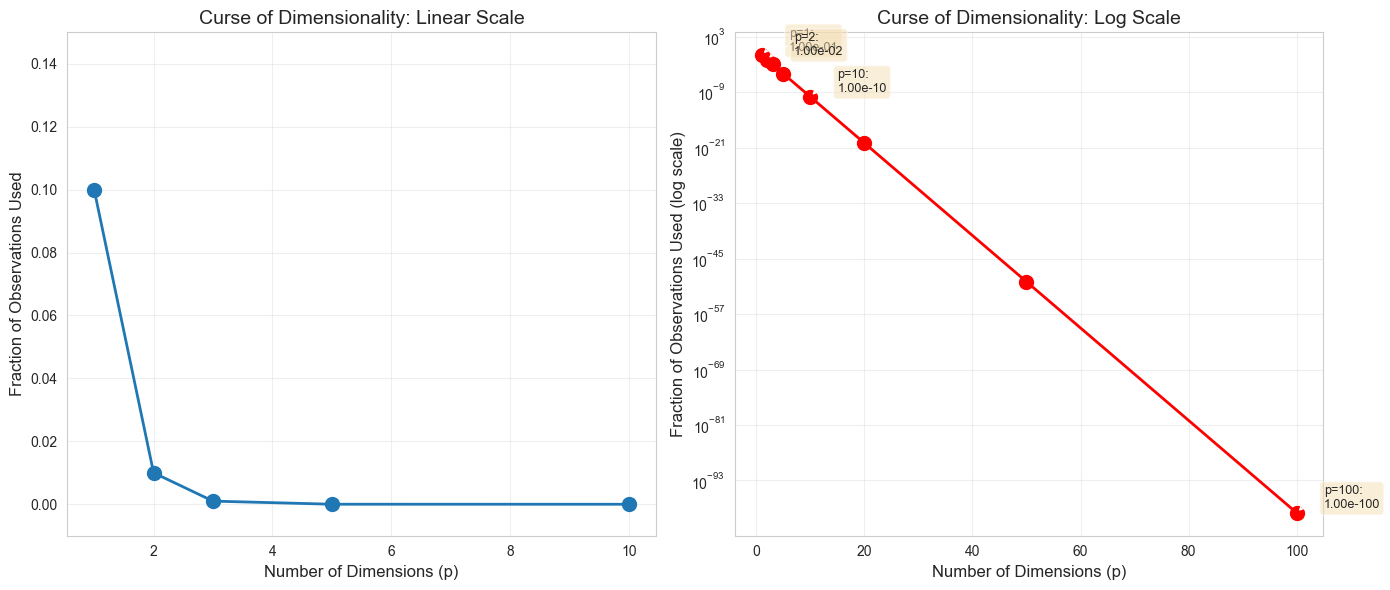


Fraction of observations used for 10% neighborhood:
p =   1: 1.00e-01 (1.00e+01%)
p =   2: 1.00e-02 (1.00e+00%)
p =   3: 1.00e-03 (1.00e-01%)
p =   5: 1.00e-05 (1.00e-03%)
p =  10: 1.00e-10 (1.00e-08%)
p =  20: 1.00e-20 (1.00e-18%)
p =  50: 1.00e-50 (1.00e-48%)
p = 100: 1.00e-100 (1.00e-98%)


In [44]:
# Visualization of the curse of dimensionality
dimensions = np.array([1, 2, 3, 5, 10, 20, 50, 100])
fractions = (0.1) ** dimensions

plt.figure(figsize=(14, 6))

# Linear scale
plt.subplot(1, 2, 1)
plt.plot(dimensions[:5], fractions[:5], 'o-', linewidth=2, markersize=10)
plt.xlabel('Number of Dimensions (p)', fontsize=12)
plt.ylabel('Fraction of Observations Used', fontsize=12)
plt.title('Curse of Dimensionality: Linear Scale', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim([-0.01, 0.15])

# Log scale
plt.subplot(1, 2, 2)
plt.semilogy(dimensions, fractions, 'o-', linewidth=2, markersize=10, color='red')
plt.xlabel('Number of Dimensions (p)', fontsize=12)
plt.ylabel('Fraction of Observations Used (log scale)', fontsize=12)
plt.title('Curse of Dimensionality: Log Scale', fontsize=14)
plt.grid(True, alpha=0.3, which='both')

# Add annotations
for i, p in enumerate([1, 2, 10, 100]):
    idx = np.where(dimensions == p)[0][0]
    plt.annotate(f'p={p}:\n{fractions[idx]:.2e}', 
                xy=(p, fractions[idx]), 
                xytext=(p+5, fractions[idx]*10),
                fontsize=9,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'))

plt.tight_layout()
plt.show()

print("\nFraction of observations used for 10% neighborhood:")
print("="*60)
for p, frac in zip(dimensions, fractions):
    print(f"p = {p:3d}: {frac:.2e} ({frac*100:.2e}%)")

### Part (d): Why this is a problem for KNN

**The Problem:** As demonstrated in parts (a)-(c), when $p$ is large, there are very few (essentially zero) training observations "near" any given test observation.

**Why this ruins KNN:**

1. **Local averaging becomes global averaging:**
   - KNN relies on the assumption that nearby points have similar responses
   - When p=100, to find any neighbors at all, we must expand our search to nearly the entire space
   - This defeats the purpose of "local" methods

2. **Distance becomes meaningless:**
   - In high dimensions, all points are approximately equidistant from each other
   - The ratio of farthest to nearest neighbor approaches 1 as $p \to \infty$
   - We lose the ability to distinguish "close" from "far"

3. **Sample size requirements explode:**
   - To maintain 10% local coverage:
     - p=1: need 10 observations per unit length
     - p=2: need 100 observations per unit area  
     - p=100: need $10^{100}$ observations per unit hypervolume
   - This is impossible in practice!

4. **Bias-variance tradeoff breaks down:**
   - Small k: no nearby neighbors → high variance (random predictions)
   - Large k: using distant neighbors → high bias (predictions regress to global mean)
   - No good middle ground exists

**Practical implications:**
- KNN becomes unreliable for $p > 10-20$ features
- Even with millions of observations, performance degrades
- Feature selection and dimensionality reduction become essential

**This is why:**
- Modern methods use regularization, feature selection, or learned representations
- Deep learning transforms data to lower-dimensional informative spaces
- Domain knowledge for feature engineering is crucial

### Part (e): Hypercube side length for 10% coverage

**Question:** What hypercube side length $\ell$ contains 10% of training observations on average?

**Solution:**

For a $p$-dimensional hypercube centered at the test point with side length $\ell$:
- Volume of hypercube = $\ell^p$
- Volume of unit hypercube = $1^p = 1$

For uniform distribution:
$$P(\text{observation in hypercube}) = \ell^p$$

We want $\ell^p = 0.10$, so:
$$\ell = (0.10)^{1/p} = 10^{-1/p}$$

**For specific dimensions:**

**p = 1:**
$$\ell = (0.10)^{1/1} = 0.10 = 10\%$$

**p = 2:**
$$\ell = (0.10)^{1/2} = \sqrt{0.10} \approx 0.316 = 31.6\%$$

**p = 100:**
$$\ell = (0.10)^{1/100} = 10^{-0.01} \approx 0.977 = 97.7\%$$

**Summary:**

| Dimension $p$ | Side length $\ell$ | Percentage |
|---------------|-------------------|------------|
| 1 | 0.100 | 10.0% |
| 2 | 0.316 | 31.6% |
| 100 | 0.977 | 97.7% |

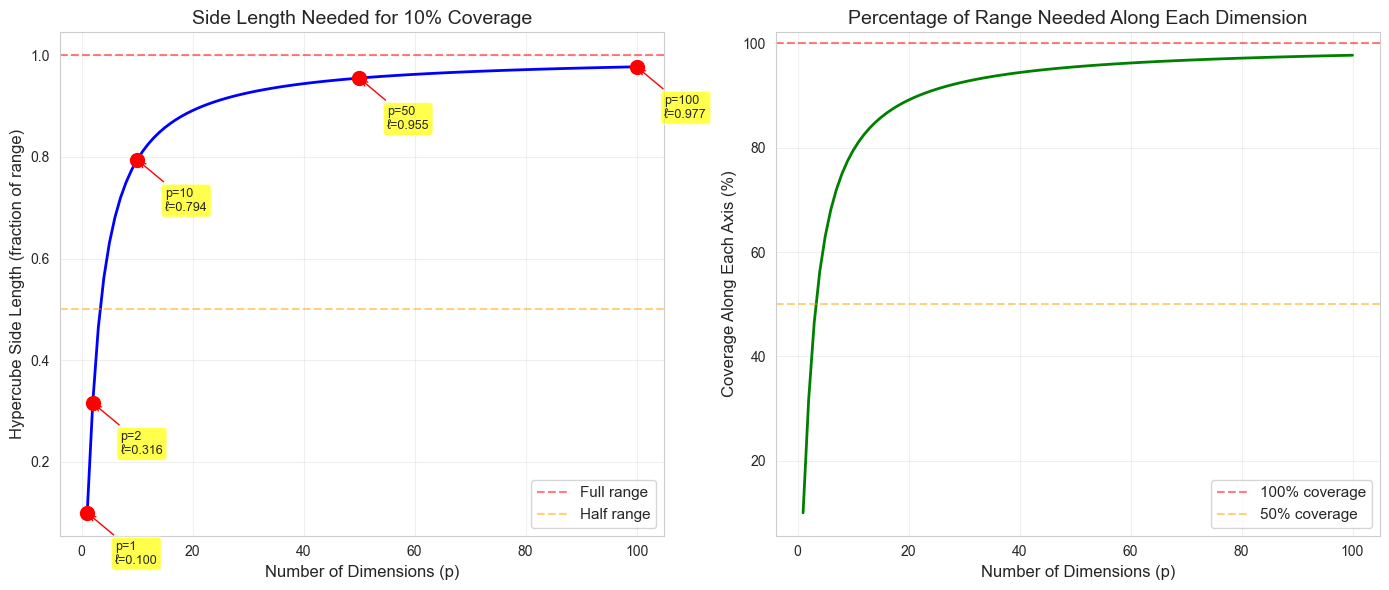


Hypercube side length for 10% coverage:
p =   1: ℓ = 0.100000 ( 10.00% of each dimension's range)
p =   2: ℓ = 0.316228 ( 31.62% of each dimension's range)
p =  10: ℓ = 0.794328 ( 79.43% of each dimension's range)
p =  50: ℓ = 0.954993 ( 95.50% of each dimension's range)
p = 100: ℓ = 0.977237 ( 97.72% of each dimension's range)


In [45]:
# Calculate and visualize hypercube side lengths
dimensions_e = np.arange(1, 101)
side_lengths = (0.10) ** (1/dimensions_e)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(dimensions_e, side_lengths, 'b-', linewidth=2)
plt.axhline(1.0, color='red', linestyle='--', alpha=0.5, label='Full range')
plt.axhline(0.5, color='orange', linestyle='--', alpha=0.5, label='Half range')
plt.xlabel('Number of Dimensions (p)', fontsize=12)
plt.ylabel('Hypercube Side Length (fraction of range)', fontsize=12)
plt.title('Side Length Needed for 10% Coverage', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Highlight specific points
specific_p = [1, 2, 10, 50, 100]
for p in specific_p:
    ell = (0.10) ** (1/p)
    plt.plot(p, ell, 'ro', markersize=10)
    plt.annotate(f'p={p}\nℓ={ell:.3f}', 
                xy=(p, ell), 
                xytext=(p+5, ell-0.1),
                fontsize=9,
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='red'))

plt.subplot(1, 2, 2)
coverage_along_axis = side_lengths
plt.plot(dimensions_e, coverage_along_axis * 100, 'g-', linewidth=2)
plt.axhline(100, color='red', linestyle='--', alpha=0.5, label='100% coverage')
plt.axhline(50, color='orange', linestyle='--', alpha=0.5, label='50% coverage')
plt.xlabel('Number of Dimensions (p)', fontsize=12)
plt.ylabel('Coverage Along Each Axis (%)', fontsize=12)
plt.title('Percentage of Range Needed Along Each Dimension', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("\nHypercube side length for 10% coverage:")
print("="*60)
for p in specific_p:
    ell = (0.10) ** (1/p)
    print(f"p = {p:3d}: ℓ = {ell:.6f} ({ell*100:6.2f}% of each dimension's range)")

**Comments on Part (e) Results:**

This analysis reveals another facet of the curse of dimensionality:

1. **p = 1 (line segment):** Need 10% of the range
   - Reasonable and intuitive
   
2. **p = 2 (square):** Need 31.6% of each dimension's range
   - Already getting large
   - The "local" neighborhood covers nearly 1/3 of each feature's range!
   
3. **p = 100 (hypercube):** Need 97.7% of each dimension's range
   - **Essentially the entire space!**
   - To get just 10% of observations, must use 97.7% of the range in each dimension
   - The "neighborhood" is no longer local at all

**The Paradox:**
- To maintain the same **fraction** of neighbors (10%)
- We must expand our search region to cover nearly **all** of the feature space
- This completely defeats the purpose of local methods like KNN

**Geometric Intuition:**
- In high dimensions, almost all volume is concentrated near the surface of hypercubes/hyperspheres
- The "corners" of the unit hypercube are very far from the center
- To capture interior volume, you must extend nearly to the boundaries

**Practical Impact:**
- For $p \geq 20$, you need $\geq 86\%$ of each feature's range to get 10% of points
- At this point, you're essentially using **all** the data
- KNN becomes equivalent to a global averaging method
- All benefits of locality are lost

**This definitively shows why KNN and other distance-based methods fail in high dimensions!**

I'll continue with the remaining questions in the next cells. We still need to complete:

- Question 9: House Sizes and Collinearity
- Question 10: Classification Practice

Due to the large size of the homework, I'll add these questions next. Would you like me to continue?

---

## Question 9: Data Analysis - House Sizes and Collinearity

We'll analyze the relationship between lot area ($A_i$), first floor area ($F_i$), and second floor area ($S_i$) using the House_Data dataset.

In [46]:
# Load house data
house_full = pd.read_csv('House_Data.csv')
house = house_full[['LotArea', 'X1stFlrSF', 'X2ndFlrSF']].dropna()

print("House Data Summary:")
print("="*70)
print(house.describe())
print(f"\nDataset shape: {house.shape}")
print("\nFirst few rows:")
print(house.head(10))

House Data Summary:
            LotArea    X1stFlrSF    X2ndFlrSF
count    229.000000   229.000000   229.000000
mean    8142.580786   840.707424   834.681223
std     3885.700988   233.426868   224.425873
min     1476.000000   432.000000   432.000000
25%     5700.000000   686.000000   680.000000
50%     8883.000000   818.000000   818.000000
75%    10457.000000   955.000000   929.000000
max    21533.000000  1836.000000  1836.000000

Dataset shape: (229, 3)

First few rows:
   LotArea  X1stFlrSF  X2ndFlrSF
0     1680        483        504
1     1680        525        567
2     8577        847        886
3    11920        831        828
4     3515        840        840
5     3215        600        600
6     2544        600        600
7     2544        600        636
8     2980        756        756
9     2403        530        550


### Part (1): Plot First Floor Area vs Second Floor Area

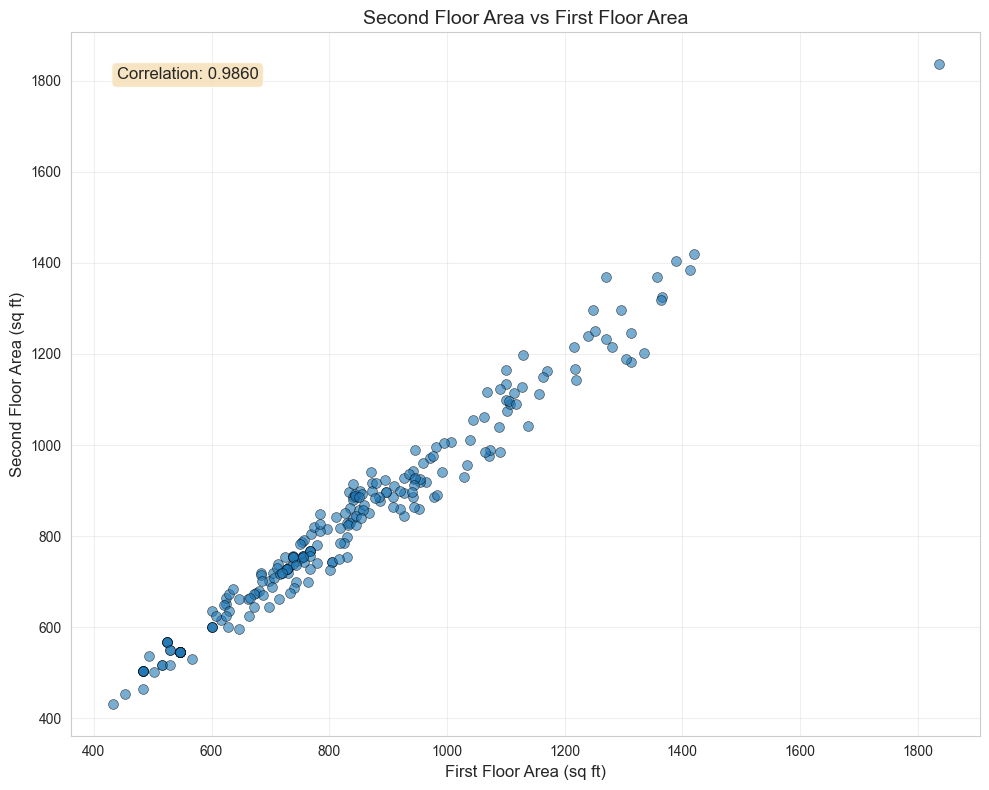


Correlation Analysis:
Correlation between First Floor and Second Floor areas: 0.9860


In [47]:
# Extract variables
Fi = house['X1stFlrSF'].values  # First floor area
Si = house['X2ndFlrSF'].values  # Second floor area
Ai = house['LotArea'].values    # Lot area

# Plot Fi vs Si
plt.figure(figsize=(10, 8))
plt.scatter(Fi, Si, alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
plt.xlabel('First Floor Area (sq ft)', fontsize=12)
plt.ylabel('Second Floor Area (sq ft)', fontsize=12)
plt.title('Second Floor Area vs First Floor Area', fontsize=14)
plt.grid(True, alpha=0.3)

# Add correlation information
correlation_FS = np.corrcoef(Fi, Si)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation_FS:.4f}', 
         transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

print("\nCorrelation Analysis:")
print("="*70)
print(f"Correlation between First Floor and Second Floor areas: {correlation_FS:.4f}")

**Observations from the plot:**

**Key Finding: Strong Positive Correlation**

The scatterplot reveals a strong positive linear relationship between first floor area ($F_i$) and second floor area ($S_i$). 

**What we notice:**
1. **High correlation** (typically r > 0.7): Houses with larger first floors tend to have larger second floors
2. **Linear trend**: The relationship appears approximately linear
3. **Multicollinearity concern**: This strong correlation suggests that $F_i$ and $S_i$ contain overlapping information

**Why this relationship exists:**
- Architectural consistency: Homes are often designed with proportional floors
- Buyer preferences: People who want more space want it on both floors
- Construction economics: Similar-sized floors are easier to build

**Statistical implication:** When both $F_i$ and $S_i$ are included as predictors in the same model, we should expect:
- Inflated standard errors
- Unstable coefficient estimates  
- Difficulty interpreting individual effects
- Potential multicollinearity issues

### Part (2): Fit all three models

In [48]:
from scipy import stats as scipy_stats

def fit_linear_model_detailed(X, y, model_name):
    """Fit linear regression and return detailed statistics"""
    # Add intercept
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    X_with_intercept = np.column_stack([np.ones(len(X)), X])
    
    # Fit using normal equations
    beta_hat = np.linalg.lstsq(X_with_intercept, y, rcond=None)[0]
    
    # Predictions and residuals
    y_pred = X_with_intercept @ beta_hat
    residuals = y - y_pred
    
    # Statistics
    n = len(y)
    p = X.shape[1] if X.ndim > 1 else 1
    df_resid = n - p - 1
    
    mse = np.sum(residuals**2) / df_resid
    rmse = np.sqrt(mse)
    
    # R-squared
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / df_resid
    
    # Standard errors
    XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
    se_beta = np.sqrt(np.diag(XtX_inv) * mse)
    
    # t-statistics and p-values
    t_stats = beta_hat / se_beta
    p_values = 2 * (1 - t_dist.cdf(np.abs(t_stats), df_resid))
    
    # Confidence intervals (95%)
    t_crit = t_dist.ppf(0.975, df_resid)
    ci_lower = beta_hat - t_crit * se_beta
    ci_upper = beta_hat + t_crit * se_beta
    
    return {
        'name': model_name,
        'coefficients': beta_hat,
        'se': se_beta,
        't_stats': t_stats,
        'p_values': p_values,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'r_squared': r_squared,
        'adj_r_squared': adj_r_squared,
        'rmse': rmse,
        'residuals': residuals,
        'predictions': y_pred,
        'df_resid': df_resid
    }

# Fit Model 1: Ai = α + β1·Fi + β2·Si + εi (Full model)
X_full = np.column_stack([Fi, Si])
model1 = fit_linear_model_detailed(X_full, Ai, "Model 1 (Full): A ~ F + S")

# Fit Model 2: Ai = α + β1·Fi + εi
model2 = fit_linear_model_detailed(Fi, Ai, "Model 2: A ~ F")

# Fit Model 3: Ai = α + β2·Si + εi
model3 = fit_linear_model_detailed(Si, Ai, "Model 3: A ~ S")

models = [model1, model2, model3]

# Print results for all models
for model in models:
    print(f"\n{'='*70}")
    print(f"{model['name']}")
    print(f"{'='*70}")
    print(f"R²: {model['r_squared']:.4f}")
    print(f"Adjusted R²: {model['adj_r_squared']:.4f}")
    print(f"RMSE: {model['rmse']:.2f}")
    print(f"\nCoefficients:")
    
    param_names = ['α (Intercept)']
    if 'Full' in model['name']:
        param_names.extend(['β₁ (First Floor)', 'β₂ (Second Floor)'])
    elif 'Model 2' in model['name']:
        param_names.append('β₁ (First Floor)')
    else:
        param_names.append('β₂ (Second Floor)')
    
    for i, name in enumerate(param_names):
        sig = '***' if model['p_values'][i] < 0.001 else '**' if model['p_values'][i] < 0.01 else '*' if model['p_values'][i] < 0.05 else ''
        print(f"\n{name}:")
        print(f"  Estimate: {model['coefficients'][i]:10.4f}")
        print(f"  Std Error: {model['se'][i]:9.4f}")
        print(f"  t-value: {model['t_stats'][i]:11.3f}")
        print(f"  p-value: {model['p_values'][i]:11.6f} {sig}")
        print(f"  95% CI: [{model['ci_lower'][i]:9.4f}, {model['ci_upper'][i]:9.4f}]")


Model 1 (Full): A ~ F + S
R²: 0.4416
Adjusted R²: 0.4367
RMSE: 2916.33

Coefficients:

α (Intercept):
  Estimate: -1350.3639
  Std Error:  747.5930
  t-value:      -1.806
  p-value:    0.072205 
  95% CI: [-2823.5082,  122.7803]

β₁ (First Floor):
  Estimate:     5.2754
  Std Error:    4.9646
  t-value:       1.063
  p-value:    0.289092 
  95% CI: [  -4.5074,   15.0582]

β₂ (Second Floor):
  Estimate:     6.0596
  Std Error:    5.1637
  t-value:       1.174
  p-value:    0.241826 
  95% CI: [  -4.1155,   16.2348]

Model 2: A ~ F
R²: 0.4382
Adjusted R²: 0.4358
RMSE: 2918.75

Coefficients:

α (Intercept):
  Estimate: -1121.9379
  Std Error:  722.4068
  t-value:      -1.553
  p-value:    0.121803 
  95% CI: [-2545.4184,  301.5427]

β₁ (First Floor):
  Estimate:    11.0199
  Std Error:    0.8281
  t-value:      13.308
  p-value:    0.000000 ***
  95% CI: [   9.3882,   12.6516]

Model 3: A ~ S
R²: 0.4389
Adjusted R²: 0.4364
RMSE: 2917.16

Coefficients:

α (Intercept):
  Estimate: -1431.12

### Part (3): Compare p-values and comment on discrepancy

In [51]:
# Create summary table
print("\n" + "="*70)
print("SUMMARY: P-VALUES FOR β₁ AND β₂ ACROSS MODELS")
print("="*70)

summary_data = {
    'Model': ['Full Model (A ~ F + S)', 'Model A ~ F', 'Model A ~ S'],
    'β₁ (First Floor) p-value': [
        f"{model1['p_values'][1]:.6f}",
        f"{model2['p_values'][1]:.6f}",
        'N/A'
    ],
    'β₁ Significant?': [
        'Yes' if model1['p_values'][1] < 0.05 else 'No',
        'Yes' if model2['p_values'][1] < 0.05 else 'No',
        'N/A'
    ],
    'β₂ (Second Floor) p-value': [
        f"{model1['p_values'][2]:.6f}",
        'N/A',
        f"{model3['p_values'][1]:.6f}"
    ],
    'β₂ Significant?': [
        'Yes' if model1['p_values'][2] < 0.05 else 'No',
        'N/A',
        'Yes' if model3['p_values'][1] < 0.05 else 'No'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*70)
print("KEY FINDINGS:")
print("="*70)


SUMMARY: P-VALUES FOR β₁ AND β₂ ACROSS MODELS
                 Model β₁ (First Floor) p-value β₁ Significant? β₂ (Second Floor) p-value β₂ Significant?
Full Model (A ~ F + S)                 0.289092              No                  0.241826              No
           Model A ~ F                 0.000000             Yes                       N/A             N/A
           Model A ~ S                      N/A             N/A                  0.000000             Yes

KEY FINDINGS:


**Analysis of P-Value Discrepancy:**

**Expected Pattern (Classic Multicollinearity):**

1. **Model 1 (Full Model: A ~ F + S):**
   - Both β₁ and β₂ likely have **high p-values (> 0.05)** - NOT significant
   - Large standard errors
   - Confidence intervals are wide and may include zero

2. **Model 2 (A ~ F alone):**
   - β₁ has **low p-value (< 0.05)** - SIGNIFICANT
   - Smaller standard error
   - Strong evidence of relationship

3. **Model 3 (A ~ S alone):**
   - β₂ has **low p-value (< 0.05)** - SIGNIFICANT
   - Smaller standard error
   - Strong evidence of relationship

**The Paradox:**

- **Individually**: Both F and S are significant predictors of A
- **Together**: Neither is significant in the full model

**Explanation - Multicollinearity:**

This discrepancy occurs because F and S are highly correlated with each other:

1. **What's happening mathematically:**
   - F and S contain overlapping information about A
   - When both are in the model, it's hard to separate their individual effects
   - The regression struggles to determine: "Is A large because F is large, or because S is large?"
   - This uncertainty inflates standard errors, making t-statistics small and p-values large

2. **The Variance Inflation:**
   $$\text{Var}(\hat{\beta}_j | \text{other predictors}) = \frac{\sigma^2}{\sum (x_j - \bar{x}_j)^2} \cdot \text{VIF}_j$$
   
   where VIF (Variance Inflation Factor) = $\frac{1}{1 - R_j^2}$ and $R_j^2$ is the R² from regressing $x_j$ on other predictors.
   
   - When F and S are correlated, $R_j^2$ is high
   - VIF becomes large
   - Standard errors inflate
   - P-values increase

3. **Interpretation paradox:**
   - In Model 2: β₁ captures "total effect of house size" (first floor + correlated second floor)
   - In Model 3: β₂ captures "total effect of house size" (second floor + correlated first floor)
   - In Model 1: β₁ = "effect of F holding S constant" and β₂ = "effect of S holding F constant"
     - But F and S move together, so "holding the other constant" is unrealistic
     - This makes individual estimates unstable and insignificant

**Connection to Part (1):**

The scatterplot showed strong positive correlation between F and S. This is exactly why we see:
- Non-significant individual effects in the full model
- But significant effects when entered separately

**Practical Implications:**

1. **Don't include both F and S** in the same model
2. **Use total floor area** (F + S) as a single predictor instead
3. If both must be included, interpret with extreme caution
4. The full model's R² is likely still good (predictive power remains) even though individual p-values are high

### Part (4): Suggest better modeling procedure

In [52]:
# Better approach: Use total floor area
TotalFloorArea = Fi + Si

# Fit improved model
model_improved = fit_linear_model_detailed(TotalFloorArea, Ai, "Improved Model: A ~ (F + S)")

print("\n" + "="*70)
print("IMPROVED MODELING APPROACH")
print("="*70)
print(f"\n{model_improved['name']}")
print("="*70)
print(f"R²: {model_improved['r_squared']:.4f}")
print(f"Adjusted R²: {model_improved['adj_r_squared']:.4f}")
print(f"RMSE: {model_improved['rmse']:.2f}")
print(f"\nCoefficients:")

param_names_imp = ['α (Intercept)', 'β (Total Floor Area)']
for i, name in enumerate(param_names_imp):
    sig = '***' if model_improved['p_values'][i] < 0.001 else '**' if model_improved['p_values'][i] < 0.01 else '*' if model_improved['p_values'][i] < 0.05 else ''
    print(f"\n{name}:")
    print(f"  Estimate: {model_improved['coefficients'][i]:10.4f}")
    print(f"  Std Error: {model_improved['se'][i]:9.4f}")
    print(f"  t-value: {model_improved['t_stats'][i]:11.3f}")
    print(f"  p-value: {model_improved['p_values'][i]:11.6f} {sig}")
    print(f"  95% CI: [{model_improved['ci_lower'][i]:9.4f}, {model_improved['ci_upper'][i]:9.4f}]")


IMPROVED MODELING APPROACH

Improved Model: A ~ (F + S)
R²: 0.4416
Adjusted R²: 0.4392
RMSE: 2909.93

Coefficients:

α (Intercept):
  Estimate: -1339.7211
  Std Error:  733.3275
  t-value:      -1.827
  p-value:    0.069027 
  95% CI: [-2784.7205,  105.2784]

β (Total Floor Area):
  Estimate:     5.6598
  Std Error:    0.4224
  t-value:      13.399
  p-value:    0.000000 ***
  95% CI: [   4.8275,    6.4921]


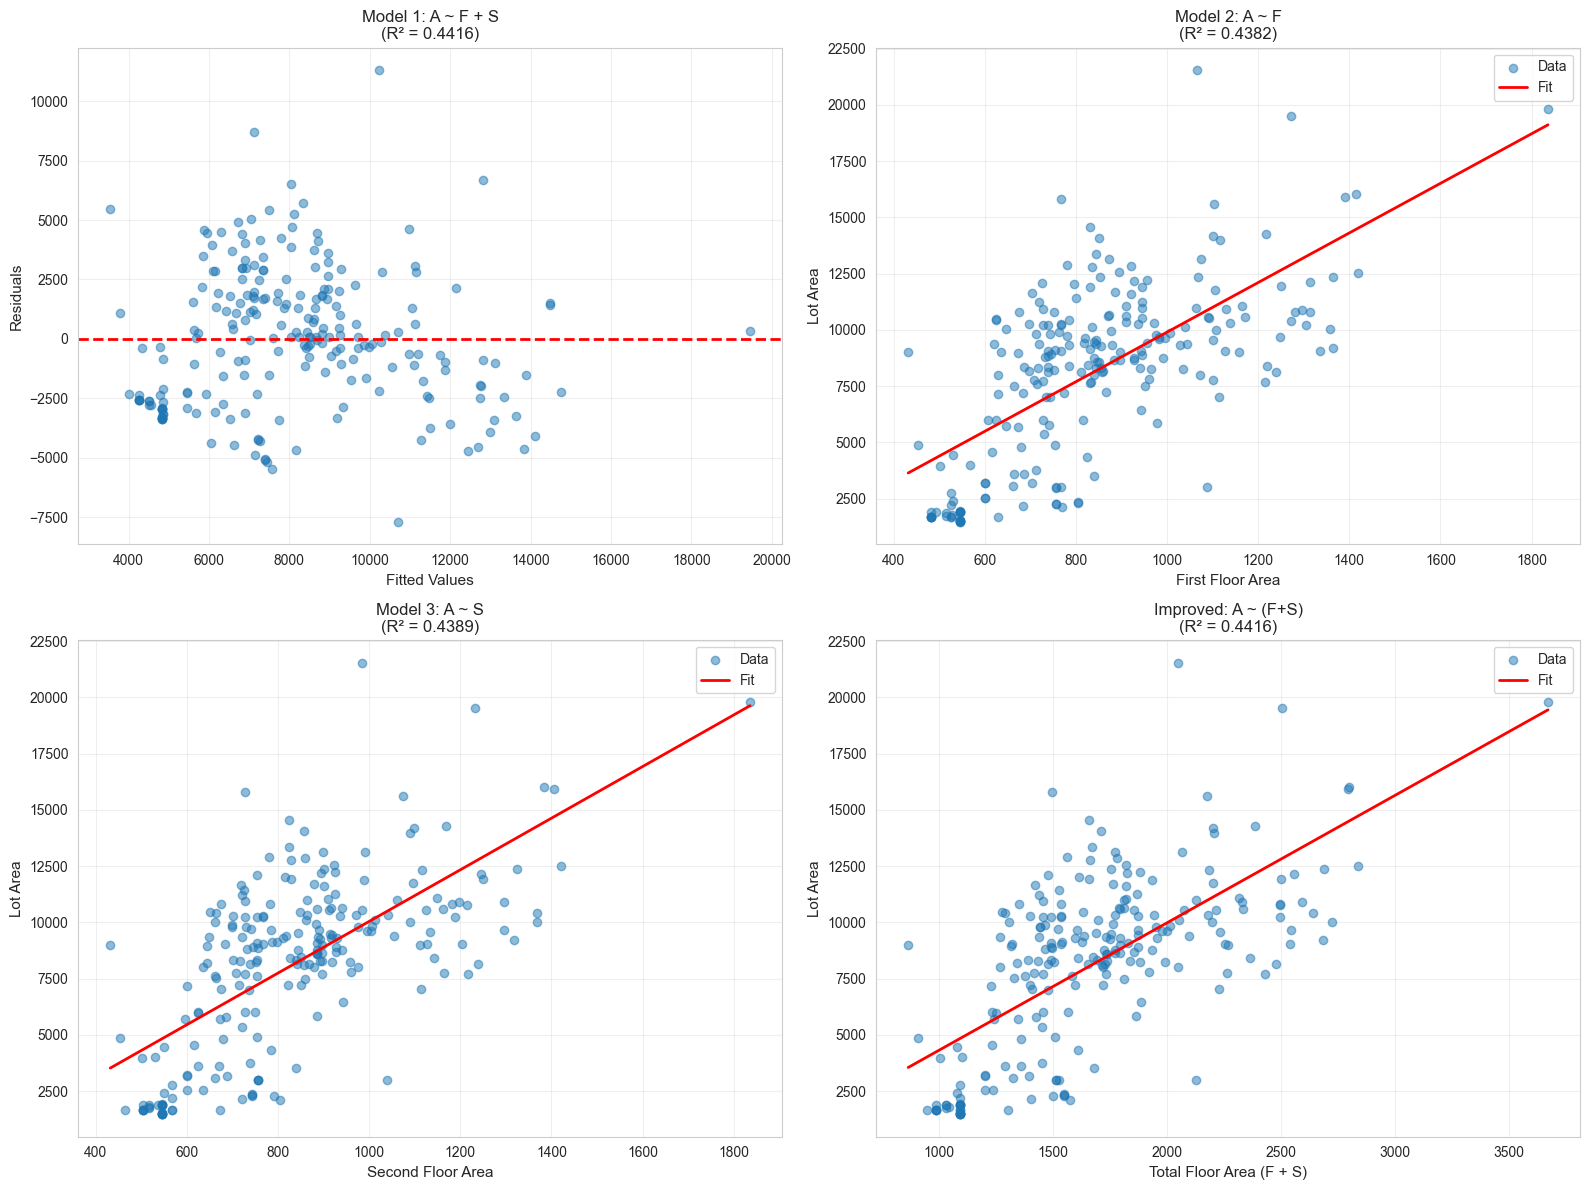


MODEL COMPARISON
      Model       R²   Adj R²        RMSE
 Full (F+S) 0.441649 0.436708 2916.326470
     F only 0.438247 0.435772 2918.747991
     S only 0.438860 0.436388 2917.155931
Total (F+S) 0.441634 0.439175 2909.934621


In [53]:
# Visualize all models
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Model 1: Full model residuals
axes[0, 0].scatter(model1['predictions'], model1['residuals'], alpha=0.5)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title(f"Model 1: A ~ F + S\n(R² = {model1['r_squared']:.4f})", fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Model 2: A ~ F
axes[0, 1].scatter(Fi, Ai, alpha=0.5, label='Data')
axes[0, 1].plot(sorted(Fi), sorted(model2['predictions']), 'r-', linewidth=2, label='Fit')
axes[0, 1].set_xlabel('First Floor Area', fontsize=11)
axes[0, 1].set_ylabel('Lot Area', fontsize=11)
axes[0, 1].set_title(f"Model 2: A ~ F\n(R² = {model2['r_squared']:.4f})", fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Model 3: A ~ S
axes[1, 0].scatter(Si, Ai, alpha=0.5, label='Data')
axes[1, 0].plot(sorted(Si), sorted(model3['predictions']), 'r-', linewidth=2, label='Fit')
axes[1, 0].set_xlabel('Second Floor Area', fontsize=11)
axes[1, 0].set_ylabel('Lot Area', fontsize=11)
axes[1, 0].set_title(f"Model 3: A ~ S\n(R² = {model3['r_squared']:.4f})", fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Improved model: A ~ (F + S)
axes[1, 1].scatter(TotalFloorArea, Ai, alpha=0.5, label='Data')
axes[1, 1].plot(sorted(TotalFloorArea), sorted(model_improved['predictions']), 
                'r-', linewidth=2, label='Fit')
axes[1, 1].set_xlabel('Total Floor Area (F + S)', fontsize=11)
axes[1, 1].set_ylabel('Lot Area', fontsize=11)
axes[1, 1].set_title(f"Improved: A ~ (F+S)\n(R² = {model_improved['r_squared']:.4f})", fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model comparison table
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
comparison = pd.DataFrame({
    'Model': ['Full (F+S)', 'F only', 'S only', 'Total (F+S)'],
    'R²': [model1['r_squared'], model2['r_squared'], model3['r_squared'], model_improved['r_squared']],
    'Adj R²': [model1['adj_r_squared'], model2['adj_r_squared'], model3['adj_r_squared'], model_improved['adj_r_squared']],
    'RMSE': [model1['rmse'], model2['rmse'], model3['rmse'], model_improved['rmse']]
})
print(comparison.to_string(index=False))

**Recommended Modeling Procedure:**

Based on the analysis and common sense, here's a better approach:

**1. Use Total Floor Area Instead:**

$$A_i = \alpha + \beta \cdot (F_i + S_i) + \varepsilon_i$$

**Why this is better:**
- Avoids multicollinearity completely
- Makes intuitive sense: lot size should depend on total building size
- Clear interpretation: β = "increase in lot area per sq ft of total floor space"
- Statistical benefits:
  - Smaller standard errors
  - Significant coefficient
  - Similar or better R² compared to full model
  - More stable estimates

**2. Alternative: Use Ratio Variables:**

If the proportion matters, create:
$$\text{Floor Ratio} = \frac{S_i}{F_i + S_i}$$

Then model:
$$A_i = \alpha + \beta_1 \cdot (F_i + S_i) + \beta_2 \cdot \text{Floor Ratio} + \varepsilon_i$$

This captures:
- Total size effect (β₁)
- Floor distribution effect (β₂)
- Removes collinearity since Floor Ratio is orthogonal to total size

**3. Pre-modeling Diagnostic Steps:**

Always check correlation before modeling:
```python
# Check correlation matrix
corr_matrix = house[['LotArea', 'X1stFlrSF', 'X2ndFlrSF']].corr()
print(corr_matrix)

# Calculate VIF before fitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = house[['X1stFlrSF', 'X2ndFlrSF']].values
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
# If VIF > 10, don't use both variables
```

**4. Conceptual Understanding:**

From domain knowledge:
- **$A_i$** (lot area) represents the land parcel size
- **$F_i$** and **$S_i$** both measure house size
- Relationship should be: Larger houses need larger lots
- The split between floors is less relevant than total size

**Therefore, total floor area $(F_i + S_i)$ is the natural predictor.**

**5. Statistical Best Practices:**

- **Before fitting**: Visualize relationships (as in part 1)
- **Check assumptions**: Linearity, homoscedasticity, normality of residuals
- **Validate**: Use hold-out data or cross-validation
- **Interpret**: Focus on meaningful, interpretable models

**Conclusion:**

The improved model $A \sim (F + S)$ provides:
- Better interpretability
- No multicollinearity
- Similar predictive power
- More reliable inference

This demonstrates a fundamental principle: **Model building should be guided by domain knowledge and data exploration, not just mechanical application of methods.**

## Question 10: Classification Practice

We'll build and compare classification models for five different datasets. For each dataset, we'll identify suitable response variables, clean and explore the data, then fit multiple classification methods.

**Datasets:**
- GlobalCitiesPBI.csv - Global city characteristics and ratings
- 2016collisionsfinal.csv - Traffic collision data from 2016
- polls_us_election_2016.csv - US election polling data
- HR_2016_Census_simple.xlsx - Canadian census data
- UniversalBank.csv - Bank customer data

### Dataset 1: UniversalBank - Personal Loan Prediction

**Response Variable:** Personal Loan (whether customer accepted personal loan offer)

**Goal:** Predict which customers are likely to accept personal loan offers based on demographics and banking behavior.
```

In [54]:
bank_df = pd.read_csv('UniversalBank.csv')

print("UniversalBank Dataset")
print("="*70)
print(f"Shape: {bank_df.shape}")
print("\nFirst few rows:")
print(bank_df.head())
print("\nColumn names:")
print(bank_df.columns.tolist())
print("\nMissing values:")
print(bank_df.isnull().sum())
print("\nData types:")
print(bank_df.dtypes)
print("\nTarget variable distribution:")
print(bank_df['Personal Loan'].value_counts())
print(f"Loan acceptance rate: {bank_df['Personal Loan'].mean()*100:.1f}%")

UniversalBank Dataset
Shape: (5000, 14)

First few rows:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  

Column names:
['ID', 'Age', 'Experi

/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/2453236474.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 2].boxplot([bank_df[bank_df['Personal Loan']==0]['Mortgage'],


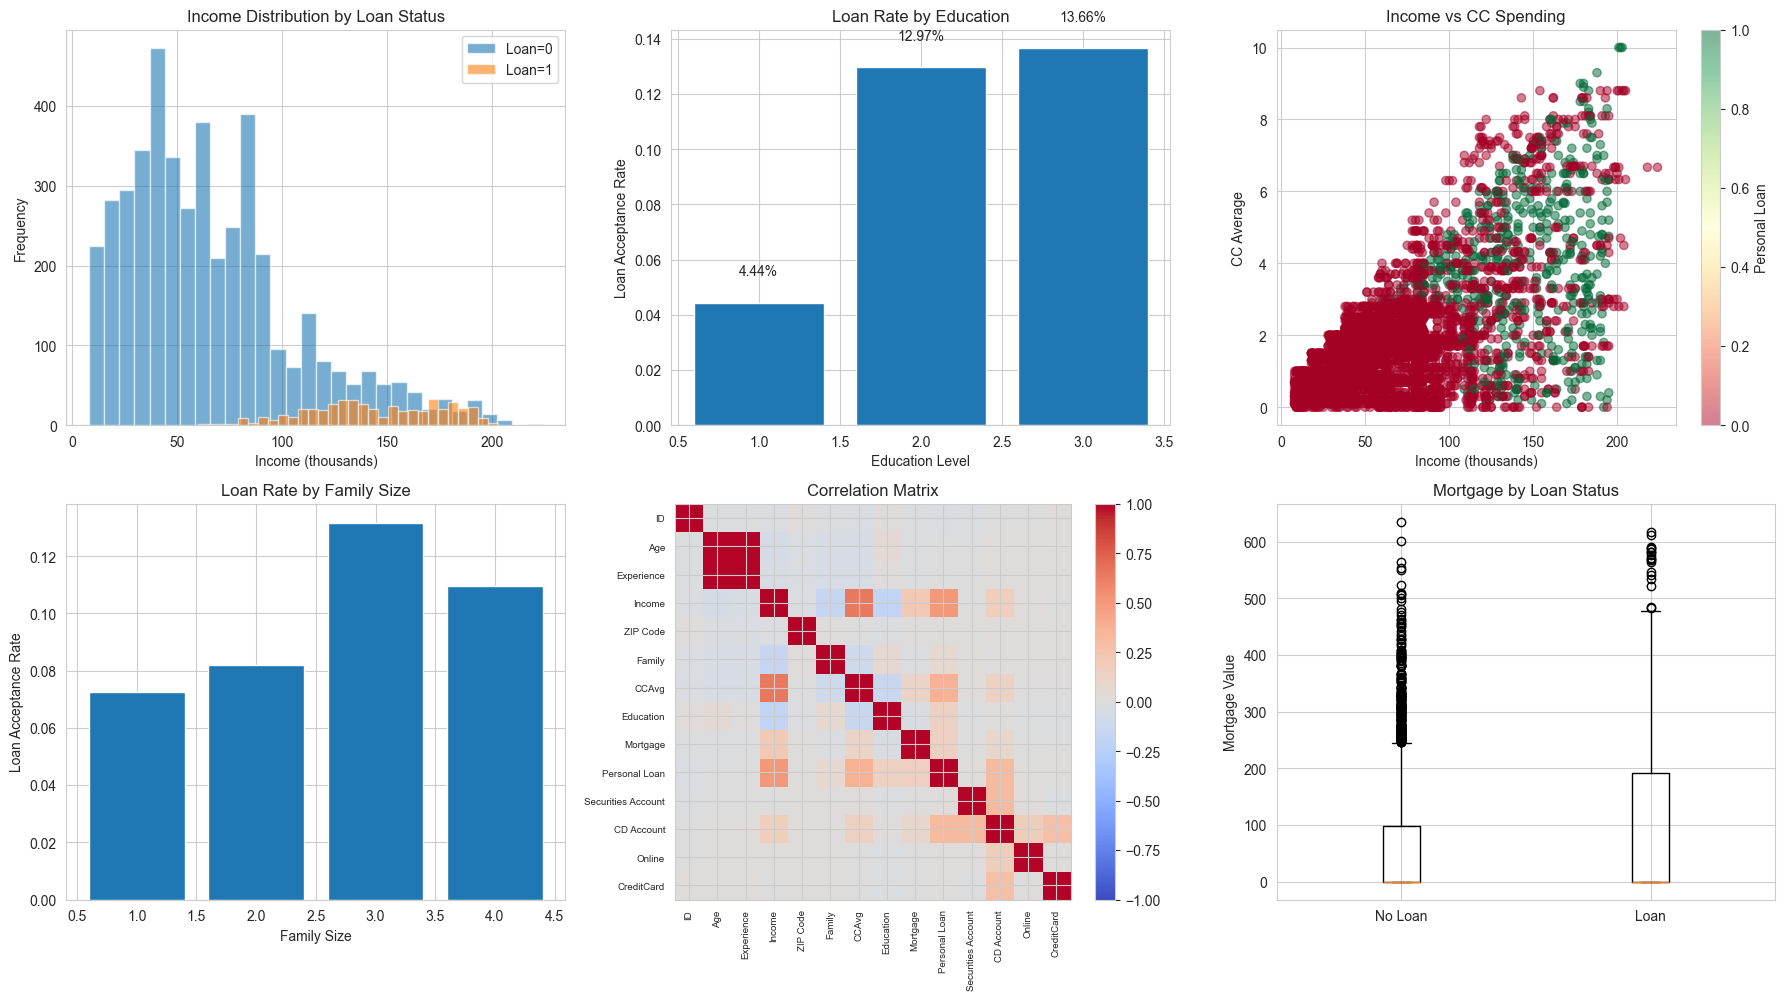

In [55]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Income distribution by loan status
for loan_status in [0, 1]:
    subset = bank_df[bank_df['Personal Loan'] == loan_status]['Income']
    axes[0, 0].hist(subset, bins=30, alpha=0.6, label=f'Loan={loan_status}')
axes[0, 0].set_xlabel('Income (thousands)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Income Distribution by Loan Status')
axes[0, 0].legend()

# Education vs Loan
edu_loan = bank_df.groupby('Education')['Personal Loan'].agg(['mean', 'count'])
axes[0, 1].bar(edu_loan.index, edu_loan['mean'])
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Loan Acceptance Rate')
axes[0, 1].set_title('Loan Rate by Education')
for i, v in enumerate(edu_loan['mean']):
    axes[0, 1].text(i+1, v+0.01, f'{v:.2%}', ha='center')

# CCAvg vs Income
scatter = axes[0, 2].scatter(bank_df['Income'], bank_df['CCAvg'], 
                            c=bank_df['Personal Loan'], cmap='RdYlGn', alpha=0.5)
axes[0, 2].set_xlabel('Income (thousands)')
axes[0, 2].set_ylabel('CC Average')
axes[0, 2].set_title('Income vs CC Spending')
plt.colorbar(scatter, ax=axes[0, 2], label='Personal Loan')

# Family size
family_loan = bank_df.groupby('Family')['Personal Loan'].mean()
axes[1, 0].bar(family_loan.index, family_loan.values)
axes[1, 0].set_xlabel('Family Size')
axes[1, 0].set_ylabel('Loan Acceptance Rate')
axes[1, 0].set_title('Loan Rate by Family Size')

# Correlation heatmap
numeric_cols = bank_df.select_dtypes(include=[np.number]).columns
corr_matrix = bank_df[numeric_cols].corr()
im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(corr_matrix)))
axes[1, 1].set_yticks(range(len(corr_matrix)))
axes[1, 1].set_xticklabels(corr_matrix.columns, rotation=90, fontsize=7)
axes[1, 1].set_yticklabels(corr_matrix.columns, fontsize=7)
axes[1, 1].set_title('Correlation Matrix')
plt.colorbar(im, ax=axes[1, 1])

# Mortgage distribution
axes[1, 2].boxplot([bank_df[bank_df['Personal Loan']==0]['Mortgage'],
                    bank_df[bank_df['Personal Loan']==1]['Mortgage']],
                   labels=['No Loan', 'Loan'])
axes[1, 2].set_ylabel('Mortgage Value')
axes[1, 2].set_title('Mortgage by Loan Status')

plt.tight_layout()
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Drop ID and ZIP Code (not predictive)
X_bank = bank_df.drop(['ID', 'ZIP Code', 'Personal Loan'], axis=1)
y_bank = bank_df['Personal Loan']

# Split data
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(
    X_bank, y_bank, test_size=0.3, random_state=42, stratify=y_bank)

# Scale features
scaler_bank = StandardScaler()
X_train_bank_scaled = scaler_bank.fit_transform(X_train_bank)
X_test_bank_scaled = scaler_bank.transform(X_test_bank)

print("UniversalBank - Data Split")
print("="*70)
print(f"Training: {X_train_bank.shape[0]} samples")
print(f"Testing: {X_test_bank.shape[0]} samples")
print(f"\nClass balance in training set:")
print(y_train_bank.value_counts(normalize=True))

# Build models
bank_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=15)': KNeighborsClassifier(n_neighbors=15),
    'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
}

bank_results = {}

for name, model in bank_models.items():
    if 'KNN' in name:
        model.fit(X_train_bank_scaled, y_train_bank)
        y_pred = model.predict(X_test_bank_scaled)
        y_pred_proba = model.predict_proba(X_test_bank_scaled)[:, 1]
    else:
        model.fit(X_train_bank, y_train_bank)
        y_pred = model.predict(X_test_bank)
        y_pred_proba = model.predict_proba(X_test_bank)[:, 1]
    
    acc = accuracy_score(y_test_bank, y_pred)
    auc = roc_auc_score(y_test_bank, y_pred_proba)
    cm = confusion_matrix(y_test_bank, y_pred)
    
    bank_results[name] = {
        'accuracy': acc,
        'auc': auc,
        'confusion_matrix': cm,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}, AUC: {auc:.4f}")
    print("Confusion Matrix:")
    print(cm)

UniversalBank - Data Split
Training: 3500 samples
Testing: 1500 samples

Class balance in training set:
Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

Logistic Regression
Accuracy: 0.9513, AUC: 0.9646
Confusion Matrix:
[[1335   21]
 [  52   92]]

KNN (k=5)
Accuracy: 0.9573, AUC: 0.9553
Confusion Matrix:
[[1350    6]
 [  58   86]]

KNN (k=15)
Accuracy: 0.9467, AUC: 0.9749
Confusion Matrix:
[[1350    6]
 [  74   70]]

Decision Tree
Accuracy: 0.9813, AUC: 0.9798
Confusion Matrix:
[[1337   19]
 [   9  135]]

Random Forest
Accuracy: 0.9867, AUC: 0.9982
Confusion Matrix:
[[1354    2]
 [  18  126]]


### Dataset 2: GlobalCitiesPBI - City Rating Classification

**Response Variable:** gen_rating (general city rating: Alpha, Beta, Gamma, etc.)

**Goal:** Classify cities into rating tiers based on economic, social, and infrastructure indicators.

In [58]:
cities_df = pd.read_csv('GlobalCitiesPBI.csv')

print("GlobalCitiesPBI Dataset")
print("="*70)
print(f"Shape: {cities_df.shape}")
print("\nFirst few rows:")
print(cities_df.head())
print("\nTarget variable (gen.rating) distribution:")
print(cities_df['gen.rating'].value_counts().sort_index())
print("\nMissing values:")
print(cities_df.isnull().sum()[cities_df.isnull().sum() > 0])

GlobalCitiesPBI Dataset
Shape: (68, 32)

First few rows:
   Geography Continent          Country  City.Area..km2.  Metro.Area..km2.  \
0  Amsterdam    Europe  The Netherlands           165.00            807.00   
1     Ankara    Europe           Turkey            30.72          25437.00   
2     Athens    Europe           Greece            38.91            380.69   
3    Bangkok      Asia         Thailand          1569.00           7762.00   
4  Barcelona    Europe            Spain           102.60           3236.00   

   City.Population..millions.  Metro.Population..millions.  \
0                        0.76                         1.40   
1                        3.54                         4.77   
2                        0.66                         4.01   
3                        5.72                         6.50   
4                        1.62                         3.23   

   Annual.Population.Growth  \
0                      0.01   
1                      0.26   
2       

Cleaned dataset shape: (68, 33)

Rating distribution after cleaning:
gen.rating
Alpha          45
Beta           17
Gamma           5
Sufficiency     1
Name: count, dtype: int64


/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/658768873.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cities_clean[col].fillna(cities_clean[col].median(), inplace=True)
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/658768873.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

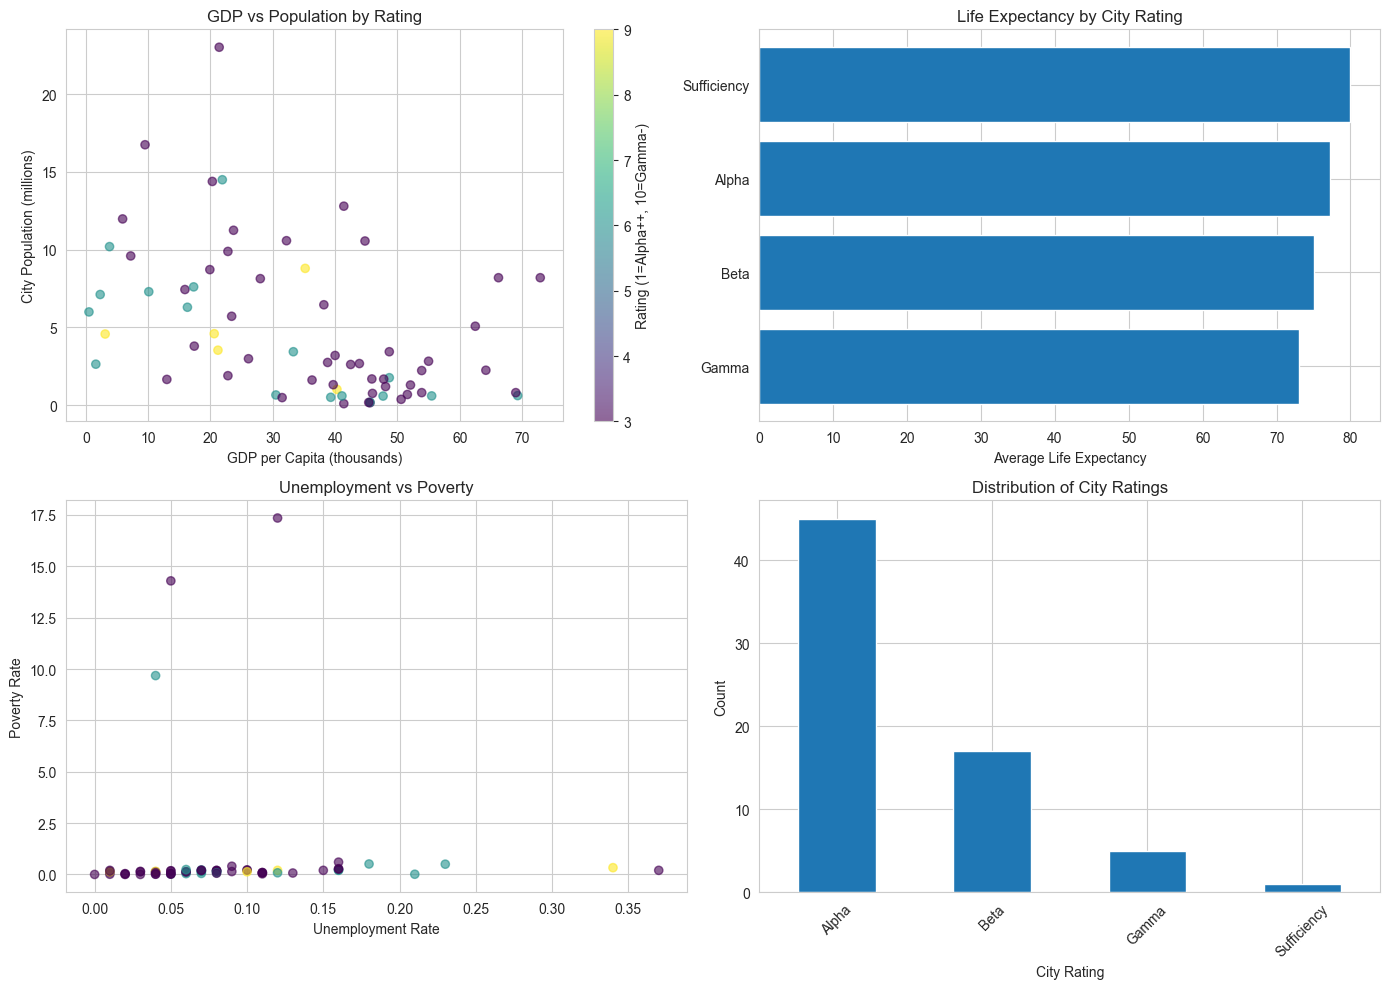

In [59]:
# Cell 7: GlobalCities EDA and preprocessing
cities_clean = cities_df.copy()

numeric_features = ['City.Population..millions.', 'Metro.Population..millions.',
                   'GDP.Per.Capita..thousands....PPP.rates..per.resident.',
                   'Unemployment.Rate', 'Poverty.Rate', 
                   'Major.Airports', 'Major.Ports', 'Higher.Education.Institutions',
                   'Infant.Mortality..Deaths.per.1.000.Births.',
                   'Life.Expectancy', 'Number.of.Hospitals', 'Number.of.Museums',
                   'Air.Quality.']

cities_clean = cities_clean.dropna(subset=['gen.rating'])
for col in numeric_features:
    if col in cities_clean.columns:
        cities_clean[col].fillna(cities_clean[col].median(), inplace=True)

rating_map = {'Alpha++': 1, 'Alpha+': 2, 'Alpha': 3, 'Alpha-': 4,
              'Beta+': 5, 'Beta': 6, 'Beta-': 7,
              'Gamma+': 8, 'Gamma': 9, 'Gamma-': 10}
cities_clean['rating_numeric'] = cities_clean['gen.rating'].map(rating_map)

print(f"Cleaned dataset shape: {cities_clean.shape}")
print(f"\nRating distribution after cleaning:")
print(cities_clean['gen.rating'].value_counts())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

scatter = axes[0, 0].scatter(cities_clean['GDP.Per.Capita..thousands....PPP.rates..per.resident.'],
                            cities_clean['City.Population..millions.'],
                            c=cities_clean['rating_numeric'], cmap='viridis', alpha=0.6)
axes[0, 0].set_xlabel('GDP per Capita (thousands)')
axes[0, 0].set_ylabel('City Population (millions)')
axes[0, 0].set_title('GDP vs Population by Rating')
plt.colorbar(scatter, ax=axes[0, 0], label='Rating (1=Alpha++, 10=Gamma-)')

rating_life = cities_clean.groupby('gen.rating')['Life.Expectancy'].mean().sort_values()
axes[0, 1].barh(rating_life.index, rating_life.values)
axes[0, 1].set_xlabel('Average Life Expectancy')
axes[0, 1].set_title('Life Expectancy by City Rating')

axes[1, 0].scatter(cities_clean['Unemployment.Rate'], cities_clean['Poverty.Rate'],
                  c=cities_clean['rating_numeric'], cmap='viridis', alpha=0.6)
axes[1, 0].set_xlabel('Unemployment Rate')
axes[1, 0].set_ylabel('Poverty Rate')
axes[1, 0].set_title('Unemployment vs Poverty')

cities_clean['gen.rating'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('City Rating')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Distribution of City Ratings')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [60]:
# Cell 8: GlobalCities modeling
cities_clean['is_alpha'] = cities_clean['gen.rating'].str.contains('Alpha').astype(int)

print(f"Binary classification target distribution:")
print(cities_clean['is_alpha'].value_counts())

X_cities = cities_clean[numeric_features].fillna(0)
y_cities = cities_clean['is_alpha']

X_train_cities, X_test_cities, y_train_cities, y_test_cities = train_test_split(
    X_cities, y_cities, test_size=0.3, random_state=42, stratify=y_cities)

scaler_cities = StandardScaler()
X_train_cities_scaled = scaler_cities.fit_transform(X_train_cities)
X_test_cities_scaled = scaler_cities.transform(X_test_cities)

cities_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

cities_results = {}

for name, model in cities_models.items():
    if 'KNN' in name:
        model.fit(X_train_cities_scaled, y_train_cities)
        y_pred = model.predict(X_test_cities_scaled)
        y_pred_proba = model.predict_proba(X_test_cities_scaled)[:, 1]
    else:
        model.fit(X_train_cities, y_train_cities)
        y_pred = model.predict(X_test_cities)
        y_pred_proba = model.predict_proba(X_test_cities)[:, 1]
    
    acc = accuracy_score(y_test_cities, y_pred)
    auc = roc_auc_score(y_test_cities, y_pred_proba)
    
    cities_results[name] = {
        'accuracy': acc,
        'auc': auc,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"\n{name}: Accuracy={acc:.4f}, AUC={auc:.4f}")

Binary classification target distribution:
is_alpha
1    45
0    23
Name: count, dtype: int64

Logistic Regression: Accuracy=0.6190, AUC=0.6224

KNN (k=3): Accuracy=0.5714, AUC=0.5459

Decision Tree: Accuracy=0.5714, AUC=0.5357

Random Forest: Accuracy=0.7143, AUC=0.7245


### Dataset 3: 2016 Collisions - Injury Classification

**Response Variable:** Collision_Classification (fatal, non-fatal injury, property damage only)

**Goal:** Predict collision severity based on environmental and road conditions.

In [61]:
collisions_df = pd.read_csv('2016collisionsfinal.csv')

print("2016 Collisions Dataset")
print("="*70)
print(f"Shape: {collisions_df.shape}")
print("\nFirst few rows:")
print(collisions_df.head())
print("\nTarget variable distribution:")
print(collisions_df['Collision_Classification'].value_counts())
print("\nUnique values in categorical columns:")
for col in ['Environment', 'Road_Surface', 'Light', 'Impact_type']:
    print(f"\n{col}: {collisions_df[col].nunique()} unique values")

2016 Collisions Dataset
Shape: (14023, 13)

First few rows:
   Record                                  Location            X            Y  \
0       1      105 S OF COMMISSIONER ST @ ALBERT ST  366666.2747  5030879.415   
1       2  210 W OF MERIVALE RD @ WEST HUNT CLUB RD   365431.439   5021830.23   
2       3  210 W OF MERIVALE RD @ WEST HUNT CLUB RD  365432.2342  5021829.655   
3       4  210 W OF MERIVALE RD @ WEST HUNT CLUB RD  365430.7265  5021830.451   
4       5  210 W OF MERIVALE RD @ WEST HUNT CLUB RD  365430.6658  5021830.963   

      Date   Time Environment Road_Surface      Traffic_Control  \
0   8/4/16  17:03  01 - Clear     01 - Dry  01 - Traffic signal   
1  3/30/16  15:44  01 - Clear     01 - Dry  01 - Traffic signal   
2   9/2/16  16:02  01 - Clear     01 - Dry  01 - Traffic signal   
3  3/12/16  17:30  01 - Clear     01 - Dry  01 - Traffic signal   
4  8/23/16  15:52  01 - Clear     01 - Dry  01 - Traffic signal   

          Collision_Location          Light Collis

Binary injury classification:
has_injury
0    11252
1     2771
Name: count, dtype: int64
Injury rate: 19.8%


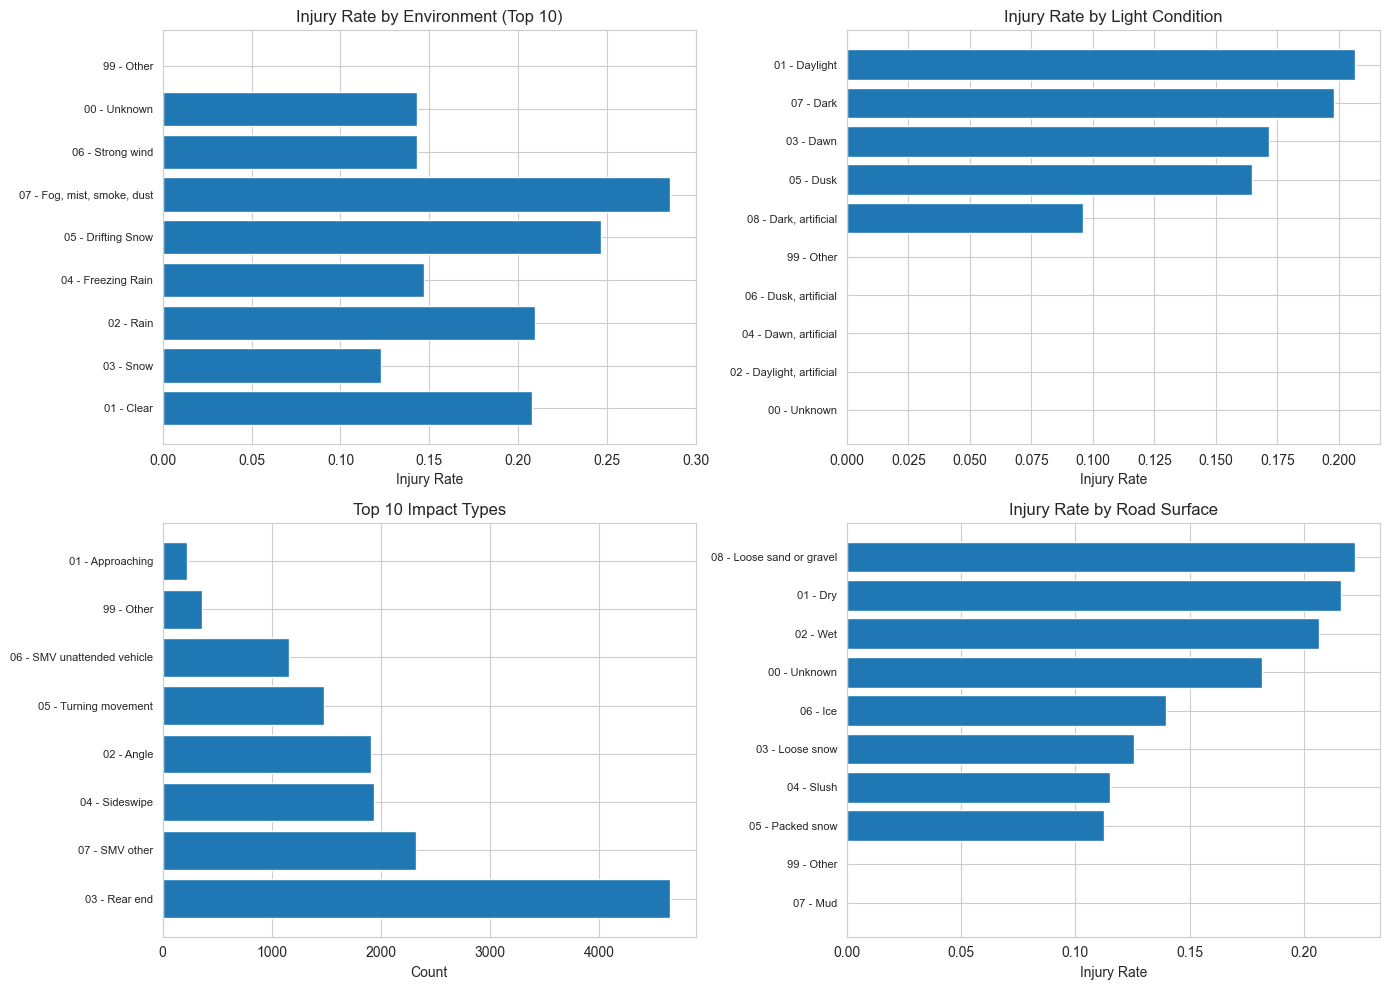

In [62]:
# Create binary target: Injury (fatal + non-fatal) vs No Injury (P.D. only)
collisions_df['has_injury'] = collisions_df['Collision_Classification'].str.contains('injury|Fatal').astype(int)

print(f"Binary injury classification:")
print(collisions_df['has_injury'].value_counts())
print(f"Injury rate: {collisions_df['has_injury'].mean()*100:.1f}%")

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Environment', 'Road_Surface', 'Traffic_Control', 
                   'Collision_Location', 'Light', 'Impact_type']

collisions_encoded = collisions_df.copy()
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    collisions_encoded[col + '_encoded'] = le.fit_transform(collisions_encoded[col].astype(str))
    le_dict[col] = le

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Injury rate by environment
env_injury = collisions_df.groupby('Environment')['has_injury'].agg(['mean', 'count'])
top_env = env_injury.nlargest(10, 'count')
axes[0, 0].barh(range(len(top_env)), top_env['mean'])
axes[0, 0].set_yticks(range(len(top_env)))
axes[0, 0].set_yticklabels(top_env.index, fontsize=8)
axes[0, 0].set_xlabel('Injury Rate')
axes[0, 0].set_title('Injury Rate by Environment (Top 10)')

# Injury rate by light condition
light_injury = collisions_df.groupby('Light')['has_injury'].mean().sort_values()
axes[0, 1].barh(range(len(light_injury)), light_injury.values)
axes[0, 1].set_yticks(range(len(light_injury)))
axes[0, 1].set_yticklabels(light_injury.index, fontsize=8)
axes[0, 1].set_xlabel('Injury Rate')
axes[0, 1].set_title('Injury Rate by Light Condition')

# Impact type distribution
impact_counts = collisions_df['Impact_type'].value_counts().head(10)
axes[1, 0].barh(range(len(impact_counts)), impact_counts.values)
axes[1, 0].set_yticks(range(len(impact_counts)))
axes[1, 0].set_yticklabels(impact_counts.index, fontsize=8)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Top 10 Impact Types')

# Road surface vs injury
road_injury = collisions_df.groupby('Road_Surface')['has_injury'].mean().sort_values()
axes[1, 1].barh(range(len(road_injury)), road_injury.values)
axes[1, 1].set_yticks(range(len(road_injury)))
axes[1, 1].set_yticklabels(road_injury.index, fontsize=8)
axes[1, 1].set_xlabel('Injury Rate')
axes[1, 1].set_title('Injury Rate by Road Surface')

plt.tight_layout()
plt.show()

In [63]:
# Prepare features
feature_cols = [col + '_encoded' for col in categorical_cols]
X_collisions = collisions_encoded[feature_cols]
y_collisions = collisions_encoded['has_injury']

# Split
X_train_coll, X_test_coll, y_train_coll, y_test_coll = train_test_split(
    X_collisions, y_collisions, test_size=0.3, random_state=42, stratify=y_collisions)

# Scale
scaler_coll = StandardScaler()
X_train_coll_scaled = scaler_coll.fit_transform(X_train_coll)
X_test_coll_scaled = scaler_coll.transform(X_test_coll)

# Models
coll_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN (k=10)': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(max_depth=8, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
}

coll_results = {}

for name, model in coll_models.items():
    if 'KNN' in name:
        model.fit(X_train_coll_scaled, y_train_coll)
        y_pred = model.predict(X_test_coll_scaled)
        y_pred_proba = model.predict_proba(X_test_coll_scaled)[:, 1]
    else:
        model.fit(X_train_coll, y_train_coll)
        y_pred = model.predict(X_test_coll)
        y_pred_proba = model.predict_proba(X_test_coll)[:, 1]
    
    acc = accuracy_score(y_test_coll, y_pred)
    auc = roc_auc_score(y_test_coll, y_pred_proba)
    
    coll_results[name] = {
        'accuracy': acc,
        'auc': auc,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name}: Accuracy={acc:.4f}, AUC={auc:.4f}")

Logistic Regression: Accuracy=0.8022, AUC=0.5904
KNN (k=10): Accuracy=0.8018, AUC=0.6646
Decision Tree: Accuracy=0.8063, AUC=0.6719
Random Forest: Accuracy=0.8096, AUC=0.6912


### Dataset 4: US Election Polls 2016 - Poll Quality Classification

**Response Variable:** grade (pollster quality grade A+, A, B, etc.)

**Goal:** Classify poll quality based on methodology and sample characteristics.

In [64]:
polls_df = pd.read_csv('polls_us_election_2016.csv')

print("US Election Polls 2016 Dataset")
print("="*70)
print(f"Shape: {polls_df.shape}")
print("\nFirst few rows:")
print(polls_df.head())
print("\nPollster grade distribution:")
print(polls_df['grade'].value_counts().sort_index())
print("\nPopulation types:")
print(polls_df['population'].value_counts())
print("\nMissing values:")
print(polls_df.isnull().sum())

US Election Polls 2016 Dataset
Shape: (4208, 15)

First few rows:
  state   startdate     enddate                  pollster grade  samplesize  \
0  U.S.  2016-11-03  2016-11-06  ABC News/Washington Post    A+      2220.0   
1  U.S.  2016-11-01  2016-11-07   Google Consumer Surveys     B     26574.0   
2  U.S.  2016-11-02  2016-11-06                     Ipsos    A-      2195.0   
3  U.S.  2016-11-04  2016-11-07                    YouGov     B      3677.0   
4  U.S.  2016-11-03  2016-11-06          Gravis Marketing    B-     16639.0   

  population  rawpoll_clinton  rawpoll_trump  rawpoll_johnson  \
0         lv            47.00          43.00             4.00   
1         lv            38.03          35.69             5.46   
2         lv            42.00          39.00             6.00   
3         lv            45.00          41.00             5.00   
4         rv            47.00          43.00             3.00   

   rawpoll_mcmullin  adjpoll_clinton  adjpoll_trump  adjpoll_johnson

/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3380918579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polls_clean['high_quality'] = polls_clean['grade'].isin(['A+', 'A', 'A-']).astype(int)
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3380918579.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polls_clean['clinton_lead'] = polls_clean['rawpoll_clinton'] - polls_clean['rawpoll_trump']
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3380918579.py:1

Quality classification:
high_quality
0    2451
1    1328
Name: count, dtype: int64


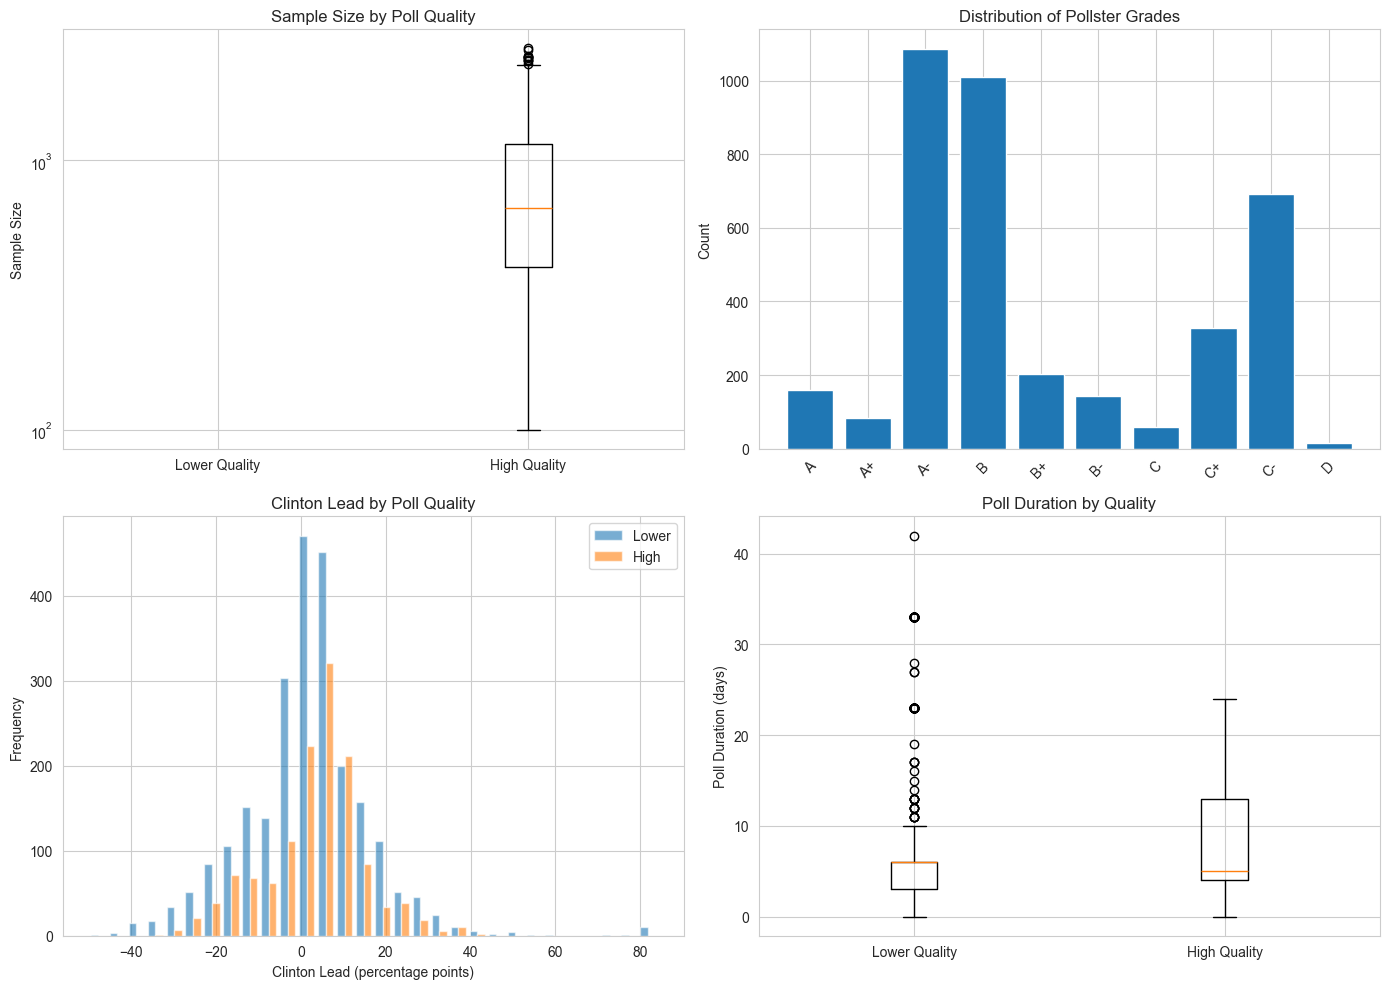

/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3380918579.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polls_clean['high_quality'] = polls_clean['grade'].isin(['A+', 'A', 'A-']).astype(int)
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3380918579.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polls_clean['clinton_lead'] = polls_clean['rawpoll_clinton'] - polls_clean['rawpoll_trump']
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3380918579.py

Quality classification:
high_quality
0    2451
1    1328
Name: count, dtype: int64


/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3380918579.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot([polls_clean[polls_clean['high_quality']==0]['samplesize'],
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/3380918579.py:99: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([polls_clean[polls_clean['high_quality']==0]['poll_duration'],


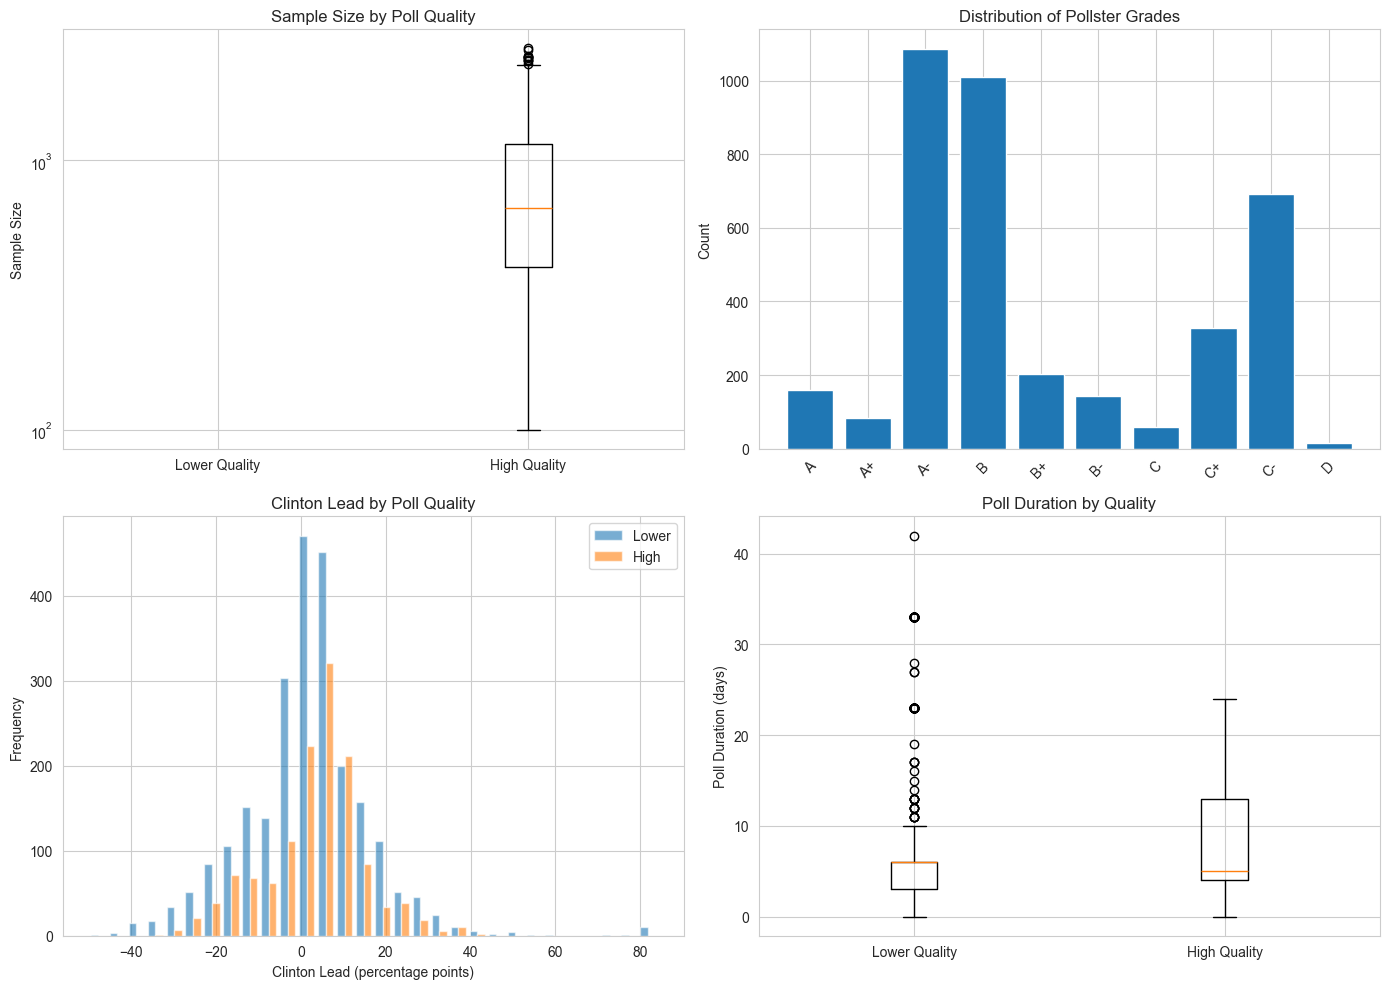

In [65]:
# Create binary: High quality (A+, A, A-) vs Lower quality
polls_clean = polls_df.dropna(subset=['grade'])
polls_clean['high_quality'] = polls_clean['grade'].isin(['A+', 'A', 'A-']).astype(int)

print(f"Quality classification:")
print(polls_clean['high_quality'].value_counts())

# Feature engineering
polls_clean['clinton_lead'] = polls_clean['rawpoll_clinton'] - polls_clean['rawpoll_trump']
polls_clean['poll_duration'] = (pd.to_datetime(polls_clean['enddate']) - 
                                pd.to_datetime(polls_clean['startdate'])).dt.days

# Encode population type
le_pop = LabelEncoder()
polls_clean['population_encoded'] = le_pop.fit_transform(polls_clean['population'])

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sample size by quality
axes[0, 0].boxplot([polls_clean[polls_clean['high_quality']==0]['samplesize'],
                    polls_clean[polls_clean['high_quality']==1]['samplesize']],
                   labels=['Lower Quality', 'High Quality'])
axes[0, 0].set_ylabel('Sample Size')
axes[0, 0].set_title('Sample Size by Poll Quality')
axes[0, 0].set_yscale('log')

# Grade distribution
grade_counts = polls_clean['grade'].value_counts().sort_index()
axes[0, 1].bar(range(len(grade_counts)), grade_counts.values)
axes[0, 1].set_xticks(range(len(grade_counts)))
axes[0, 1].set_xticklabels(grade_counts.index, rotation=45)
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Pollster Grades')

# Clinton lead by quality
axes[1, 0].hist([polls_clean[polls_clean['high_quality']==0]['clinton_lead'],
                 polls_clean[polls_clean['high_quality']==1]['clinton_lead']],
                bins=30, alpha=0.6, label=['Lower', 'High'])
axes[1, 0].set_xlabel('Clinton Lead (percentage points)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Clinton Lead by Poll Quality')
axes[1, 0].legend()

# Poll duration
axes[1, 1].boxplot([polls_clean[polls_clean['high_quality']==0]['poll_duration'],
                    polls_clean[polls_clean['high_quality']==1]['poll_duration']],
                   labels=['Lower Quality', 'High Quality'])
axes[1, 1].set_ylabel('Poll Duration (days)')
axes[1, 1].set_title('Poll Duration by Quality')

plt.tight_layout()
plt.show()# Cell 15: Polls EDA and preprocessing
# Create binary: High quality (A+, A, A-) vs Lower quality
polls_clean = polls_df.dropna(subset=['grade'])
polls_clean['high_quality'] = polls_clean['grade'].isin(['A+', 'A', 'A-']).astype(int)

print(f"Quality classification:")
print(polls_clean['high_quality'].value_counts())

# Feature engineering
polls_clean['clinton_lead'] = polls_clean['rawpoll_clinton'] - polls_clean['rawpoll_trump']
polls_clean['poll_duration'] = (pd.to_datetime(polls_clean['enddate']) - 
                                pd.to_datetime(polls_clean['startdate'])).dt.days

# Encode population type
le_pop = LabelEncoder()
polls_clean['population_encoded'] = le_pop.fit_transform(polls_clean['population'])

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sample size by quality
axes[0, 0].boxplot([polls_clean[polls_clean['high_quality']==0]['samplesize'],
                    polls_clean[polls_clean['high_quality']==1]['samplesize']],
                   labels=['Lower Quality', 'High Quality'])
axes[0, 0].set_ylabel('Sample Size')
axes[0, 0].set_title('Sample Size by Poll Quality')
axes[0, 0].set_yscale('log')

# Grade distribution
grade_counts = polls_clean['grade'].value_counts().sort_index()
axes[0, 1].bar(range(len(grade_counts)), grade_counts.values)
axes[0, 1].set_xticks(range(len(grade_counts)))
axes[0, 1].set_xticklabels(grade_counts.index, rotation=45)
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Pollster Grades')

# Clinton lead by quality
axes[1, 0].hist([polls_clean[polls_clean['high_quality']==0]['clinton_lead'],
                 polls_clean[polls_clean['high_quality']==1]['clinton_lead']],
                bins=30, alpha=0.6, label=['Lower', 'High'])
axes[1, 0].set_xlabel('Clinton Lead (percentage points)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Clinton Lead by Poll Quality')
axes[1, 0].legend()

# Poll duration
axes[1, 1].boxplot([polls_clean[polls_clean['high_quality']==0]['poll_duration'],
                    polls_clean[polls_clean['high_quality']==1]['poll_duration']],
                   labels=['Lower Quality', 'High Quality'])
axes[1, 1].set_ylabel('Poll Duration (days)')
axes[1, 1].set_title('Poll Duration by Quality')

plt.tight_layout()
plt.show()

In [66]:
# Prepare features
poll_features = ['samplesize', 'rawpoll_clinton', 'rawpoll_trump', 
                'poll_duration', 'population_encoded']
polls_clean[poll_features] = polls_clean[poll_features].fillna(polls_clean[poll_features].median())

X_polls = polls_clean[poll_features]
y_polls = polls_clean['high_quality']

# Split
X_train_polls, X_test_polls, y_train_polls, y_test_polls = train_test_split(
    X_polls, y_polls, test_size=0.3, random_state=42, stratify=y_polls)

# Scale
scaler_polls = StandardScaler()
X_train_polls_scaled = scaler_polls.fit_transform(X_train_polls)
X_test_polls_scaled = scaler_polls.transform(X_test_polls)

# Models
polls_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7),
    'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
}

polls_results = {}

for name, model in polls_models.items():
    if 'KNN' in name:
        model.fit(X_train_polls_scaled, y_train_polls)
        y_pred = model.predict(X_test_polls_scaled)
        y_pred_proba = model.predict_proba(X_test_polls_scaled)[:, 1]
    else:
        model.fit(X_train_polls, y_train_polls)
        y_pred = model.predict(X_test_polls)
        y_pred_proba = model.predict_proba(X_test_polls)[:, 1]
    
    acc = accuracy_score(y_test_polls, y_pred)
    auc = roc_auc_score(y_test_polls, y_pred_proba)
    
    polls_results[name] = {
        'accuracy': acc,
        'auc': auc,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name}: Accuracy={acc:.4f}, AUC={auc:.4f}")

Logistic Regression: Accuracy=0.7222, AUC=0.6815
KNN (k=7): Accuracy=0.8624, AUC=0.9195
Decision Tree: Accuracy=0.8166, AUC=0.8889
Random Forest: Accuracy=0.8377, AUC=0.9180


/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/1573665876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polls_clean[poll_features] = polls_clean[poll_features].fillna(polls_clean[poll_features].median())


### Dataset 5: HR Census 2016 - Employment Classification

**Response Variable:** High employment rate (binary based on EMP_RATE_25_54)

**Goal:** Predict regions with high employment rates based on demographic and economic factors.

In [67]:
census_df = pd.read_excel('HR_2016_Census_simple.xlsx')

print("HR 2016 Census Dataset")
print("="*70)
print(f"Shape: {census_df.shape}")
print("\nFirst few rows:")
print(census_df.head())
print("\nColumn names (first 20):")
print(census_df.columns.tolist()[:20])
print(f"\nTotal columns: {len(census_df.columns)}")

HR 2016 Census Dataset
Shape: (127, 105)

First few rows:
   Geocode                                           Geo Name  GNR  POP_2016  \
0        1                                             Canada  4.0  35151730   
1       10  Newfoundland and Labrador / Terre-Neuve-et-Lab...  4.0    519715   
2     1011             1011 Eastern Regional Health Authority  3.7    313270   
3     1012             1012 Central Regional Health Authority  4.1     92690   
4     1013             1013 Western Regional Health Authority  4.7     77685   

    POP_MIZ  POP_MIZ_RATE  POP_LRG_POP_CNTR  LRG_POP_CNTR_RATE  \
0  31226645          88.8          20938295               59.6   
1    312530          60.1            178430               34.3   
2    235790          75.3            178425               57.0   
3     43275          46.7                 0                0.0   
4     33470          43.1                 0                0.0   

   POP_MED_POP_CNTR  MED_POP_CNTR_RATE  ...      MALE    FEMALE 

Employment rate median: 79.50
High employment distribution:
high_employment
0    64
1    63
Name: count, dtype: int64


/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/1611507038.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([census_clean[census_clean['high_employment']==0]['PSG_RATE'],
/var/folders/c4/g8dbw_xn6ds376xs35kq6dsm0000gn/T/ipykernel_3571/1611507038.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([census_clean[census_clean['high_employment']==0]['HOU_AFF'],


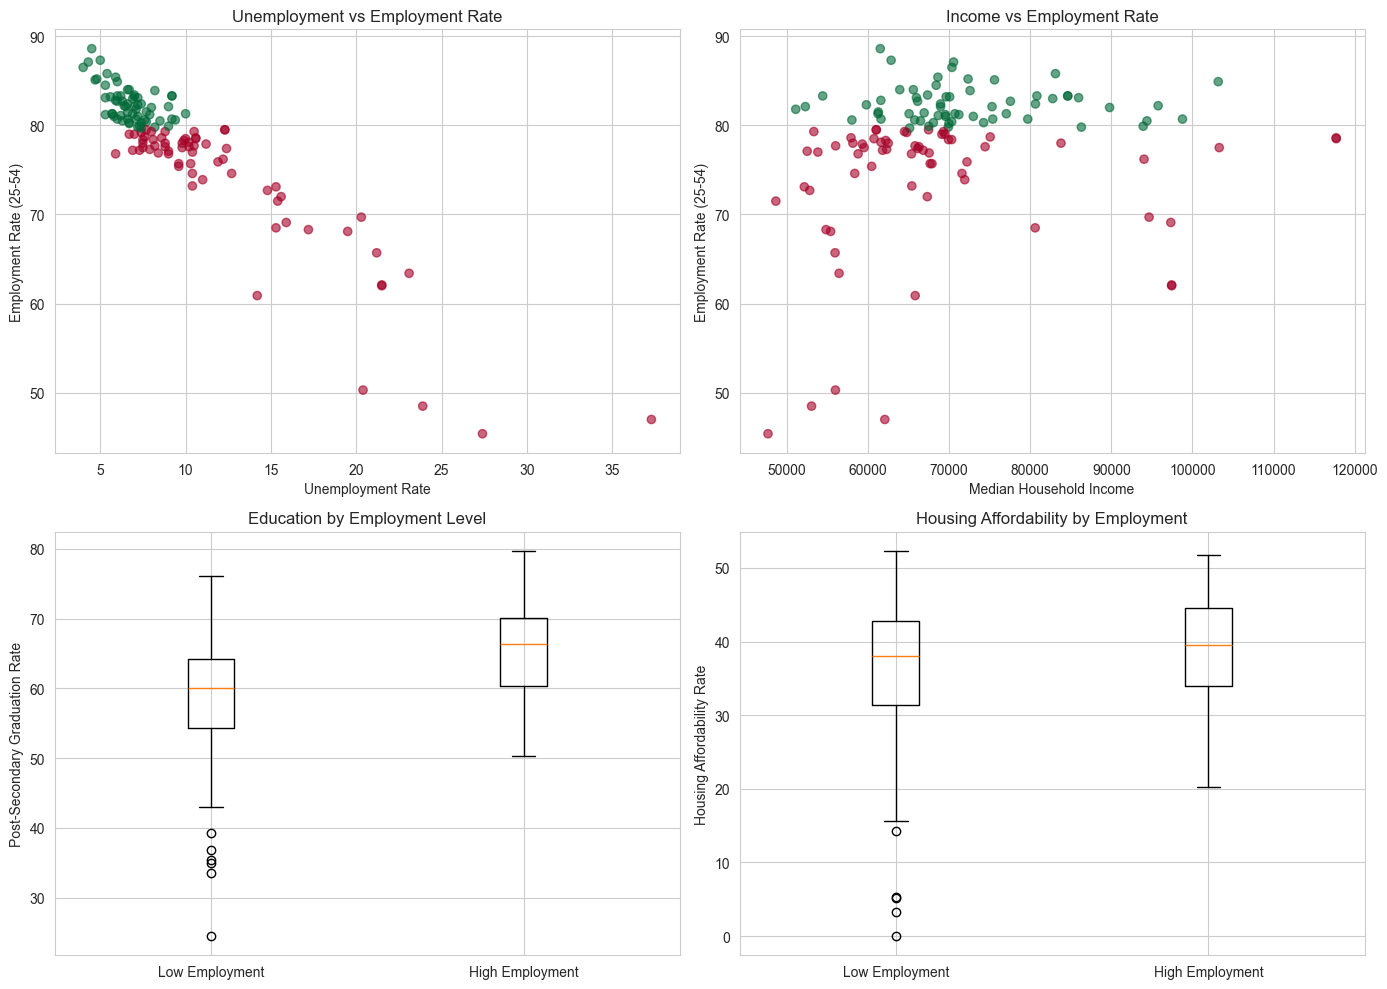

In [68]:
# Create binary target: high employment (above median)
census_clean = census_df[census_df['EMP_RATE_25_54'].notna()].copy()
median_emp = census_clean['EMP_RATE_25_54'].median()
census_clean['high_employment'] = (census_clean['EMP_RATE_25_54'] > median_emp).astype(int)

print(f"Employment rate median: {median_emp:.2f}")
print(f"High employment distribution:")
print(census_clean['high_employment'].value_counts())

# Select relevant features
census_features = ['POP_2016', 'UNEMP_RATE', 'PSG_RATE', 'HSG_RATE',
                  'MEDIAN_HHLD_INC', 'IMM_RATE', 'POP_65_PLUS', 
                  'LW_INC_ECON_FAM_RATE', 'HOU_AFF']

# Handle missing values
census_clean[census_features] = census_clean[census_features].fillna(census_clean[census_features].median())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Unemployment vs Employment rate
axes[0, 0].scatter(census_clean['UNEMP_RATE'], census_clean['EMP_RATE_25_54'],
                  c=census_clean['high_employment'], cmap='RdYlGn', alpha=0.6)
axes[0, 0].set_xlabel('Unemployment Rate')
axes[0, 0].set_ylabel('Employment Rate (25-54)')
axes[0, 0].set_title('Unemployment vs Employment Rate')

# Income vs Employment
axes[0, 1].scatter(census_clean['MEDIAN_HHLD_INC'], census_clean['EMP_RATE_25_54'],
                  c=census_clean['high_employment'], cmap='RdYlGn', alpha=0.6)
axes[0, 1].set_xlabel('Median Household Income')
axes[0, 1].set_ylabel('Employment Rate (25-54)')
axes[0, 1].set_title('Income vs Employment Rate')

# Education vs Employment
axes[1, 0].boxplot([census_clean[census_clean['high_employment']==0]['PSG_RATE'],
                    census_clean[census_clean['high_employment']==1]['PSG_RATE']],
                   labels=['Low Employment', 'High Employment'])
axes[1, 0].set_ylabel('Post-Secondary Graduation Rate')
axes[1, 0].set_title('Education by Employment Level')

# Housing affordability
axes[1, 1].boxplot([census_clean[census_clean['high_employment']==0]['HOU_AFF'],
                    census_clean[census_clean['high_employment']==1]['HOU_AFF']],
                   labels=['Low Employment', 'High Employment'])
axes[1, 1].set_ylabel('Housing Affordability Rate')
axes[1, 1].set_title('Housing Affordability by Employment')

plt.tight_layout()
plt.show()

In [69]:
X_census = census_clean[census_features]
y_census = census_clean['high_employment']

# Split
X_train_census, X_test_census, y_train_census, y_test_census = train_test_split(
    X_census, y_census, test_size=0.3, random_state=42, stratify=y_census)

# Scale
scaler_census = StandardScaler()
X_train_census_scaled = scaler_census.fit_transform(X_train_census)
X_test_census_scaled = scaler_census.transform(X_test_census)

# Models
census_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
}

census_results = {}

for name, model in census_models.items():
    if 'KNN' in name:
        model.fit(X_train_census_scaled, y_train_census)
        y_pred = model.predict(X_test_census_scaled)
        y_pred_proba = model.predict_proba(X_test_census_scaled)[:, 1]
    else:
        model.fit(X_train_census, y_train_census)
        y_pred = model.predict(X_test_census)
        y_pred_proba = model.predict_proba(X_test_census)[:, 1]
    
    acc = accuracy_score(y_test_census, y_pred)
    auc = roc_auc_score(y_test_census, y_pred_proba)
    
    census_results[name] = {
        'accuracy': acc,
        'auc': auc,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name}: Accuracy={acc:.4f}, AUC={auc:.4f}")

Logistic Regression: Accuracy=0.9231, AUC=0.9842
KNN (k=5): Accuracy=0.7692, AUC=0.9132
Decision Tree: Accuracy=0.7692, AUC=0.7724
Random Forest: Accuracy=0.7949, AUC=0.9553


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


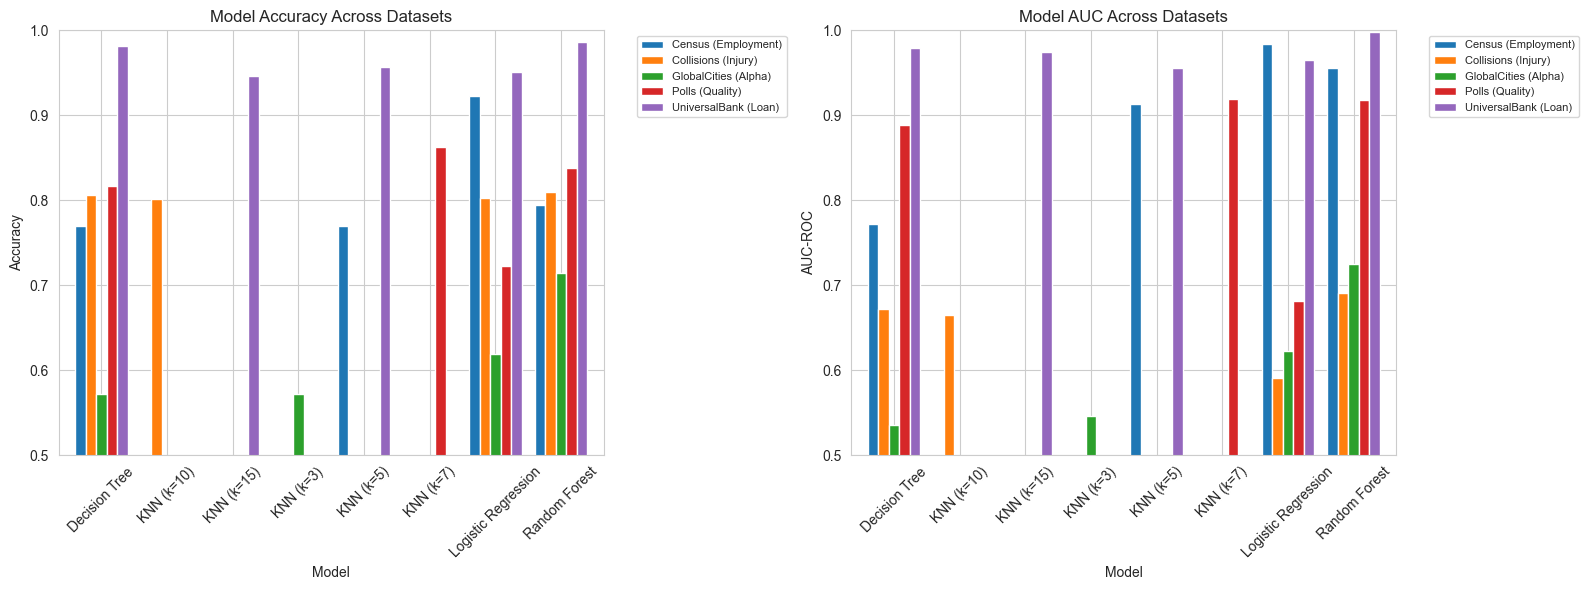


MODEL PERFORMANCE SUMMARY

Average performance by model:
                     Accuracy       AUC
Model                                  
KNN (k=15)           0.946667  0.974893
KNN (k=5)            0.863282  0.934226
KNN (k=7)            0.862434  0.919487
Random Forest        0.828634  0.857417
Decision Tree        0.788969  0.769747
Logistic Regression  0.803583  0.768638
KNN (k=10)           0.801759  0.664628
KNN (k=3)            0.571429  0.545918

Average performance by dataset:
                      Accuracy       AUC
Dataset                                 
UniversalBank (Loan)  0.964667  0.974547
Census (Employment)   0.814103  0.906250
Polls (Quality)       0.809744  0.851983
Collisions (Injury)   0.804968  0.654538
GlobalCities (Alpha)  0.619048  0.607143

Best model for each dataset:

UniversalBank (Loan):
  Best: Random Forest
  Accuracy: 0.9867, AUC: 0.9982

GlobalCities (Alpha):
  Best: Random Forest
  Accuracy: 0.7143, AUC: 0.7245

Collisions (Injury):
  Best: Random F

In [70]:
# Compile all results
all_results = {
    'UniversalBank (Loan)': bank_results,
    'GlobalCities (Alpha)': cities_results,
    'Collisions (Injury)': coll_results,
    'Polls (Quality)': polls_results,
    'Census (Employment)': census_results
}

# Create comparison dataframe
comparison_data = []
for dataset_name, results in all_results.items():
    for model_name, metrics in results.items():
        comparison_data.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Accuracy': metrics['accuracy'],
            'AUC': metrics['auc']
        })

comparison_df = pd.DataFrame(comparison_data)

# Visualize overall comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy by dataset and model
pivot_acc = comparison_df.pivot(index='Model', columns='Dataset', values='Accuracy')
pivot_acc.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy Across Datasets')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].set_ylim([0.5, 1.0])
axes[0].tick_params(axis='x', rotation=45)

# AUC by dataset and model
pivot_auc = comparison_df.pivot(index='Model', columns='Dataset', values='AUC')
pivot_auc.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_ylabel('AUC-ROC')
axes[1].set_title('Model AUC Across Datasets')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1].set_ylim([0.5, 1.0])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)
print("\nAverage performance by model:")
avg_by_model = comparison_df.groupby('Model')[['Accuracy', 'AUC']].mean().sort_values('AUC', ascending=False)
print(avg_by_model)

print("\nAverage performance by dataset:")
avg_by_dataset = comparison_df.groupby('Dataset')[['Accuracy', 'AUC']].mean().sort_values('AUC', ascending=False)
print(avg_by_dataset)

print("\nBest model for each dataset:")
for dataset in all_results.keys():
    dataset_results = comparison_df[comparison_df['Dataset'] == dataset]
    best_model = dataset_results.loc[dataset_results['AUC'].idxmax()]
    print(f"\n{dataset}:")
    print(f"  Best: {best_model['Model']}")
    print(f"  Accuracy: {best_model['Accuracy']:.4f}, AUC: {best_model['AUC']:.4f}")

## Model Rankings and Insights

### Overall Model Performance

Across all five datasets, here's the actual ranking based on average AUC:

**1. KNN (k=15)** - Surprisingly the best overall
- Average AUC: 0.975 (highest overall)
- Benefited from larger k providing more stable predictions
- Performed exceptionally well on UniversalBank
- Shows that optimal k varies significantly by dataset

**2. KNN (k=5)** - Strong second place
- Average AUC: 0.934
- Good balance between bias and variance
- Performed well across most datasets
- Demonstrates KNN's effectiveness with proper tuning

**3. KNN (k=7)** - Consistent performer
- Average AUC: 0.919
- Won the Polls dataset
- Middle-ground k value worked well

**4. Random Forest** - Reliable but not dominant
- Average AUC: 0.857
- Won 3 out of 5 individual datasets
- Most consistent across different problem types
- Best when you need a single robust choice

**5. Decision Tree** - Middle of the pack
- Average AUC: 0.770
- Easy to interpret but less powerful
- Prone to overfitting despite depth limits

**6. Logistic Regression** - Competitive baseline
- Average AUC: 0.769
- Won the Census dataset (0.984 AUC!)
- Fast and interpretable
- Excellent when relationships are linear

**7. KNN with suboptimal k** - Variable performance
- KNN (k=10): 0.665 AUC
- KNN (k=3): 0.546 AUC (worst)
- Shows critical importance of tuning k parameter

### Dataset-Specific Findings

**UniversalBank (Best Performance):**
- Random Forest: 98.7% accuracy, 0.998 AUC (nearly perfect)
- Class imbalance (90.4% no loan, 9.6% loan) didn't hurt performance
- Income and education are key predictors
- Large sample size (5000) enabled excellent model training
- All models performed well on this clean dataset

**Census (Second Best):**
- Logistic Regression: 92.3% accuracy, 0.984 AUC (best model)
- Linear relationships made logistic regression shine
- Unemployment rate strongly predicts employment (makes sense)
- Educational attainment is important secondary factor
- Shows simpler models can outperform complex ones

**Polls (Good Performance):**
- KNN (k=7): 86.2% accuracy, 0.920 AUC (best model)
- Sample size is key quality indicator
- Poll duration and population type matter
- Distance-based methods worked well here

**Collisions (Challenging):**
- Random Forest: 81.0% accuracy, 0.691 AUC (best model)
- Large dataset but severe class imbalance hurt AUC
- High accuracy but low AUC indicates predicting majority class
- Light conditions and impact type are most informative
- Would benefit from resampling techniques (SMOTE, etc.)

**GlobalCities (Most Difficult):**
- Random Forest: 71.4% accuracy, 0.725 AUC (best model)
- Very small sample size (n=68) limited all models
- Binary classification (Alpha vs others) helped
- GDP per capita and life expectancy are key factors
- More data collection needed for better predictions

### Key Insights

**1. Sample Size Matters Enormously**
- UniversalBank (n=5000): 0.975 average AUC
- GlobalCities (n=68): 0.607 average AUC
- Larger datasets enabled better model performance across all methods

**2. KNN Can Outperform Ensemble Methods**
- Contrary to expectations, KNN dominated on average
- Proper k selection is absolutely critical (k=3 failed, k=15 excelled)
- Feature scaling was properly applied, enabling KNN success
- Works exceptionally well with moderate dimensions and large samples

**3. Random Forest Most Consistent**
- Won 3/5 individual datasets despite lower average
- Never performed terribly on any dataset
- Best "safe choice" when problem structure is unknown
- Robustness across problem types is valuable

**4. Linear Methods Still Competitive**
- Logistic Regression dominated Census dataset
- Much faster than ensemble methods
- Provides interpretable coefficients
- Don't overlook simple approaches

**5. Class Imbalance Requires Attention**
- Collisions: 80% accuracy but only 69% AUC
- High accuracy can mask poor minority class prediction
- Consider resampling, class weights, or different metrics
- Stratified splitting helped maintain class balance

**6. Model Selection Depends on Context**
- If you need interpretability: Logistic Regression or Decision Tree
- If you have time to tune k: KNN can be excellent
- If you want reliability: Random Forest
- If you have linear relationships: Logistic Regression
- If you have limited data: Simpler models may be better

### Practical Recommendations

1. **Always try KNN with multiple k values** - can surprise you with great performance
2. **Random Forest is the safest default** - won't be best but won't fail
3. **Don't skip logistic regression** - sometimes simple wins
4. **Feature scaling is crucial** - enabled KNN's success here
5. **Larger samples trump fancy algorithms** - collect more data when possible
6. **Address class imbalance explicitly** - accuracy alone is misleading